In [1]:
pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime, timedelta

# Análise Exploratória

## Tratamento de dados

In [3]:
def is_leap_year(year):
    return calendar.isleap(year)

In [4]:
def num_rows(df):
  return len(df)

In [5]:
def num_columns(df):
  return len(df.columns)

In [6]:
def date_and_time(df):
  df['Data'] = pd.to_datetime(df['Data'])

  df['Date'] = df['Data'].dt.date
  df['Time'] = df['Data'].dt.time

In [7]:
def duplicates(df):
  return df['Data'].duplicated()

In [8]:
def mean_time_difference(df):
  return (time_diff(df)).mean()

In [9]:
def time_diff(df):
  time_diff = df['Data'].diff()
  return time_diff[time_diff > pd.Timedelta(0)]

In [10]:
def mean_time_difference_per_year(df):
  df_copy = df.copy()
  df_copy['TimeDiff'] = df_copy['Data'].diff()
  df_copy['TimeDiff'] = df_copy['TimeDiff'][df_copy['TimeDiff'] > pd.Timedelta(0)]

  df_copy['Year'] = df_copy['Data'].dt.year

  return df_copy.groupby('Year')['TimeDiff'].mean()


In [11]:
def mean_time_difference_per_month(df):
  df_copy = df.copy()

  df_copy['TimeDiff'] = df['Data'].diff()

  df_copy['TimeDiff'] = df_copy['TimeDiff'][df_copy['TimeDiff'] > pd.Timedelta(0)]

  df_copy['Year'] = df_copy['Data'].dt.year
  df_copy['Month'] = df_copy['Data'].dt.month

  return df_copy.groupby(['Year', 'Month'])['TimeDiff'].mean()

In [12]:
def format(df):
  formato = ['Date', 'Time', 'Caudal']
  return df[formato]

In [13]:
def has_seconds(df):
  df['Time'] = df['Time'].apply(lambda x: x.strftime('%H:%M:%S'))
  return any(':00' not in str_time for str_time in df['Time'])

In [14]:
def num_unique_dates(df):
  return df['Date'].nunique()

In [15]:
def date_datetime(df):
  df['Date'] = pd.to_datetime(df['Date'])

In [16]:
def unique_years(df):
  return df['Date'].dt.year.unique()

In [17]:
def is_ordered_ascending(df):
  return df['Date'].is_monotonic_increasing

In [18]:
def date_date_format(df):
  df['Date'] = df['Date'].dt.date

In [19]:
def sort_date(df):
  return df.sort_values(by='Date')

In [20]:
def year_month_day(df):
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Day'] = df['Date'].dt.day

  return df

In [21]:
def average_measurements_per_day(df):
  return df.groupby('Date').size().mean()

In [22]:
def average_measurements_per_year(df):
  return df.groupby(['Year', 'Date']).size().groupby('Year').mean()

In [23]:
def average_measurements_per_year_month(df):
   return df.groupby(['Year', 'Month', 'Date']).size().groupby(['Year', 'Month']).mean()

In [24]:
def measurements_per_year_month_boxplot(df):
  daily_measurements_count = df.groupby(['Year', 'Month', 'Date']).size()

  plot_data = daily_measurements_count.reset_index(name='Measurements')

  for year in unique_years(df):
      year_data = plot_data[plot_data['Year'] == year]

      plt.figure(figsize=(8, 6))
      sns.boxplot(x='Month', y='Measurements', data=year_data, whis=3, palette="Paired")
      plt.title(f'Número de medições diárias em {year}')
      plt.xlabel('Month')
      plt.ylabel('Número de medições')
      plt.show()


In [25]:
def unique_month_counts(df):
  return df.drop_duplicates(subset=['Year', 'Month']).groupby('Year').size().reset_index(name='Número de meses')

In [26]:
def unique_days_counts(df):
  return df.drop_duplicates(subset=['Year', 'Month','Day']).groupby('Year').size().reset_index(name='Número de dias')

In [27]:
def expected_days_print(df):
  for year, num_days in zip((unique_days_counts(df))['Year'], (unique_days_counts(df))['Número de dias']):

    expected_days = 366 if pd.Timestamp(f'{year}-12-31').is_leap_year else 365
    expected_days -= (12 - len(df[df['Year'] == year]['Month'].unique())) * 30

    print(f"Existem medições de {num_days} dias distintos em {year}. Esperava-se que existissem {expected_days}.")

In [28]:
def caudal_values_chart(df):
    plt.figure(figsize=(10, 6))

    for year in unique_years(df):
        year_data = df[df['Year'] == year]
        plt.plot(year_data['Date'], year_data['Caudal'], label=str(year))

    plt.xlabel('Data')
    plt.ylabel('Caudal')
    plt.title('Valores de Caudal')
    plt.legend(title='Ano')
    plt.show()


In [29]:
def caudal_values_chart_yearly(df):
  for year in unique_years(df):
    year_data = df[df['Year'] == year]

    plt.figure(figsize=(10, 6))
    plt.plot(year_data['Date'], year_data['Caudal'])
    plt.xlabel('Data')
    plt.ylabel('Caudal')
    plt.title(f'Valores de Caudal em {year}')
    plt.show()

In [30]:
def time_datetime(df):
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

In [31]:
def invalid_time_values(df):
  return df[df['Time'].isna()]

In [32]:
def time_time(df):
  df['Time'] = df['Time'].dt.time

In [33]:
def correct_caudal(df):
  df['Caudal'] = pd.to_numeric(df['Caudal'], errors='coerce')

In [34]:
def fails(df):
  return df[df['Caudal'].isna()]

In [35]:
def total_fails(df):
  return len(fails(df))

In [36]:
def non_integer_counts(df):
  non_integer_mask = df['Caudal'].isna()
  return df[non_integer_mask].groupby('Year').size().reset_index(name='Número de Falhas')

In [37]:
def days_with_no_data(df):
  return df.groupby('Date').filter(lambda x: x['Caudal'].notna().any()).groupby('Date').filter(lambda x: x['Caudal'].isna().all())['Date'].unique()

In [38]:
def entrys_per_year(df):
  return df.groupby('Year')['Caudal'].count().reset_index(name='Número Total de medições')

In [39]:
def entries_without_errors_per_year(entrys_per_year_df, non_integer_counts_df):
  entries_without_fails_per_year = entrys_per_year_df.copy()
  entries_without_fails_per_year['Medições sem Falhas'] = entrys_per_year_df['Número Total de medições'] - non_integer_counts_df['Número de Falhas']
  return entries_without_fails_per_year

In [40]:
def entries_without_errors_per_year_percent(df):
  df['Medições sem falhas (%)'] = ((df['Medições sem Falhas'] / df['Número Total de medições']) * 100)

  entries_without_errors_per_year_percent = df.copy()
  entries_without_errors_per_year_percent.drop('Medições sem Falhas', axis=1, inplace=True)

  return entries_without_errors_per_year_percent

In [41]:
def entries_with_errors_per_year_percent(df):
  entries_with_errors_per_year_percent = df.copy()

  entries_with_errors_per_year_percent['Medições com falhas (%)'] = (
    (100 - df['Medições sem falhas (%)'])
  )

  entries_with_errors_per_year_percent.drop('Medições sem falhas (%)', axis=1, inplace=True)

  return entries_with_errors_per_year_percent

In [42]:
def unique_years_no_error(df):
  return (df_no_errors(df))['Year'].unique()

In [43]:
def df_no_errors(df):
  return df[~df['Caudal'].isna()]

In [44]:
def mean_results(df, no_errors_df):
  return no_errors_df.groupby(['Year', 'Month'], as_index=False).agg(
    Average=('Caudal', 'mean'),
  ).reset_index()

In [45]:
def mean_results_yearly(df, no_errors_df):
  return no_errors_df.groupby('Year', as_index=False).agg(
    Average=('Caudal', 'mean'),
  ).reset_index()

In [46]:
def means_caudal_yearly(df):

  no_errors_df = df_no_errors(df)

  result = mean_results(df, no_errors_df)

  result_yearly = mean_results_yearly(df, no_errors_df)

  for year in unique_years_no_error(df):
    year_data = result[result['Year'] == year]

    plt.figure(figsize=(10, 6))
    plt.plot(year_data['Month'] , year_data['Average'], label='Média', marker='o', linestyle='-')

    plt.axhline(result_yearly.loc[result_yearly['Year'] == year, 'Average'].values[0], linestyle='dashed', color='blue',
                label= f'Média anual : {result_yearly.loc[result_yearly["Year"] == year, "Average"].values[0]:.2f}')

    for i, avg in enumerate(year_data['Average']):
      plt.text(year_data['Month'].iloc[i] , avg, f'{avg:.2f}', ha='center', va='bottom', color='blue')

    plt.xlabel('Mês')
    plt.ylabel('Caudal')
    plt.title(f'Média das medições de Caudal do ano {year}')
    plt.xticks(range(1, 13), [str(month) for month in range(1, 13)])
    plt.legend()
    plt.show()

In [47]:
def means_caudal(df):

  no_errors_df = df_no_errors(df)

  result = mean_results(df, no_errors_df)

  result_yearly = mean_results_yearly(df, no_errors_df)

  plt.figure(figsize=(10, 6))
  for year in unique_years_no_error(df):
    year_data = result[result['Year'] == year]
    plt.plot(year_data['Month'], year_data['Average'], label=f'Ano {year}')

  overall_monthly_average = result.groupby('Month')['Average'].mean()

  plt.plot(overall_monthly_average.index, overall_monthly_average.values, label='Média Geral', linestyle='--', color='black')

  plt.xlabel('Mês')
  plt.ylabel('Caudal')
  plt.title('Médias de medições de Caudal')
  plt.xticks(range(1, 13), [str(month) for month in range(1, 13)])
  plt.legend()
  plt.show()

In [48]:
def std_monthly(df):
  return df.groupby(['Year', 'Month'], as_index=False).agg(
    Desvio_Padrao=('Caudal', 'std')
).reset_index()

In [49]:
def std_yearly(df):
  return df.groupby('Year', as_index=False).agg(
    Desvio_Padrao=('Caudal', 'std')
).reset_index()


In [50]:
def caudal_boxplots(df):
  for year in unique_years_no_error(df):
    plt.figure(figsize=(12, 8))
    year_data = df[df['Year'] == year]

    ax = sns.boxplot(x='Month', y='Caudal', data=year_data, whis=3, palette="Set3")

    plt.title(f'Boxplot das medições de Caudal em {year}')
    plt.xlabel('Mês')
    plt.ylabel('Medição do Caudal')
    plt.show()

In [51]:
def caudal_statistics(df_no_errors):
  dfs = []

  for year in df_no_errors['Year'].unique():
    for month in df_no_errors['Month'].unique():
        subset_data = df_no_errors[(df_no_errors['Year'] == year) & (df_no_errors['Month'] == month)]

        if not subset_data.empty:
            min_value = subset_data['Caudal'].min()
            q1_value = np.percentile(subset_data['Caudal'], 25)
            median_value = np.median(subset_data['Caudal'])
            q3_value = np.percentile(subset_data['Caudal'], 75)
            max_value = subset_data['Caudal'].max()

            dfs.append(pd.DataFrame({
                'Year': [year],
                'Month': [month],
                'Min_Value': [min_value],
                'Q1_Value': [q1_value],
                'Median': [median_value],
                'Q3_Value': [q3_value],
                'Max_Value': [max_value]
            }))

  summary_df = pd.concat(dfs, ignore_index=True)

  summary_df_sorted = summary_df.sort_values(by=['Year', 'Month'])
  return summary_df_sorted

In [52]:
def resultados(df):

  print(f"Existem {num_rows(df)} medições de Caudal. \n")

  print(f"A DataFrame tem {num_columns(df)} colunas \n")

  date_and_time(df)

  if (duplicates(df)).any():
    print("Linhas duplicadas:")
    print(df[duplicates])
    df = df.drop_duplicates(subset=['Data'])
  else:
    print("Não existem duplicados.\n")

  print("Média de tempo entre medições:", mean_time_difference(df), "\n")

  print("Média de tempo entre medições por ano:")
  print(mean_time_difference_per_year(df))

  print("\nMédia de tempo entre medições por ano e mês:")
  print(mean_time_difference_per_month(df))


  df.drop('Data', axis=1, inplace=True)

  df = format(df)

  if has_seconds(df):
    subset = df[df['Time'].apply(lambda x: ':00' not in x)]
    print("\n Os dados com valor nos segundos:")
    print(subset)
  else:
    print("\n O valor dos segundos está sempre a 00.\n")


  print(f"Existem medições de {num_unique_dates(df)} dias distintos.\n")

  date_datetime(df)

  print("Temos dados dos seguintes anos:")
  print(unique_years(df))

  if is_ordered_ascending(df):
    print("\n Os dados estão organizados de forma cronológica.\n")
  else:
    print("\n Os dados não estão organizados de forma cronológica.\n")
    df = sort_date(df)

  date_date_format(df)
  print(f"A primeira medição foi feita em: {df['Date'][0]}\n")
  print(f"A ultima medição foi feita em: {df['Date'][len(df)-1]}\n")

  date_datetime(df)
  df = year_month_day(df)

  print(f"Valor médio de medições diárias: {average_measurements_per_day(df)} \n")

  print("Valor médio de medições diárias por ano:")
  print(average_measurements_per_year(df))

  print("\nValor médio de medições diárias por ano e mês:")
  print(average_measurements_per_year_month(df))

  measurements_per_year_month_boxplot(df)

  print("\n Quantos meses tiveram medições naquele ano:")
  print(unique_month_counts(df))

  print("\n Quantos dias tiveram medições naquele ano:")
  print(unique_days_counts(df))
  print('\n')

  expected_days_print(df)

  caudal_values_chart(df)
  caudal_values_chart_yearly(df)

  time_datetime(df)

  if not invalid_time_values(df).empty:
    print("\n Existem falhas no tempo das seguintes leituras:")
    print(invalid_time_values(df))
  else:
    print("\n Não existem falhas nos tempos")

  time_time(df)

  if not fails(df).empty:
    print("\n Existem as seguintes falhas nos dados:")
    print(format(fails(df)))
  else:
    print("\n Não existem falhas nos dados.")

  print(f"\n Existem {total_fails(df)} falhas de leituras \n")

  correct_caudal(df)

  fails_count = non_integer_counts(df)
  print("Número de falhas por ano:")
  print(fails_count)

  days_without_data = days_with_no_data(df)
  if len(days_without_data) > 0:
    print("\n Existem dias inteiros sem valores.")
    print("Dias sem valores:", days_without_data)
  else:
    print("\n Todos os dias tem pelo menos uma medição sem falhas.")

  entrys_year = entrys_per_year(df)
  print('\n Número de medições por ano:')
  print(entrys_year)

  entries_without_fails_per_year = entries_without_errors_per_year(entrys_year, fails_count)
  print("\n Número de medições sem falhas:")
  print(entries_without_fails_per_year)

  entries_without_fails_per_year_percent = entries_without_errors_per_year_percent(entries_without_fails_per_year)
  print("\n Percentagem de medições sem falhas:")
  print(entries_without_fails_per_year_percent)

  print("\n Percentagem de medições com falhas:")
  print(entries_with_errors_per_year_percent(entries_without_fails_per_year_percent))

  print('\n')
  means_caudal_yearly(df)
  means_caudal(df)

  print("\n", (std_monthly(df_no_errors(df)))[['Year', 'Month', 'Desvio_Padrao']])
  print("\n", (std_yearly(df_no_errors(df)))[['Year', 'Desvio_Padrao']])

  print('\n')
  caudal_boxplots(df)
  print('\n')
  print(caudal_statistics(df_no_errors(df)))

## Unico Output

### Alcogulhe

Existem 310239 medições de Caudal. 

A DataFrame tem 2 colunas 

Não existem duplicados.

Média de tempo entre medições: 0 days 00:05:05.069785132 

Média de tempo entre medições por ano:
Year
2013   0 days 00:04:46.079179413
2014   0 days 00:05:11.182135738
2015   0 days 00:05:07.325829557
2016   0 days 00:05:09.099800832
Name: TimeDiff, dtype: timedelta64[ns]

Média de tempo entre medições por ano e mês:
Year  Month
2013  7       0 days 00:04:16.387133831
      8       0 days 00:04:26.846667330
      9       0 days 00:04:42.278370725
      10      0 days 00:04:44.870785919
      11      0 days 00:05:16.775061124
      12      0 days 00:05:21.932227829
2014  1       0 days 00:05:20.620062245
      2       0 days 00:05:23.028846153
      3       0 days 00:05:20.464170355
      4       0 days 00:05:18.334561532
      5       0 days 00:05:20.905823148
      6       0 days 00:05:02.937945541
      7       0 days 00:04:57.329040852
      8       0 days 00:04:39.355444305
      9       0 da

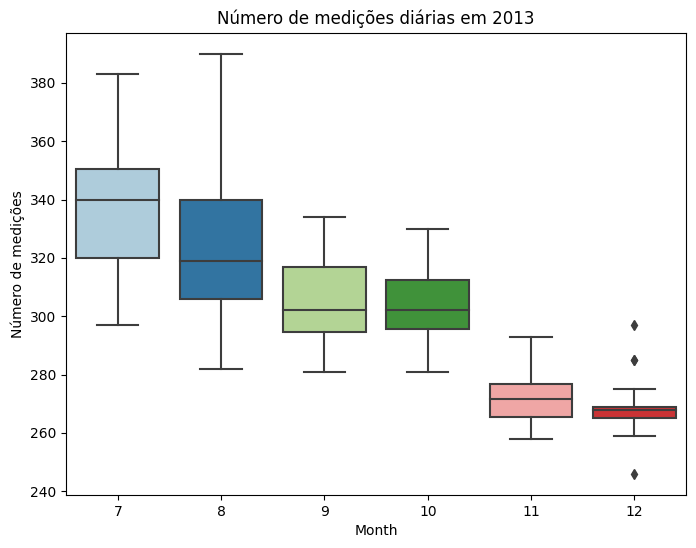

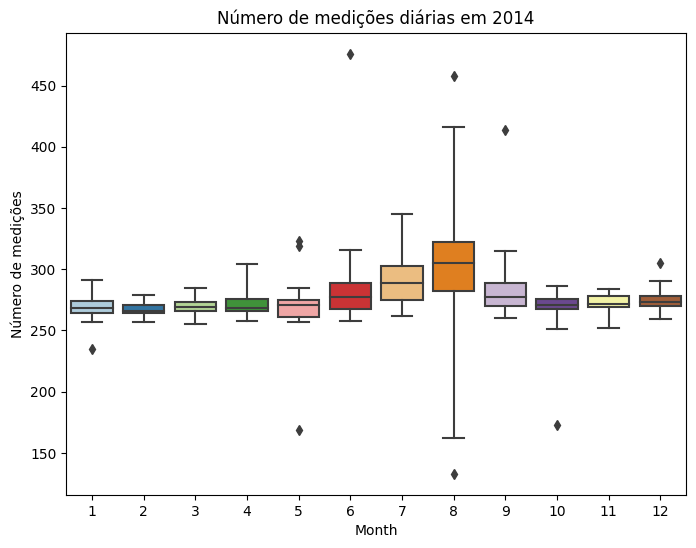

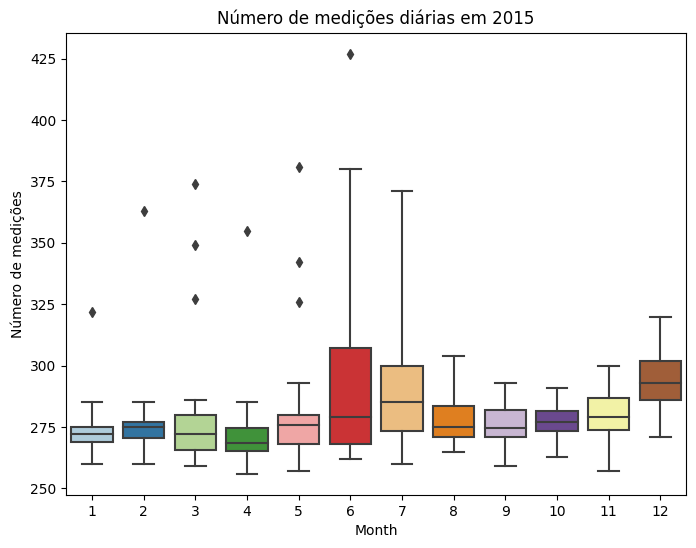

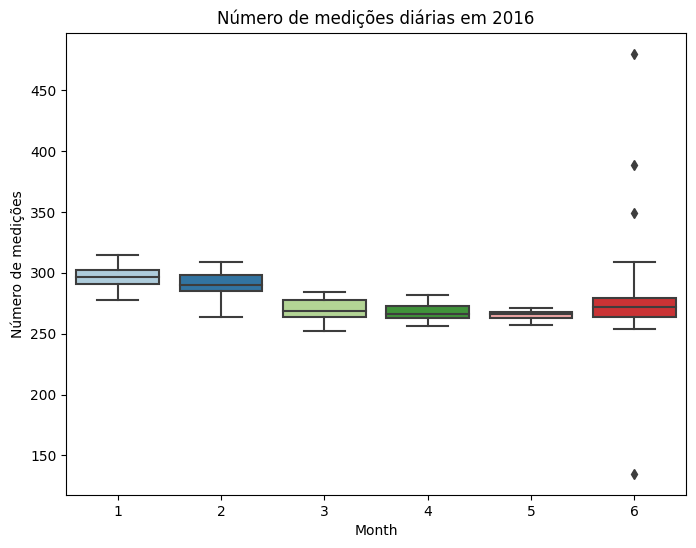


 Quantos meses tiveram medições naquele ano:
   Year  Número de meses
0  2013                6
1  2014               12
2  2015               12
3  2016                6

 Quantos dias tiveram medições naquele ano:
   Year  Número de dias
0  2013             184
1  2014             365
2  2015             365
3  2016             182


Existem medições de 184 dias distintos em 2013. Esperava-se que existissem 185.
Existem medições de 365 dias distintos em 2014. Esperava-se que existissem 365.
Existem medições de 365 dias distintos em 2015. Esperava-se que existissem 365.
Existem medições de 182 dias distintos em 2016. Esperava-se que existissem 186.


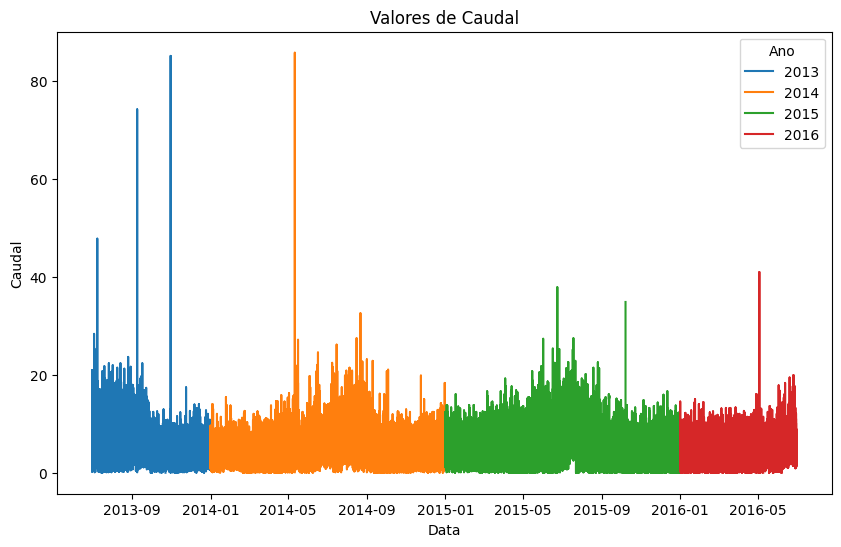

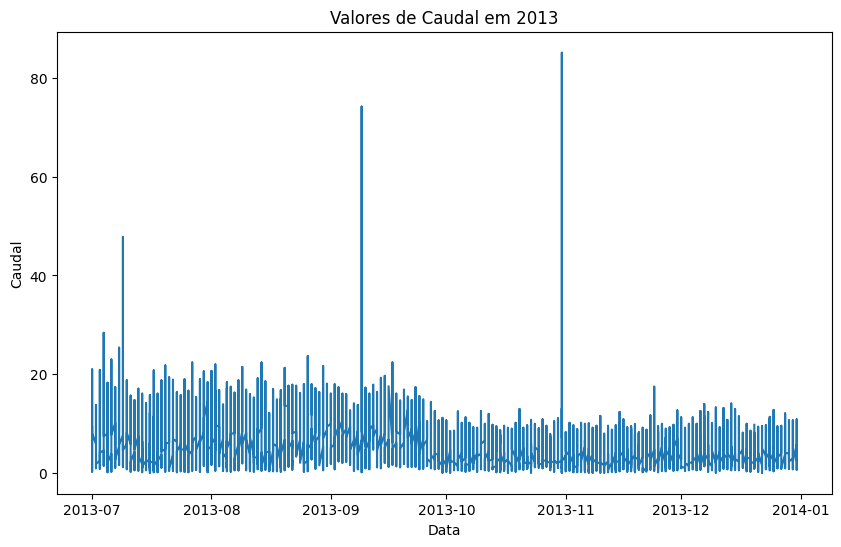

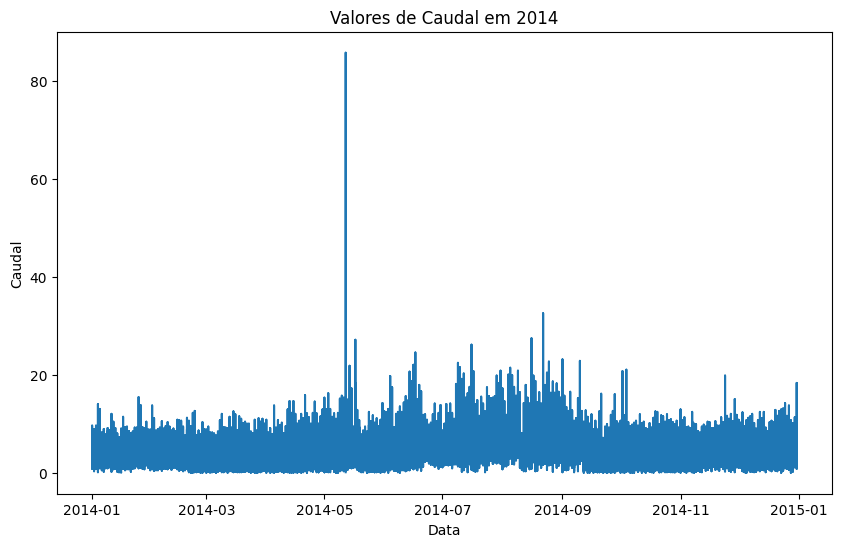

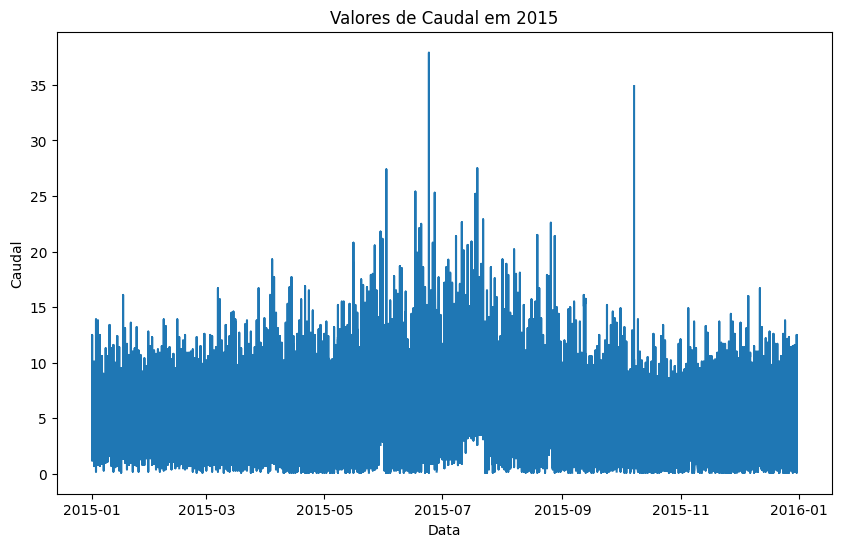

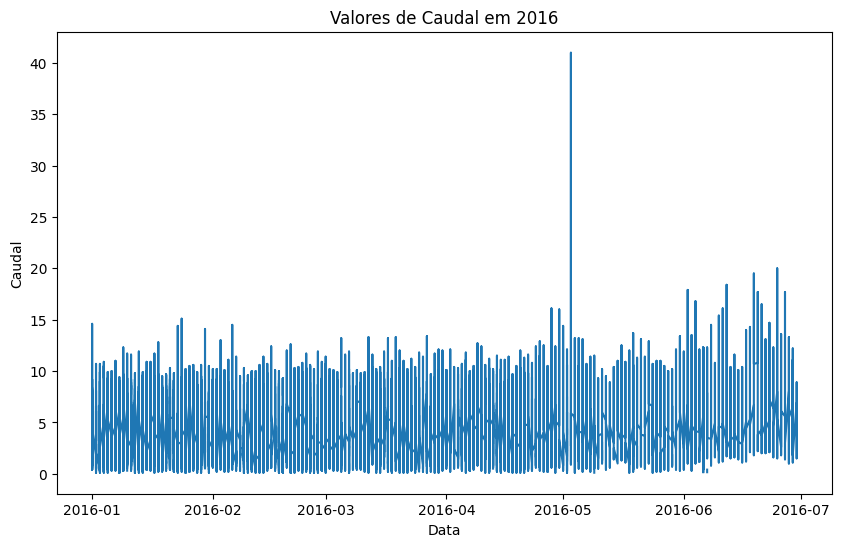


 Não existem falhas nos tempos

 Existem as seguintes falhas nos dados:
             Date      Time  Caudal
4578   2013-07-14  02:16:00     NaN
5305   2013-07-16  07:42:00     NaN
5438   2013-07-16  17:12:00     NaN
5727   2013-07-17  15:20:00     NaN
5871   2013-07-18  01:40:00     NaN
...           ...       ...     ...
303805 2016-06-07  07:04:00     NaN
303806 2016-06-07  07:07:00     NaN
309953 2016-06-29  11:14:00     NaN
310046 2016-06-29  19:20:00     NaN
310238 2016-06-30  10:05:00     NaN

[2974 rows x 3 columns]

 Existem 2974 falhas de leituras 

Número de falhas por ano:
   Year  Número de Falhas
0  2013               139
1  2014               535
2  2015              1463
3  2016               837

 Todos os dias tem pelo menos uma medição sem falhas.

 Número de medições por ano:
   Year  Número Total de medições
0  2013                     55432
1  2014                    100807
2  2015                    101152
3  2016                     49874

 Número de medições se

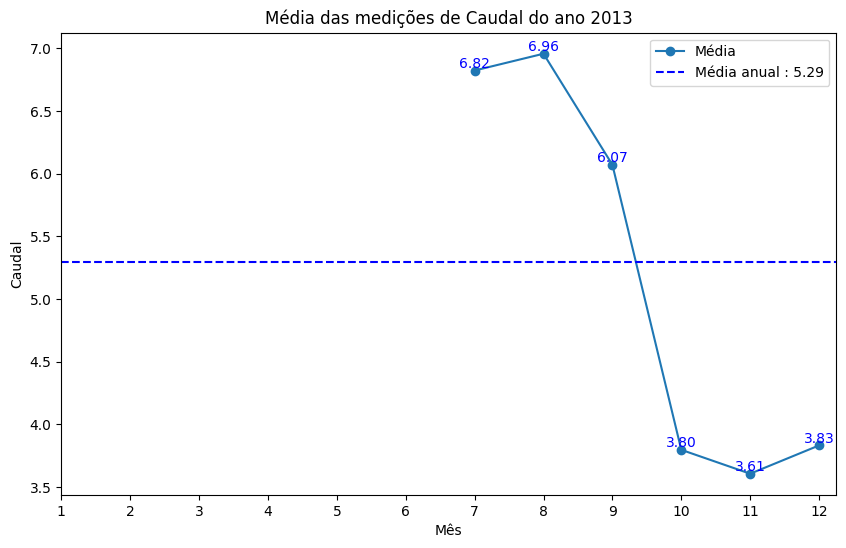

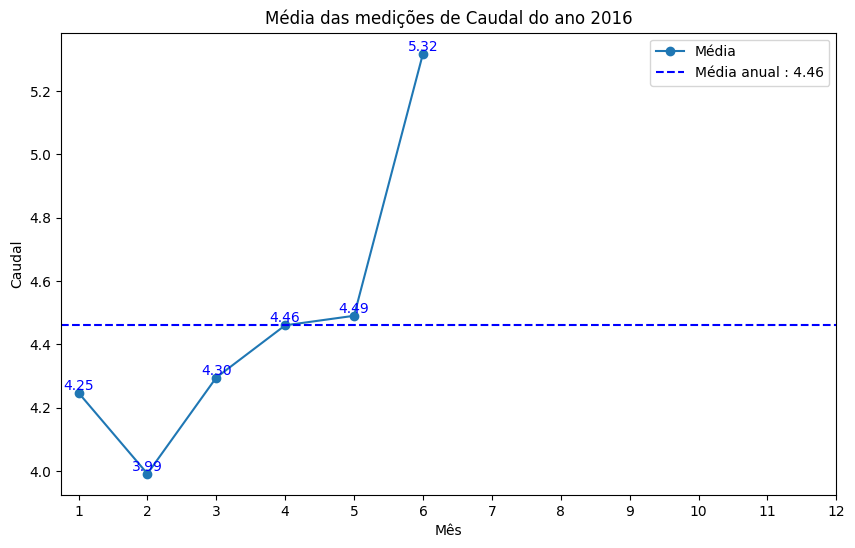


     Year  Month  Desvio_Padrao
0   2013      7       3.969724
1   2013      8       3.625756
2   2013      9       3.387373
3   2013     10       2.267465
4   2013     11       2.031300
5   2013     12       2.174717
6   2014      1       2.010383
7   2014      2       1.985827
8   2014      3       2.090192
9   2014      4       2.281762
10  2014      5       3.165473
11  2014      6       3.024768
12  2014      7       3.456553
13  2014      8       3.642749
14  2014      9       2.639412
15  2014     10       2.298754
16  2014     11       2.065611
17  2014     12       2.422424
18  2015      1       2.203049
19  2015      2       2.192594
20  2015      3       2.493721
21  2015      4       3.029418
22  2015      5       3.492671
23  2015      6       3.905418
24  2015      7       3.436147
25  2015      8       3.215097
26  2015      9       2.542791
27  2015     10       2.346831
28  2015     11       2.377613
29  2015     12       2.541861
30  2016      1       2.314830
31  20

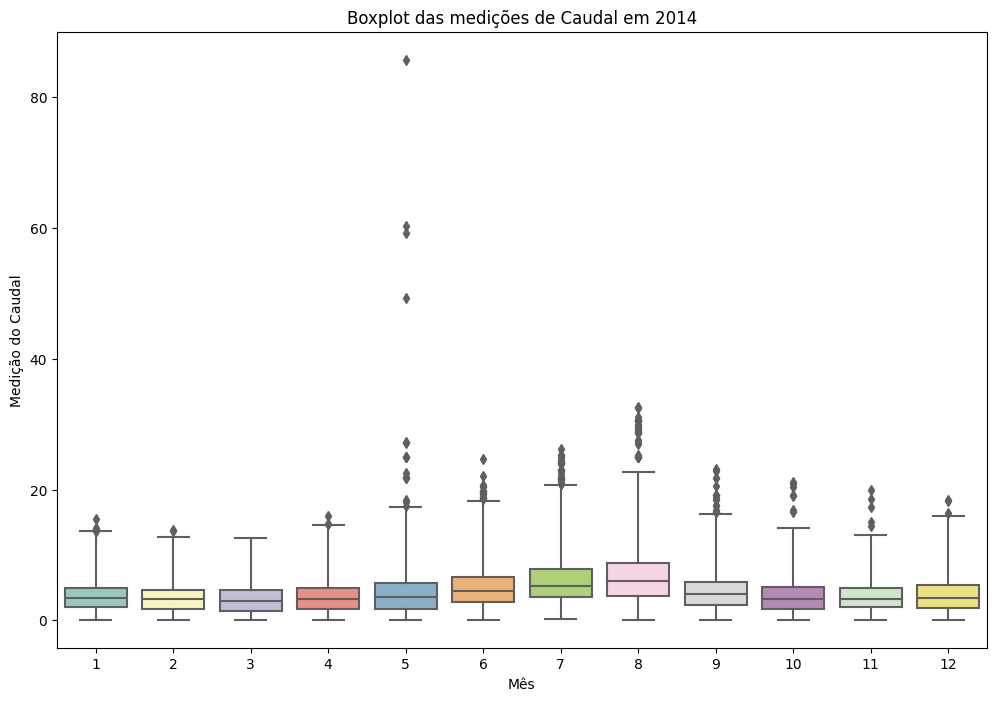

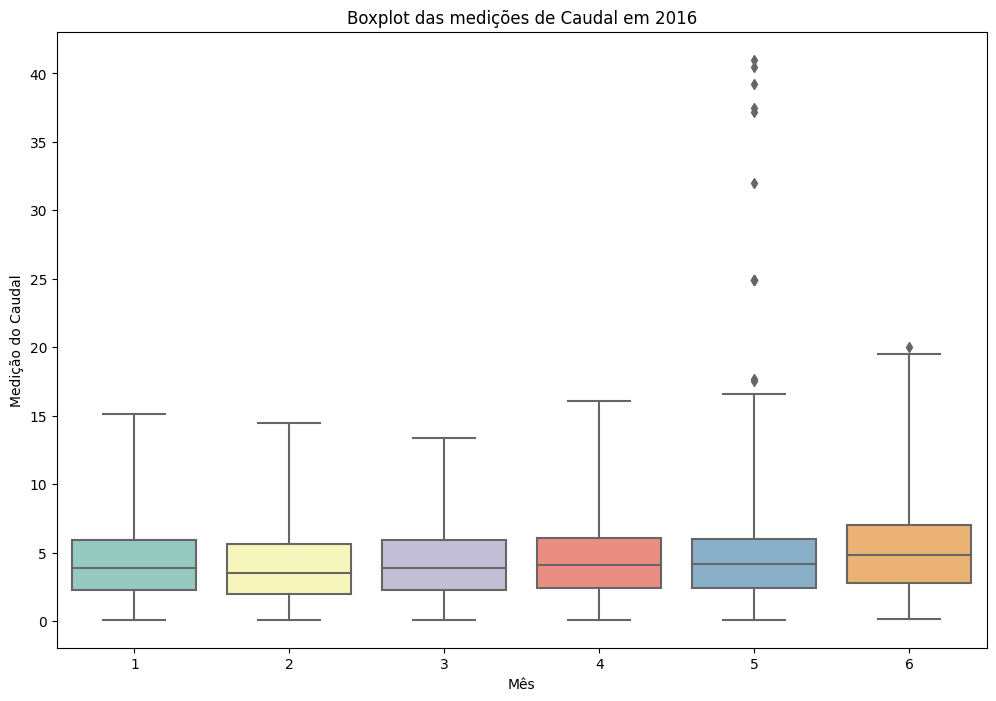



    Year  Month  Min_Value  Q1_Value  Median  Q3_Value  Max_Value
0   2013      7       0.10       3.8    6.37      9.10      47.80
1   2013      8       0.30       4.3    6.60      9.10      23.70
2   2013      9       0.10       3.6    5.60      8.00      74.15
3   2013     10       0.10       2.0    3.50      5.10      85.05
4   2013     11       0.10       1.9    3.30      4.90      17.50
5   2013     12       0.10       2.0    3.50      5.20      14.10
12  2014      1       0.10       2.0    3.40      4.90      15.50
13  2014      2       0.10       1.8    3.20      4.70      13.80
14  2014      3       0.10       1.5    3.00      4.60      12.60
15  2014      4       0.10       1.8    3.30      5.00      15.90
16  2014      5       0.10       1.8    3.50      5.70      85.70
17  2014      6       0.10       2.8    4.50      6.70      24.60
6   2014      7       0.20       3.5    5.30      7.80      26.20
7   2014      8       0.10       3.8    6.00      8.75      32.60
8   2014

In [ ]:
alcogulhe = pd.read_excel("/content/alcogulhe.xlsx")

resultados(alcogulhe)

### Arnal

Existem 293188 medições de Caudal. 

A DataFrame tem 2 colunas 

Não existem duplicados.

Média de tempo entre medições: 0 days 00:05:22.967594061 

Média de tempo entre medições por ano:
Year
2013   0 days 00:05:19.791997746
2014   0 days 00:05:26.663766314
2015   0 days 00:05:19.516307156
2016   0 days 00:05:25.904596056
Name: TimeDiff, dtype: timedelta64[ns]

Média de tempo entre medições por ano e mês:
Year  Month
2013  7       0 days 00:05:23.733075435
      8       0 days 00:05:25.623632385
      9       0 days 00:05:25.638899359
      10      0 days 00:04:54.381800197
      11      0 days 00:05:27.776934749
      12      0 days 00:05:24.758093852
2014  1       0 days 00:05:28.451256897
      2       0 days 00:05:30.775331601
      3       0 days 00:05:26.543947336
      4       0 days 00:05:26.015094339
      5       0 days 00:05:29.317594983
      6       0 days 00:05:24.258193645
      7       0 days 00:05:26.673984632
      8       0 days 00:05:24.612586395
      9       0 da


 Quantos meses tiveram medições naquele ano:
   Year  Número de meses
0  2013                6
1  2014               12
2  2015               12
3  2016                6

 Quantos dias tiveram medições naquele ano:
   Year  Número de dias
0  2013             184
1  2014             365
2  2015             365
3  2016             182


Existem medições de 184 dias distintos em 2013. Esperava-se que existissem 185.
Existem medições de 365 dias distintos em 2014. Esperava-se que existissem 365.
Existem medições de 365 dias distintos em 2015. Esperava-se que existissem 365.
Existem medições de 182 dias distintos em 2016. Esperava-se que existissem 186.


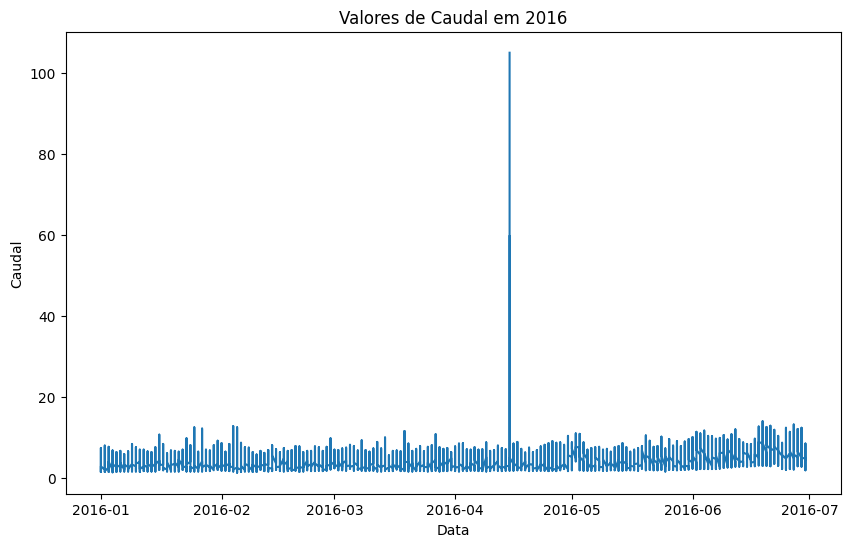


 Não existem falhas nos tempos

 Existem as seguintes falhas nos dados:
             Date      Time  Caudal
11799  2013-08-14  07:19:00     NaN
11800  2013-08-14  07:24:00     NaN
11801  2013-08-14  07:34:00     NaN
18446  2013-09-08  08:12:00     NaN
18449  2013-09-08  08:27:00     NaN
...           ...       ...     ...
227335 2015-10-26  18:40:00     NaN
227336 2015-10-26  18:45:00     NaN
227337 2015-10-26  18:50:00     NaN
227338 2015-10-26  18:53:00     NaN
272856 2016-04-15  11:59:00     NaN

[177 rows x 3 columns]

 Existem 177 falhas de leituras 

Número de falhas por ano:
   Year  Número de Falhas
0  2013                97
1  2014                61
2  2015                18
3  2016                 1

 Todos os dias tem pelo menos uma medição sem falhas.

 Número de medições por ano:
   Year  Número Total de medições
0  2013                     49615
1  2014                     96479
2  2015                     98681
3  2016                     48236

 Número de medições sem 

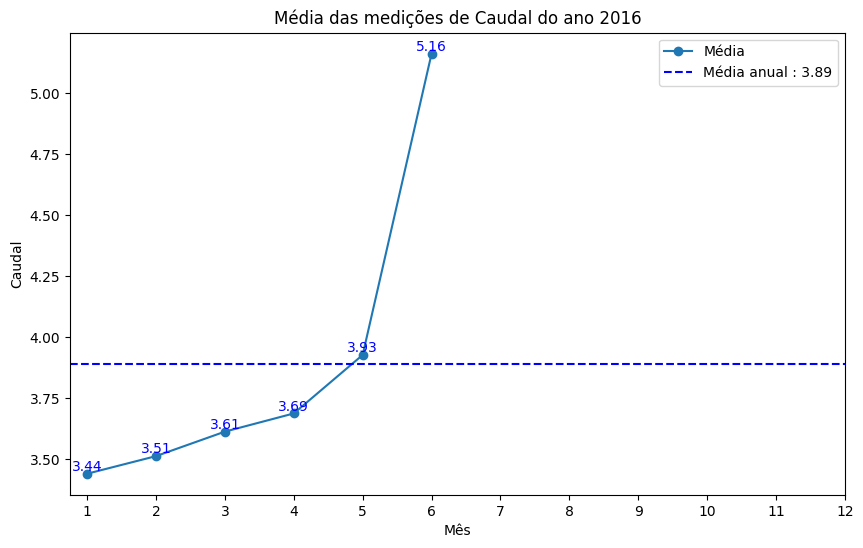


     Year  Month  Desvio_Padrao
0   2013      7       2.488537
1   2013      8       2.598932
2   2013      9       2.247851
3   2013     10       1.400679
4   2013     11       1.342117
5   2013     12       1.367457
6   2014      1       1.237770
7   2014      2       1.300014
8   2014      3       1.552538
9   2014      4       1.548853
10  2014      5       1.960382
11  2014      6       1.834156
12  2014      7       2.039424
13  2014      8       2.114822
14  2014      9       1.637123
15  2014     10       1.409097
16  2014     11       1.282213
17  2014     12       1.246423
18  2015      1       1.242569
19  2015      2       0.993381
20  2015      3       1.054340
21  2015      4       1.145479
22  2015      5       1.588894
23  2015      6       1.789068
24  2015      7       1.992652
25  2015      8       3.326470
26  2015      9       1.652079
27  2015     10       1.580161
28  2015     11       1.379928
29  2015     12       1.390406
30  2016      1       1.307462
31  20

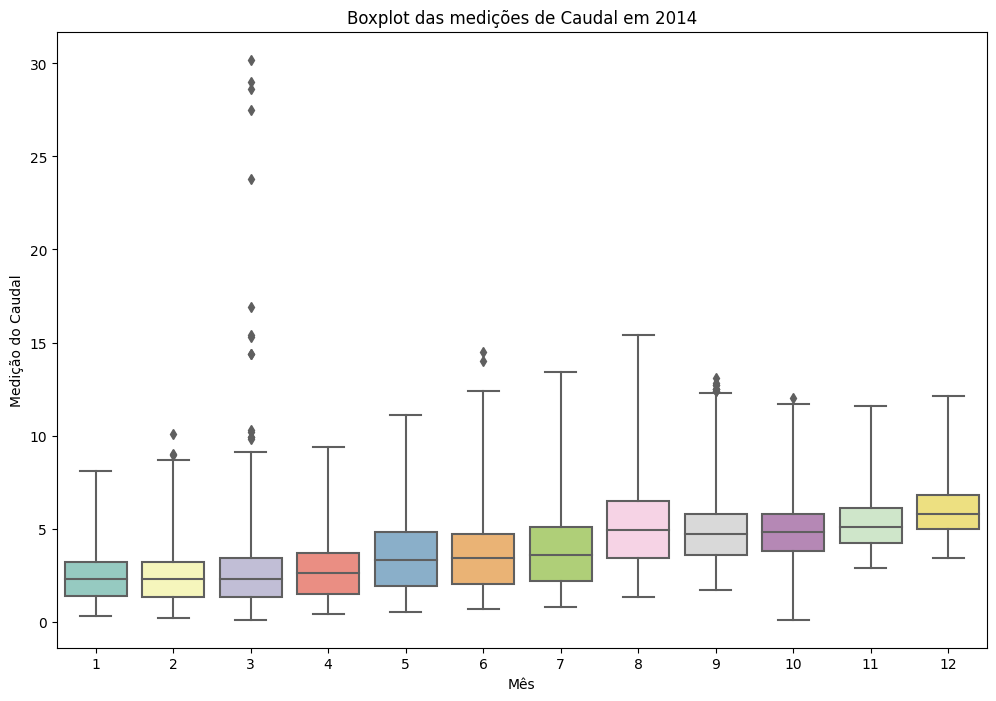

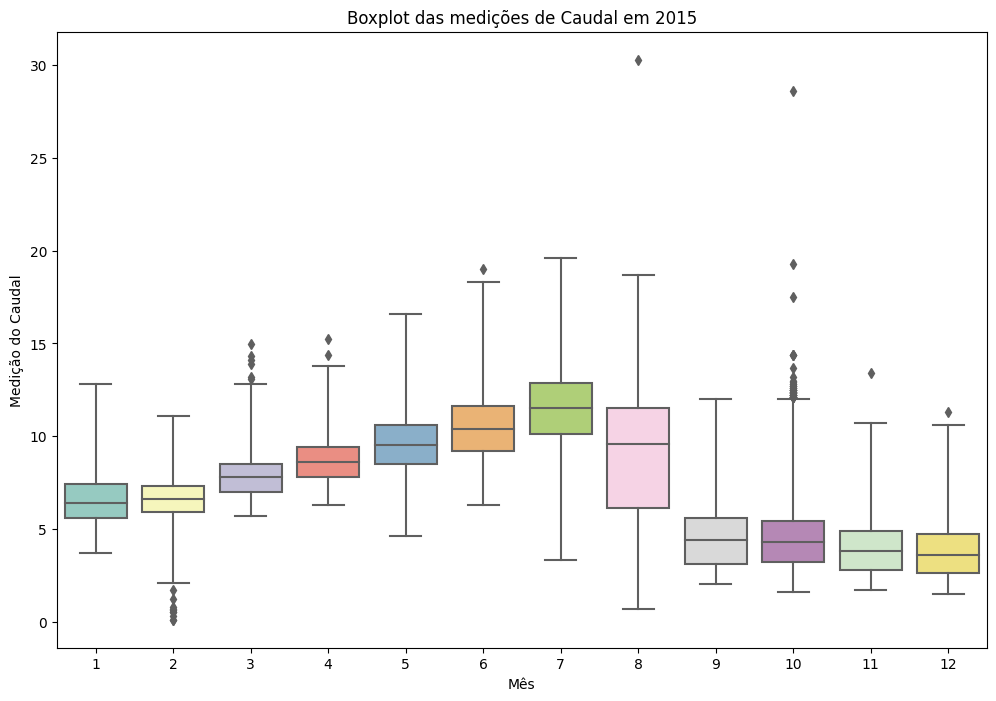

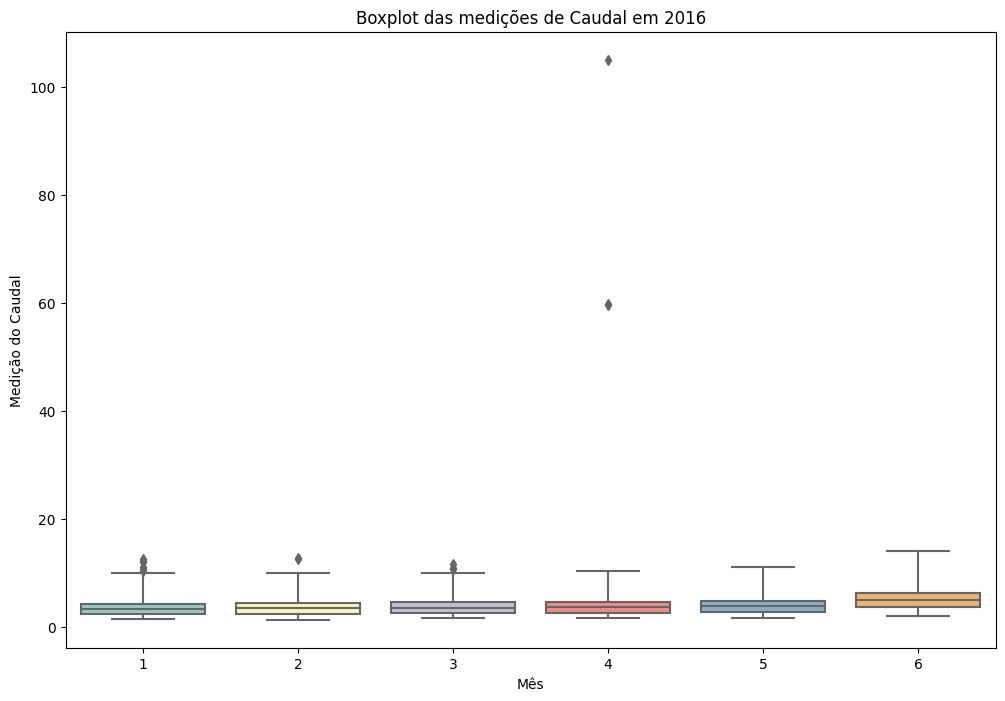



    Year  Month  Min_Value  Q1_Value  Median  Q3_Value  Max_Value
0   2013      7        0.4       2.5   4.200    6.1000      16.15
1   2013      8        0.7       2.7   4.600    6.6000      16.90
2   2013      9        0.2       2.1   3.700    5.3000      13.60
3   2013     10        0.3       1.4   2.400    3.4000      15.60
4   2013     11        0.1       1.3   2.300    3.3000       9.20
5   2013     12        0.2       1.3   2.300    3.3000       9.00
12  2014      1        0.3       1.4   2.300    3.2000       8.10
13  2014      2        0.2       1.3   2.300    3.2000      10.10
14  2014      3        0.1       1.3   2.300    3.4000      30.20
15  2014      4        0.4       1.5   2.600    3.7000       9.40
16  2014      5        0.5       1.9   3.300    4.8000      11.10
17  2014      6        0.7       2.0   3.400    4.7000      14.50
6   2014      7        0.8       2.2   3.600    5.1000      13.40
7   2014      8        1.3       3.4   4.900    6.5000      15.40
8   2014

In [ ]:
arnal = pd.read_excel("/content/arnal.xlsx")

resultados(arnal)

### Cerca

Existem 283286 medições de Caudal. 

A DataFrame tem 2 colunas 

Não existem duplicados.

Média de tempo entre medições: 0 days 00:05:33.655576539 

Média de tempo entre medições por ano:
Year
2013   0 days 00:07:30.332837698
2014   0 days 00:07:10.317668249
2015   0 days 00:04:46.288842288
2016   0 days 00:04:01.991305956
Name: TimeDiff, dtype: timedelta64[ns]

Média de tempo entre medições por ano e mês:
Year  Month
2013  7       0 days 00:09:35.211459754
      8       0 days 00:07:04.439866899
      9       0 days 00:07:35.264359740
      10      0 days 00:07:08.132992327
      11      0 days 00:07:03.579601176
      12      0 days 00:07:12.366042608
2014  1       0 days 00:07:24.763328350
      2       0 days 00:07:23.700715202
      3       0 days 00:06:55.550729134
      4       0 days 00:06:58.083870967
      5       0 days 00:07:04.768401015
      6       0 days 00:07:03.024963289
      7       0 days 00:07:04.238872168
      8       0 days 00:07:05.576739752
      9       0 da

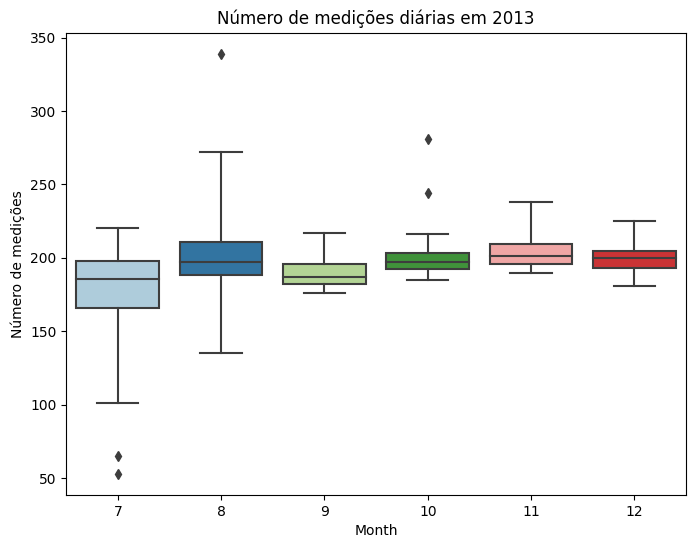

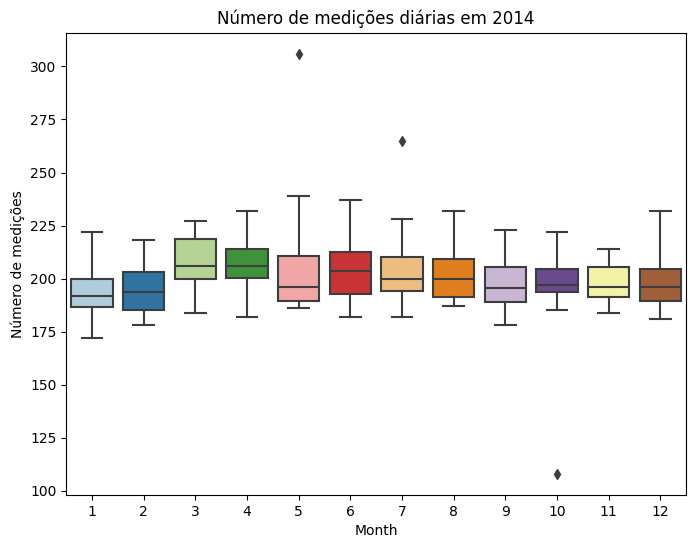


 Quantos meses tiveram medições naquele ano:
   Year  Número de meses
0  2013                6
1  2014               12
2  2015               12
3  2016                6

 Quantos dias tiveram medições naquele ano:
   Year  Número de dias
0  2013             179
1  2014             365
2  2015             365
3  2016             182


Existem medições de 179 dias distintos em 2013. Esperava-se que existissem 185.
Existem medições de 365 dias distintos em 2014. Esperava-se que existissem 365.
Existem medições de 365 dias distintos em 2015. Esperava-se que existissem 365.
Existem medições de 182 dias distintos em 2016. Esperava-se que existissem 186.


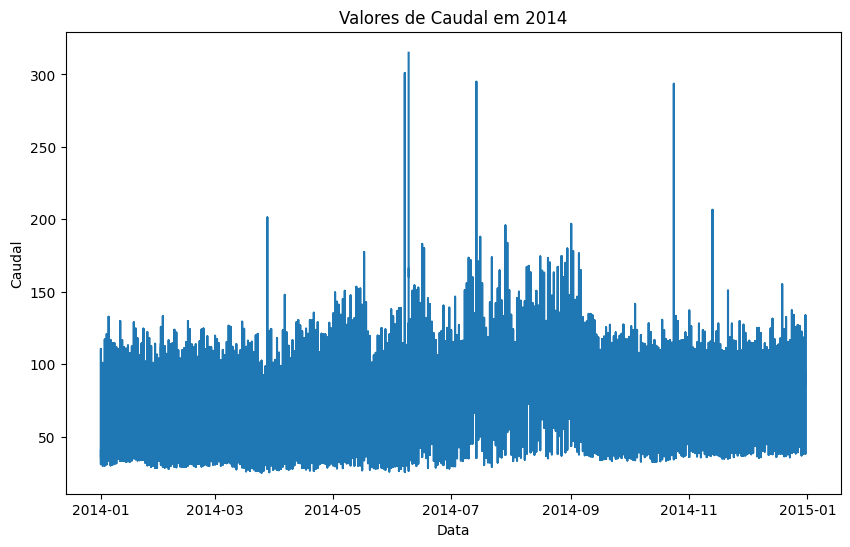

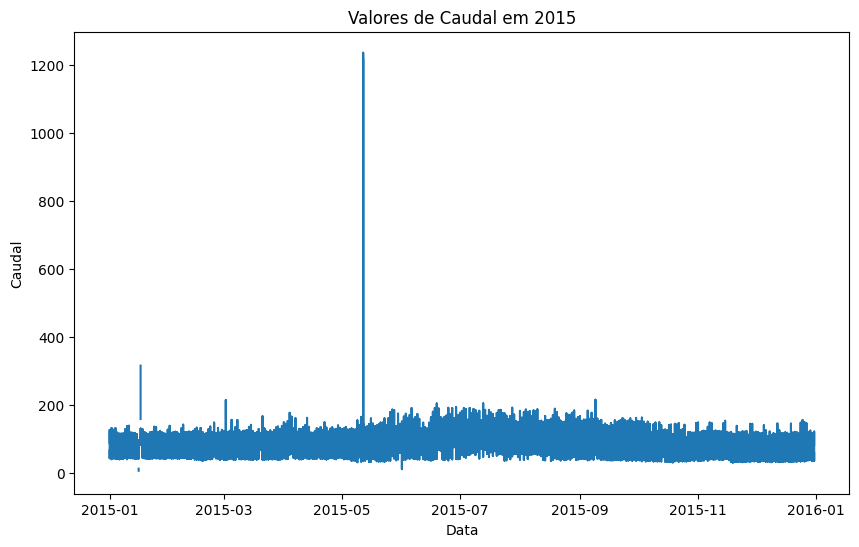

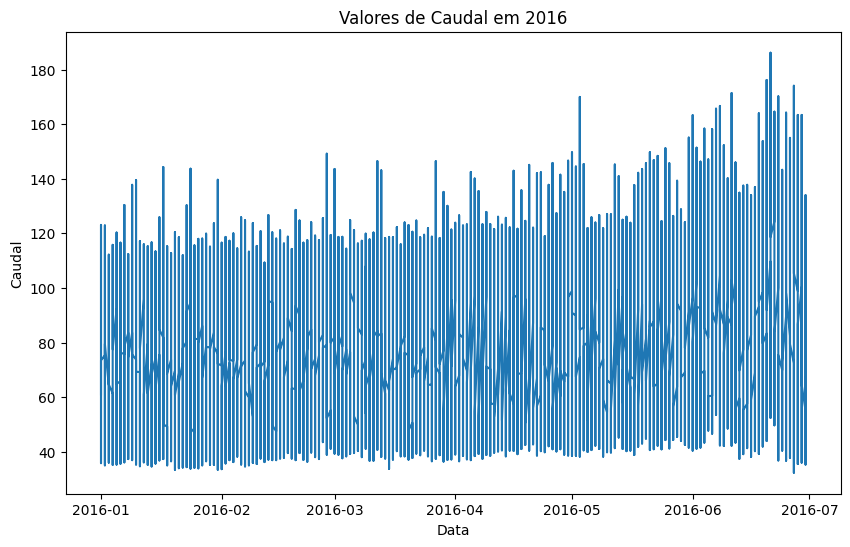


 Não existem falhas nos tempos

 Existem as seguintes falhas nos dados:
             Date      Time  Caudal
3097   2013-07-25  06:26:00     NaN
3098   2013-07-25  06:27:00     NaN
16283  2013-09-30  10:11:00     NaN
16317  2013-09-30  14:44:00     NaN
20759  2013-10-22  18:11:00     NaN
...           ...       ...     ...
243005 2016-03-09  15:24:00     NaN
243006 2016-03-09  15:25:00     NaN
263169 2016-05-05  10:59:00     NaN
263170 2016-05-05  11:00:00     NaN
266338 2016-05-14  08:10:00     NaN

[374 rows x 3 columns]

 Existem 374 falhas de leituras 

Número de falhas por ano:
   Year  Número de Falhas
0  2013                10
1  2014                30
2  2015               328
3  2016                 6

 Todos os dias tem pelo menos uma medição sem falhas.

 Número de medições por ano:
   Year  Número Total de medições
0  2013                     34963
1  2014                     73254
2  2015                    109829
3  2016                     64866

 Número de medições sem 

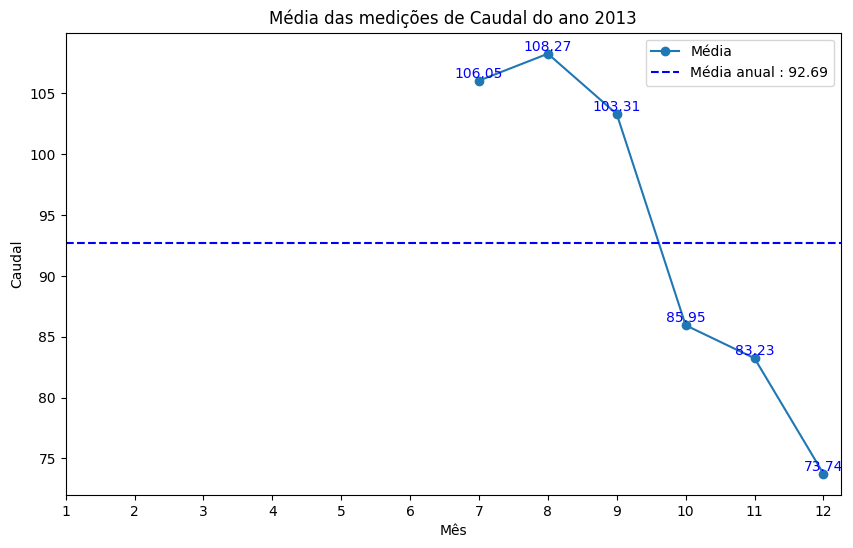

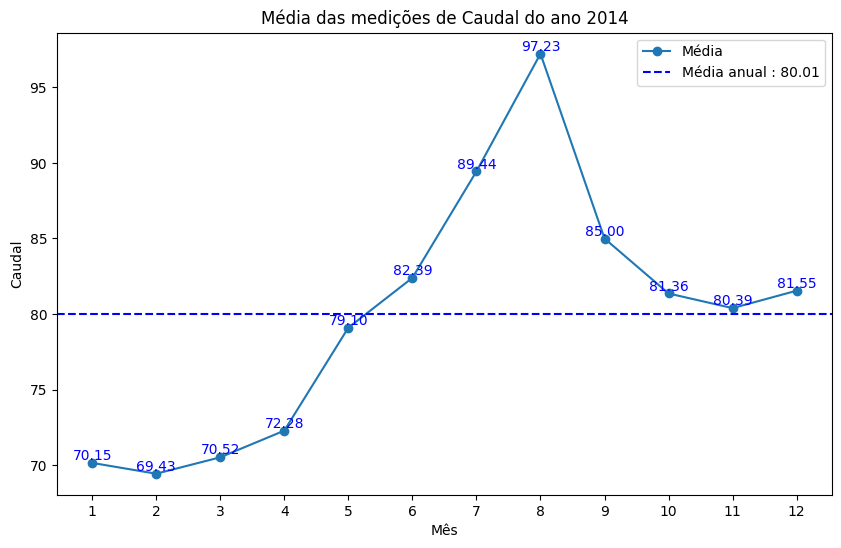

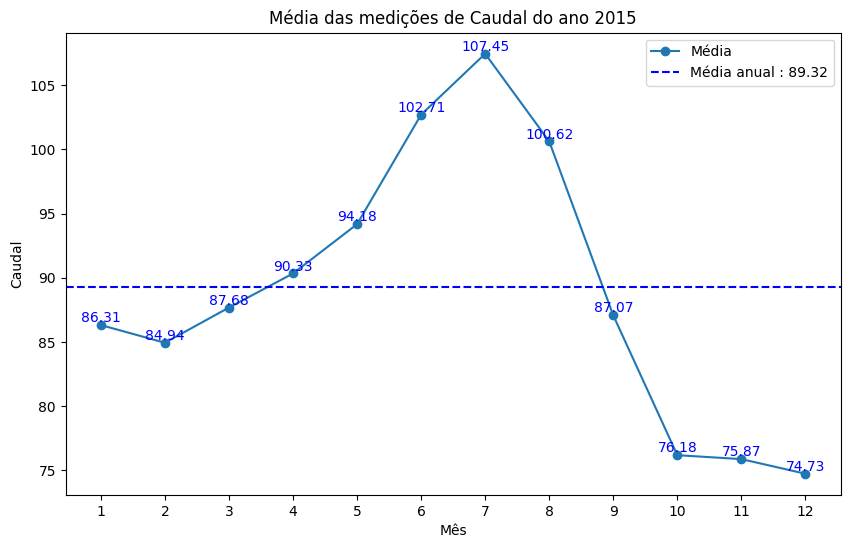

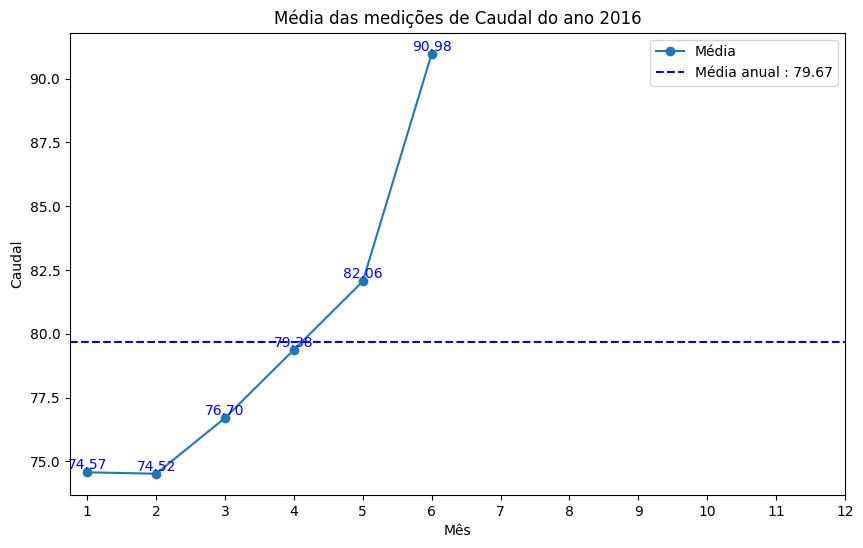

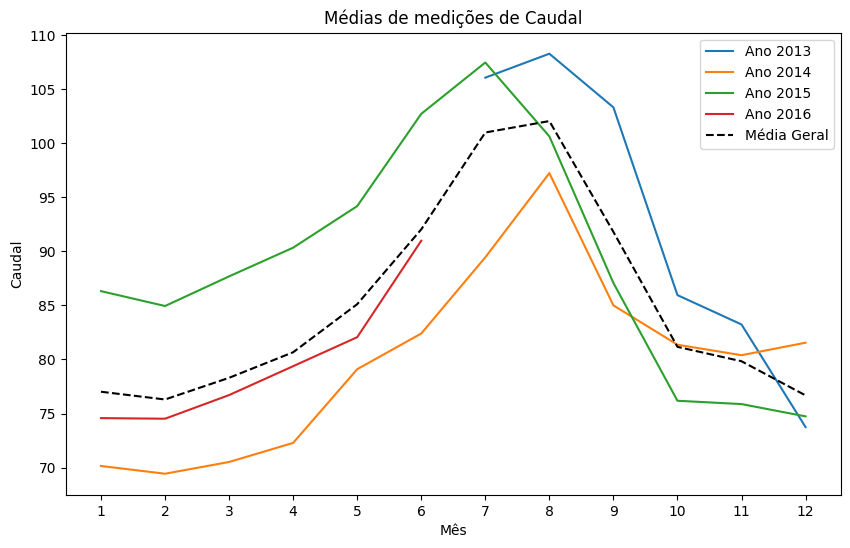


     Year  Month  Desvio_Padrao
0   2013      7      36.519801
1   2013      8      35.623770
2   2013      9      32.963816
3   2013     10      23.658046
4   2013     11      21.982281
5   2013     12      23.572604
6   2014      1      22.112527
7   2014      2      22.785413
8   2014      3      23.163750
9   2014      4      24.573060
10  2014      5      27.616076
11  2014      6      27.784912
12  2014      7      27.589311
13  2014      8      25.521399
14  2014      9      24.305129
15  2014     10      23.054624
16  2014     11      21.153442
17  2014     12      21.597616
18  2015      1      21.670869
19  2015      2      21.271526
20  2015      3      21.839702
21  2015      4      24.248956
22  2015      5      35.766201
23  2015      6      30.475555
24  2015      7      30.813620
25  2015      8      31.573369
26  2015      9      28.611747
27  2015     10      25.011980
28  2015     11      24.006542
29  2015     12      23.604796
30  2016      1      22.331135
31  20

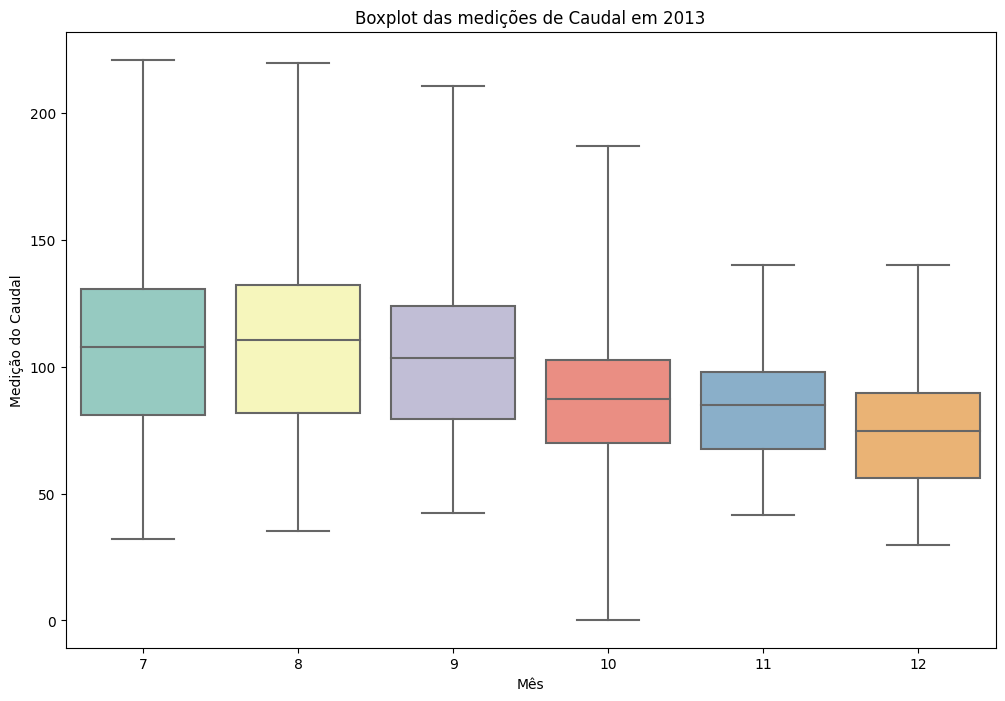

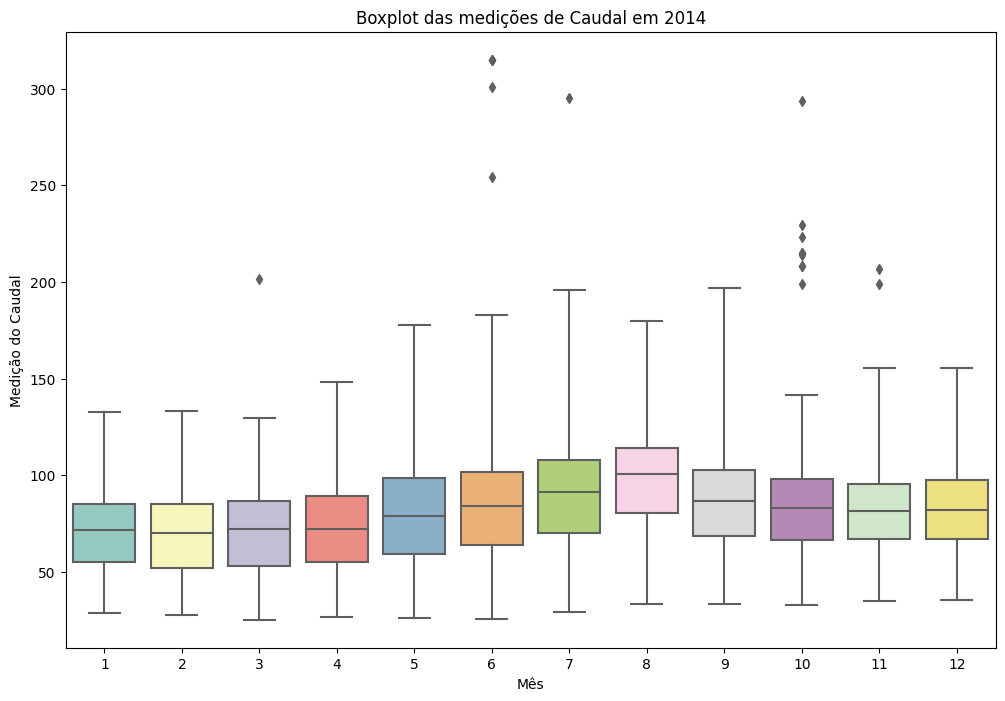

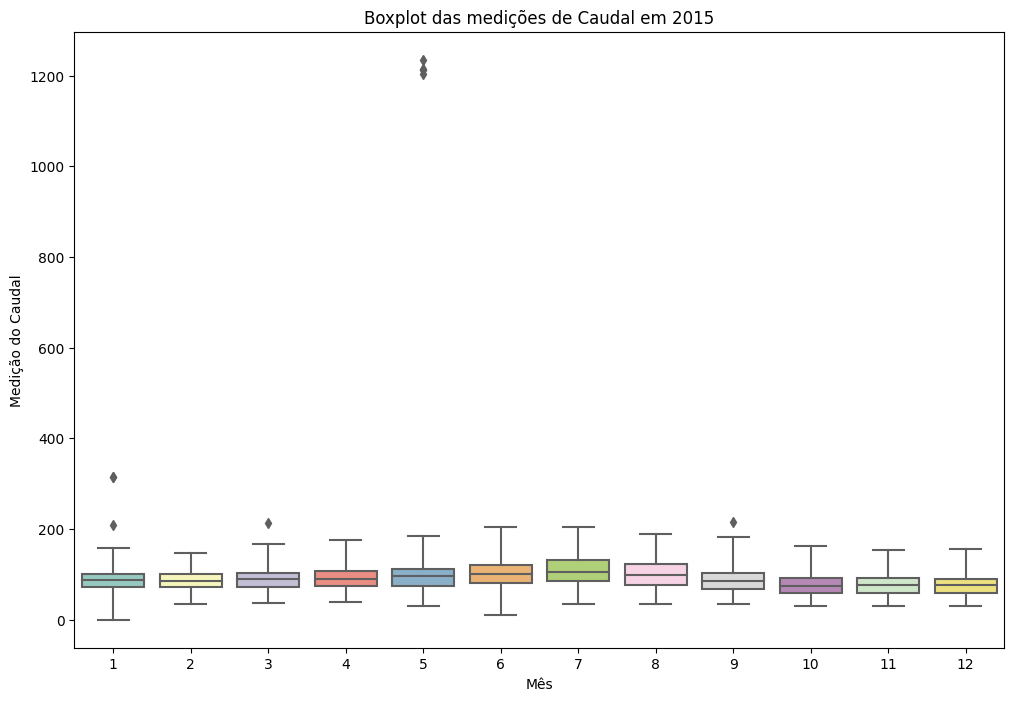

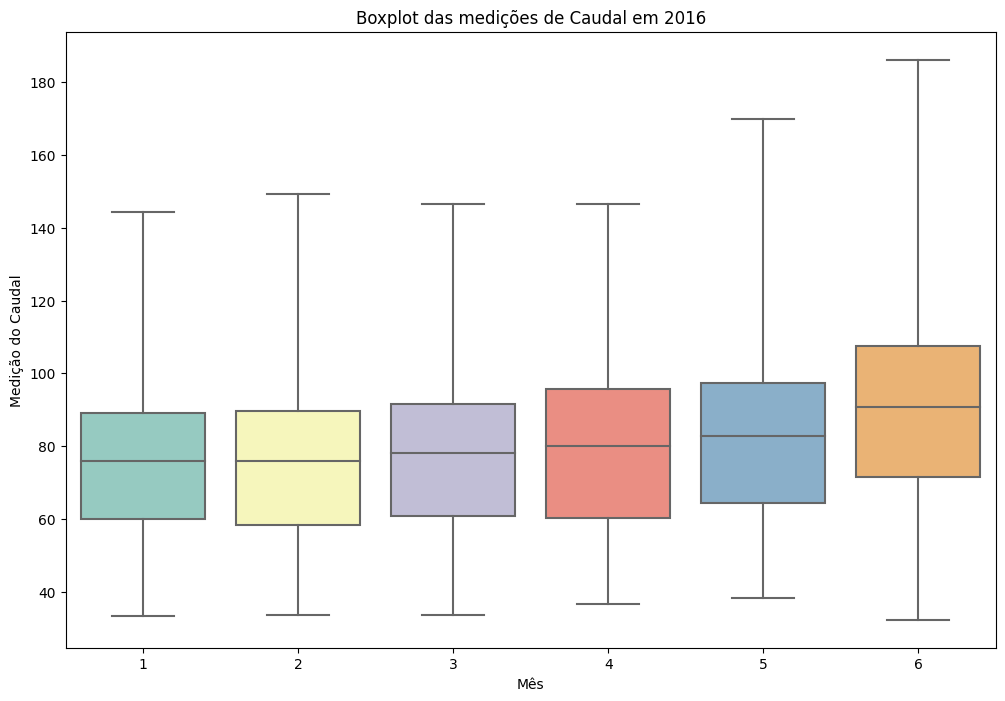



    Year  Month  Min_Value  Q1_Value   Median  Q3_Value  Max_Value
0   2013      7      32.10   81.0200  107.650  130.7000     221.00
1   2013      8      35.30   81.6650  110.600  132.4000     219.60
2   2013      9      42.20   79.4000  103.400  123.9000     210.50
3   2013     10       0.30   69.8000   87.100  102.5000     187.15
4   2013     11      41.40   67.7000   85.100   97.8875     140.15
5   2013     12      29.65   56.1000   74.600   89.5000     140.10
12  2014      1      28.40   55.1000   71.400   85.0300     132.80
13  2014      2      27.80   51.7375   69.900   85.2625     133.20
14  2014      3      25.17   53.0000   72.150   86.3650     201.33
15  2014      4      26.43   54.9000   72.300   89.0000     147.95
16  2014      5      26.00   59.0700   78.600   98.4000     177.50
17  2014      6      25.70   64.0075   83.800  101.6375     315.00
6   2014      7      29.30   70.2000   91.100  107.9000     294.98
7   2014      8      33.20   80.5625  100.675  114.0000     

In [ ]:
cerca = pd.read_excel("/content/cerca.xlsx")

resultados(cerca)

### Maceirinha

Existem 294111 medições de Caudal. 

A DataFrame tem 2 colunas 

Não existem duplicados.

Média de tempo entre medições: 0 days 00:05:21.837339770 

Média de tempo entre medições por ano:
Year
2013   0 days 00:05:16.811813706
2014   0 days 00:05:21.683701572
2015   0 days 00:05:22.820378957
2016   0 days 00:05:25.388732160
Name: TimeDiff, dtype: timedelta64[ns]

Média de tempo entre medições por ano e mês:
Year  Month
2013  7       0 days 00:05:20.937088076
      8       0 days 00:05:16.958219907
      9       0 days 00:05:14.394178289
      10      0 days 00:05:10.632030615
      11      0 days 00:05:18.642567318
      12      0 days 00:05:19.515744274
2014  1       0 days 00:05:19.909221213
      2       0 days 00:05:24.594123171
      3       0 days 00:05:22.007694157
      4       0 days 00:05:17.311788468
      5       0 days 00:05:27.363403006
      6       0 days 00:05:22.490669320
      7       0 days 00:05:16.177546924
      8       0 days 00:05:20.469236293
      9       0 da

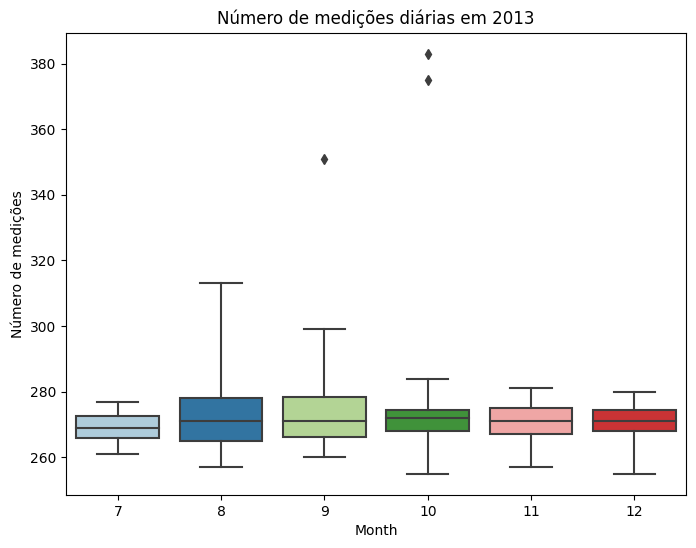

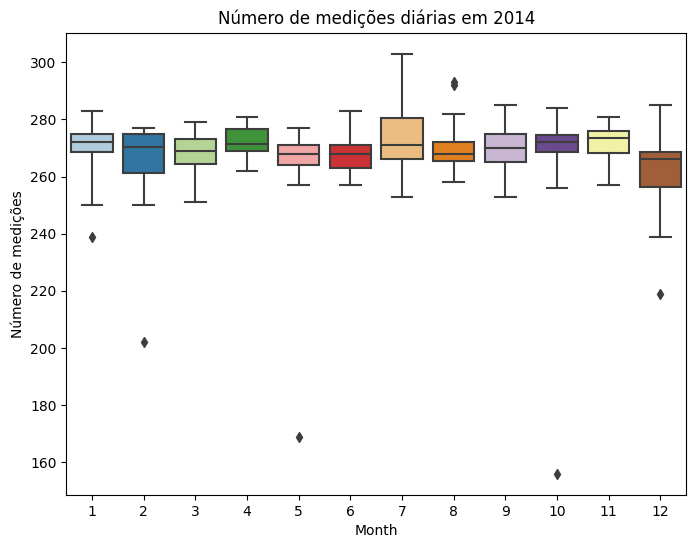

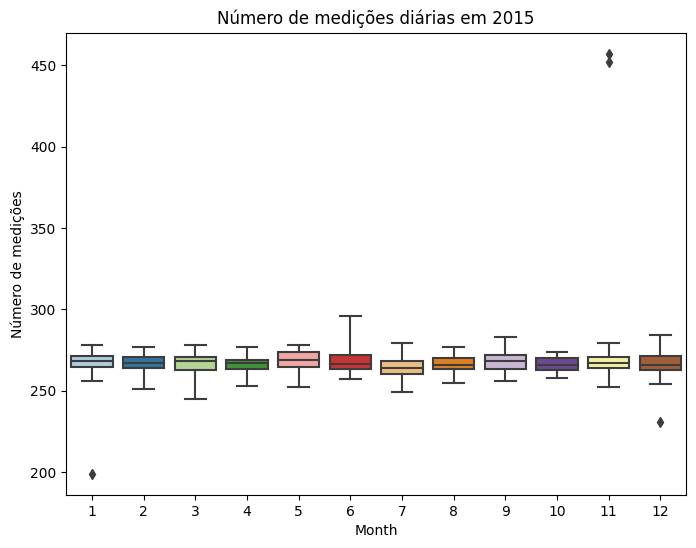

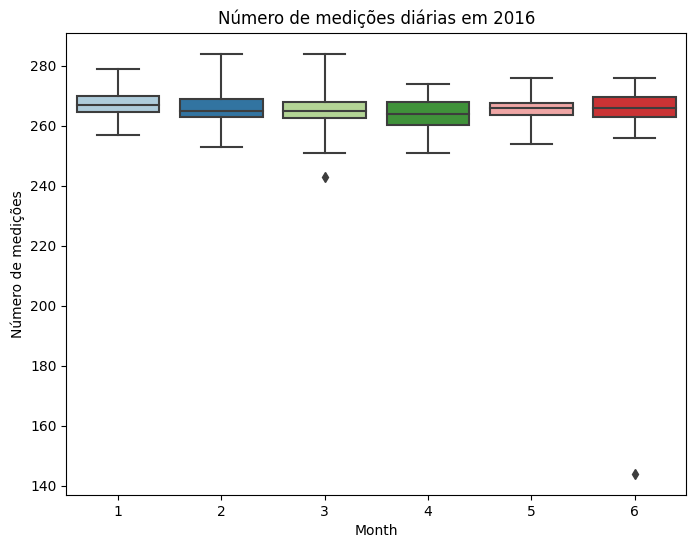


 Quantos meses tiveram medições naquele ano:
   Year  Número de meses
0  2013                6
1  2014               12
2  2015               12
3  2016                6

 Quantos dias tiveram medições naquele ano:
   Year  Número de dias
0  2013             184
1  2014             365
2  2015             365
3  2016             182


Existem medições de 184 dias distintos em 2013. Esperava-se que existissem 185.
Existem medições de 365 dias distintos em 2014. Esperava-se que existissem 365.
Existem medições de 365 dias distintos em 2015. Esperava-se que existissem 365.
Existem medições de 182 dias distintos em 2016. Esperava-se que existissem 186.


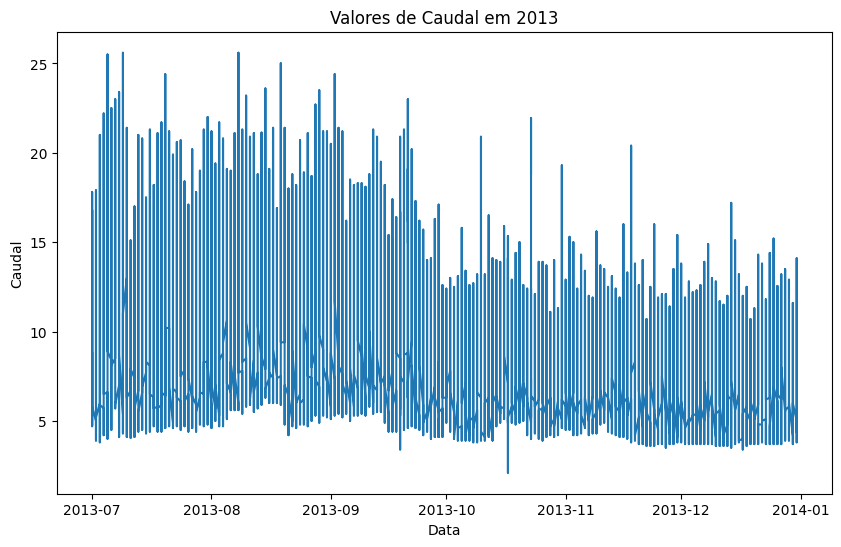

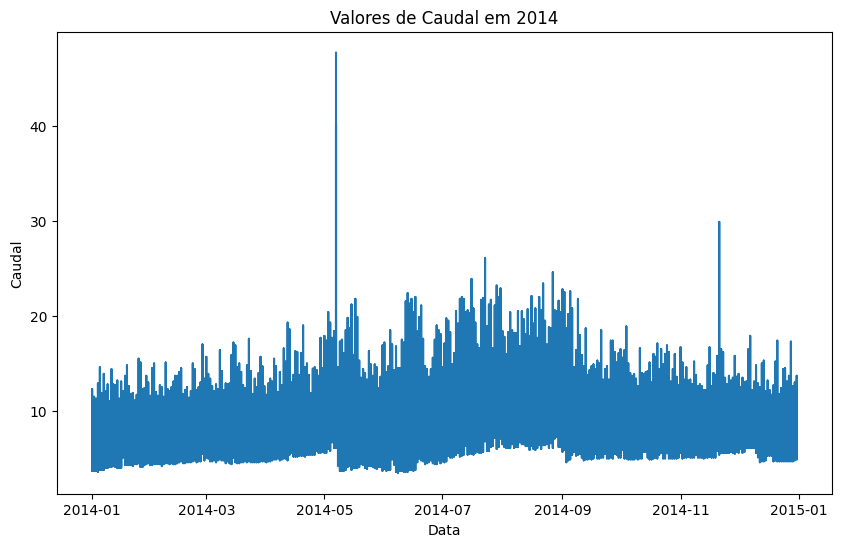

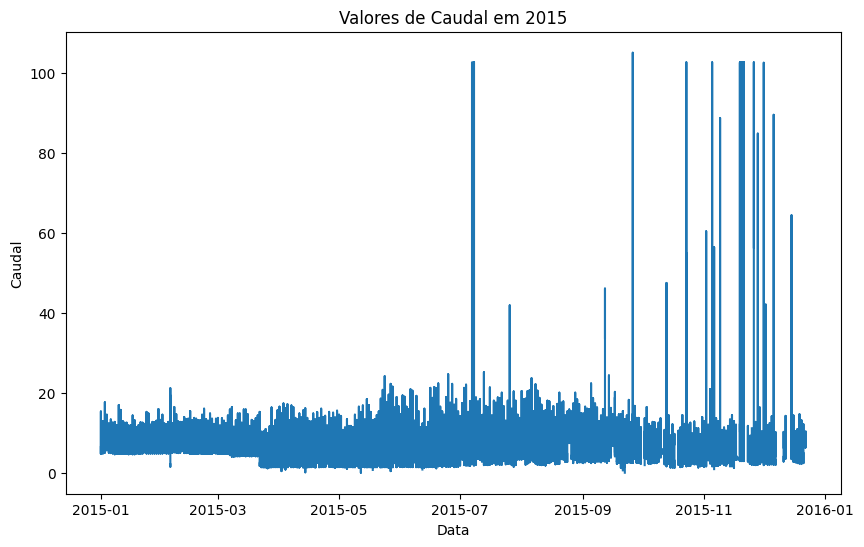

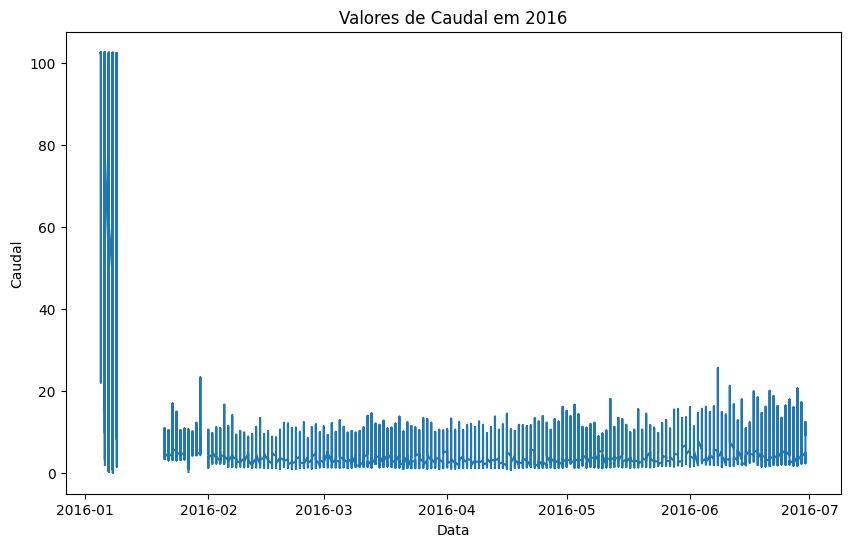


 Não existem falhas nos tempos

 Existem as seguintes falhas nos dados:
             Date      Time  Caudal
201    2013-07-01  17:43:00     NaN
21215  2013-09-17  14:29:00     NaN
21221  2013-09-17  14:39:00     NaN
21836  2013-09-19  15:14:00     NaN
22383  2013-09-21  09:47:00     NaN
...           ...       ...     ...
254294 2016-02-01  09:48:00     NaN
254295 2016-02-01  09:49:00     NaN
254296 2016-02-01  09:53:00     NaN
254297 2016-02-01  09:55:00     NaN
294110 2016-06-30  13:15:00     NaN

[15359 rows x 3 columns]

 Existem 15359 falhas de leituras 

Número de falhas por ano:
   Year  Número de Falhas
0  2013                54
1  2014                12
2  2015              9688
3  2016              5605

 Todos os dias tem pelo menos uma medição sem falhas.

 Número de medições por ano:
   Year  Número Total de medições
0  2013                     50126
1  2014                     98022
2  2015                     88001
3  2016                     42603

 Número de medições 

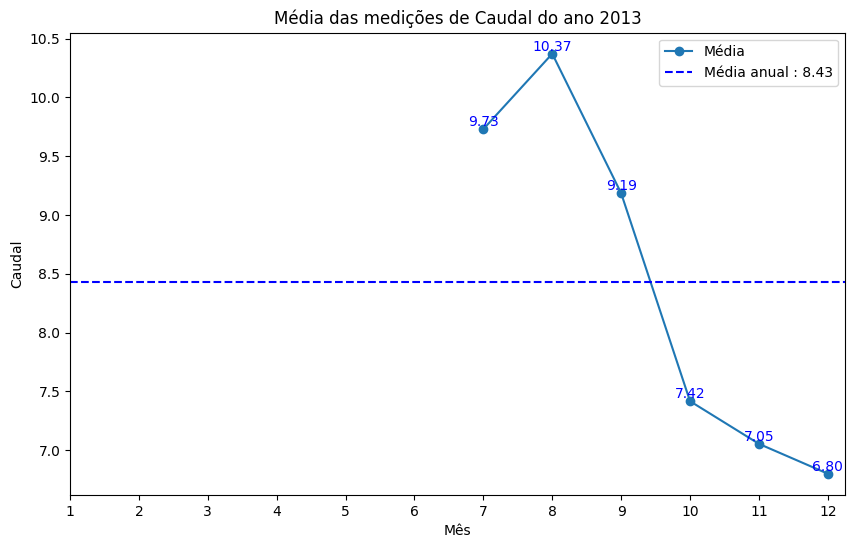

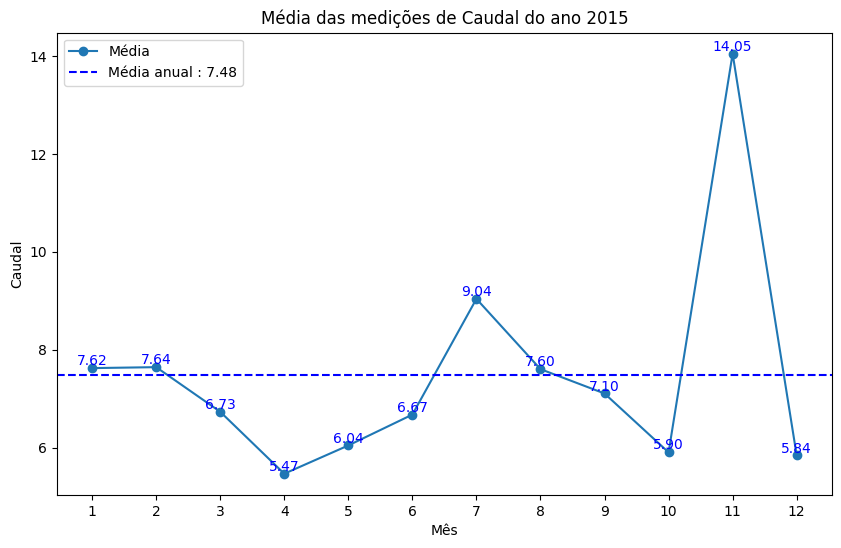

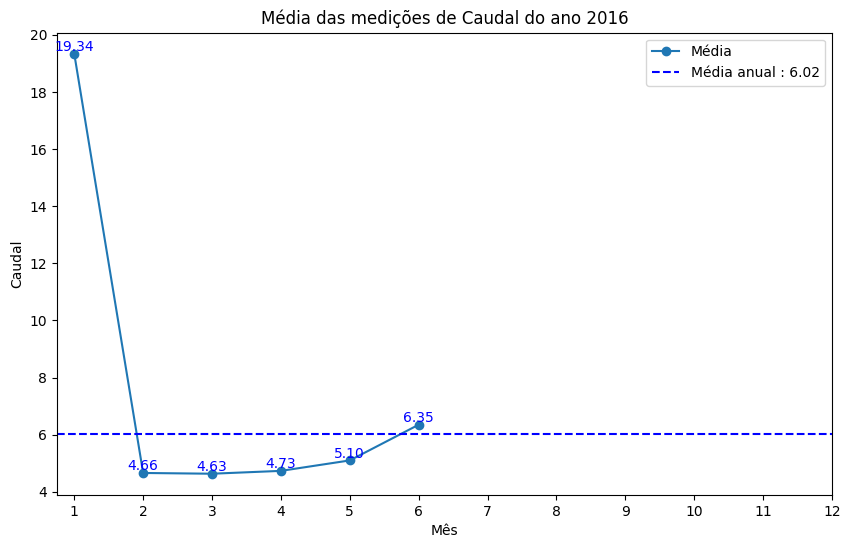

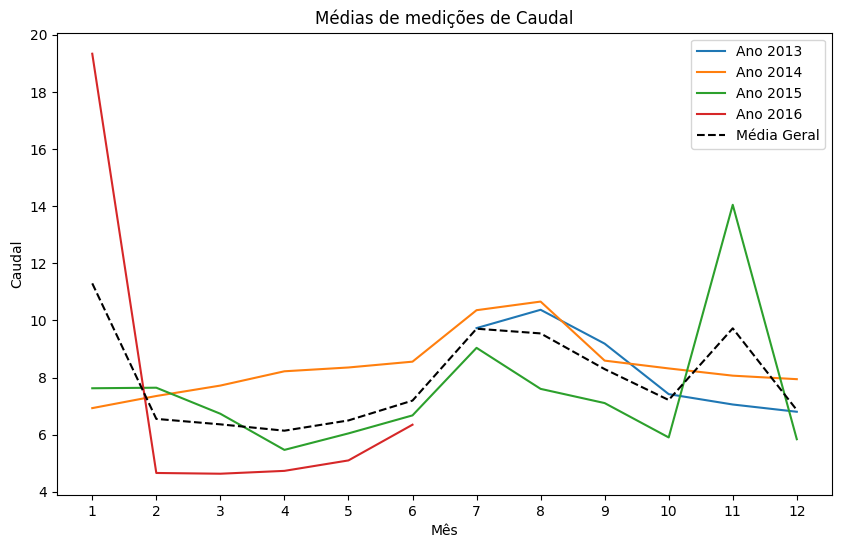


     Year  Month  Desvio_Padrao
0   2013      7       4.129537
1   2013      8       3.859051
2   2013      9       3.457831
3   2013     10       2.298979
4   2013     11       2.144007
5   2013     12       2.203129
6   2014      1       1.998197
7   2014      2       2.063075
8   2014      3       2.215550
9   2014      4       2.339061
10  2014      5       3.352061
11  2014      6       3.486083
12  2014      7       3.752983
13  2014      8       3.231577
14  2014      9       2.594582
15  2014     10       2.395630
16  2014     11       2.024288
17  2014     12       2.052682
18  2015      1       2.052488
19  2015      2       2.132455
20  2015      3       2.623216
21  2015      4       2.915697
22  2015      5       3.474959
23  2015      6       3.938735
24  2015      7      12.824999
25  2015      8       3.536434
26  2015      9       3.333513
27  2015     10       6.243606
28  2015     11      26.019522
29  2015     12       3.351004
30  2016      1      27.207490
31  20

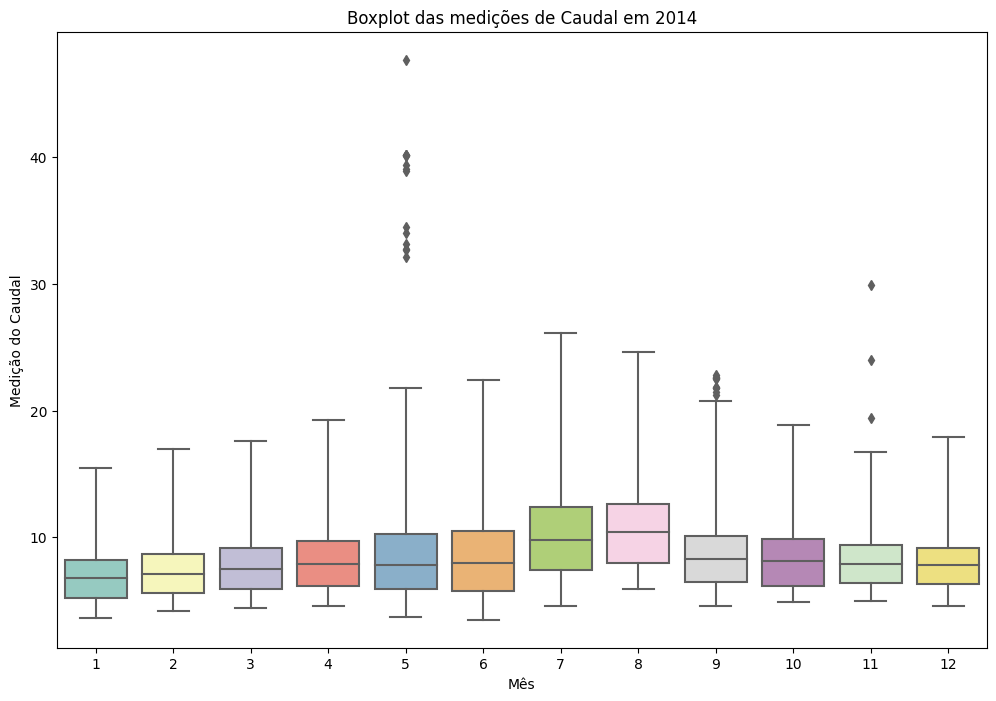

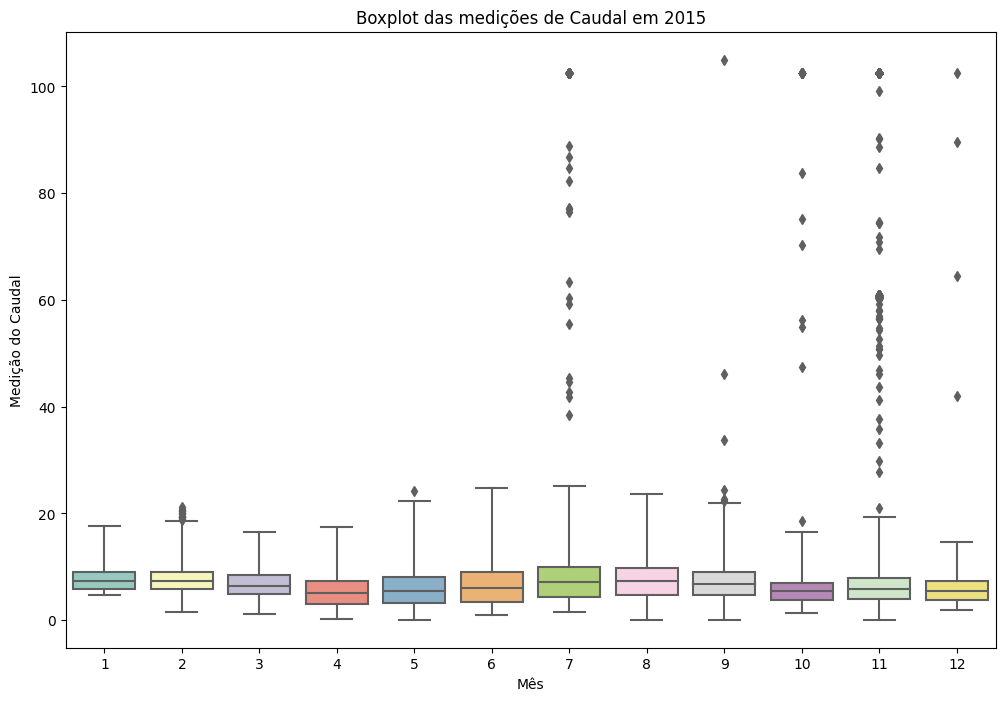

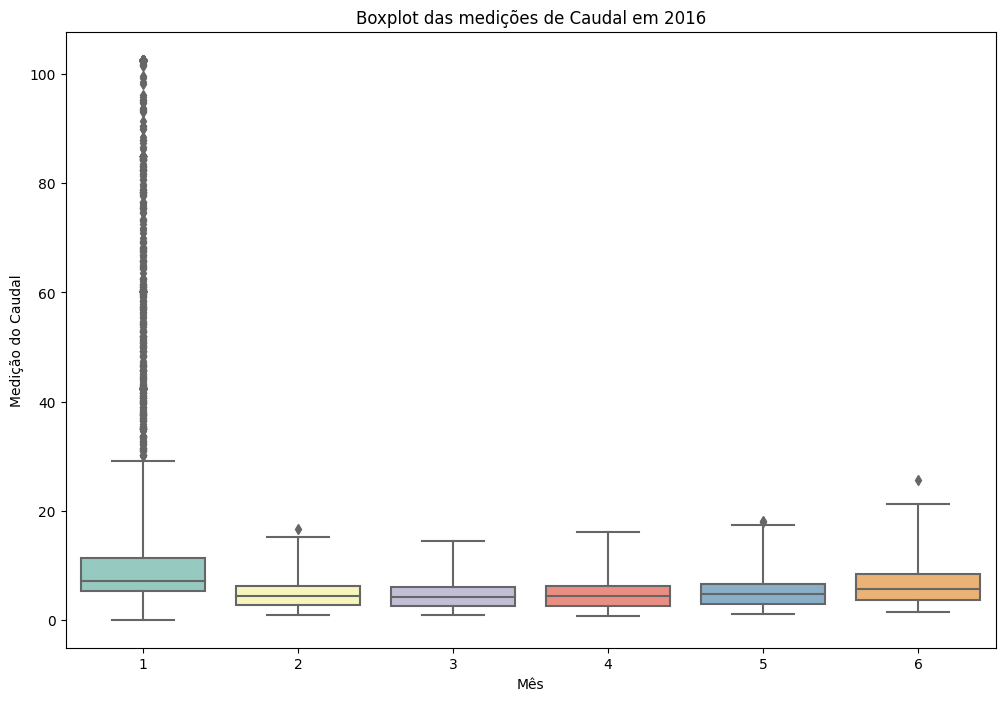



    Year  Month  Min_Value  Q1_Value  Median  Q3_Value  Max_Value
0   2013      7        3.8       6.2     9.1    12.300      25.60
1   2013      8        4.2       7.3     9.9    12.800      25.60
2   2013      9        3.4       6.3     8.7    11.200      24.40
3   2013     10        2.1       5.5     7.2     9.000      21.94
4   2013     11        3.5       5.3     6.8     8.450      20.40
5   2013     12        3.4       4.9     6.6     8.200      17.20
12  2014      1        3.6       5.2     6.8     8.205      15.50
13  2014      2        4.2       5.6     7.1     8.700      17.00
14  2014      3        4.4       5.9     7.5     9.200      17.60
15  2014      4        4.6       6.2     7.9     9.700      19.30
16  2014      5        3.7       5.9     7.8    10.300      47.70
17  2014      6        3.5       5.8     8.0    10.500      22.40
6   2014      7        4.6       7.4     9.8    12.400      26.10
7   2014      8        5.9       8.0    10.4    12.600      24.60
8   2014

In [ ]:
maceirinha = pd.read_excel("/content/maceirinha.xlsx")

resultados(maceirinha)

### Porto Carro

Existem 382602 medições de Caudal. 

A DataFrame tem 2 colunas 

Não existem duplicados.

Média de tempo entre medições: 0 days 00:04:06.957849038 

Média de tempo entre medições por ano:
Year
2013   0 days 00:04:27.231168654
2014   0 days 00:03:34.479545686
2015   0 days 00:04:18.361638852
2016   0 days 00:04:47.064169751
Name: TimeDiff, dtype: timedelta64[ns]

Média de tempo entre medições por ano e mês:
Year  Month
2013  7       0 days 00:08:09.270633397
      8       0 days 00:09:03.802103622
      9       0 days 00:03:36.270337922
      10      0 days 00:03:35.434362934
      11      0 days 00:03:33.944696657
      12      0 days 00:03:32.345013477
2014  1       0 days 00:03:33.219232606
      2       0 days 00:03:34.224229543
      3       0 days 00:03:33.427888446
      4       0 days 00:03:35.882058970
      5       0 days 00:03:33.486370157
      6       0 days 00:03:38.435998988
      7       0 days 00:03:35.179561340
      8       0 days 00:03:36.256762212
      9       0 da

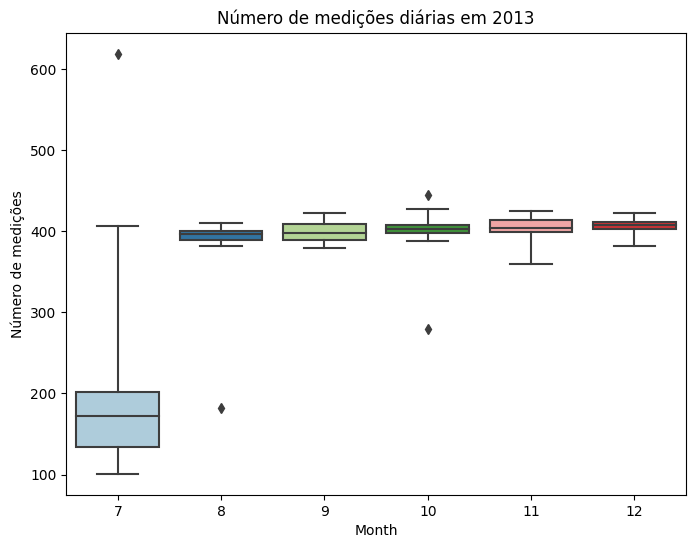

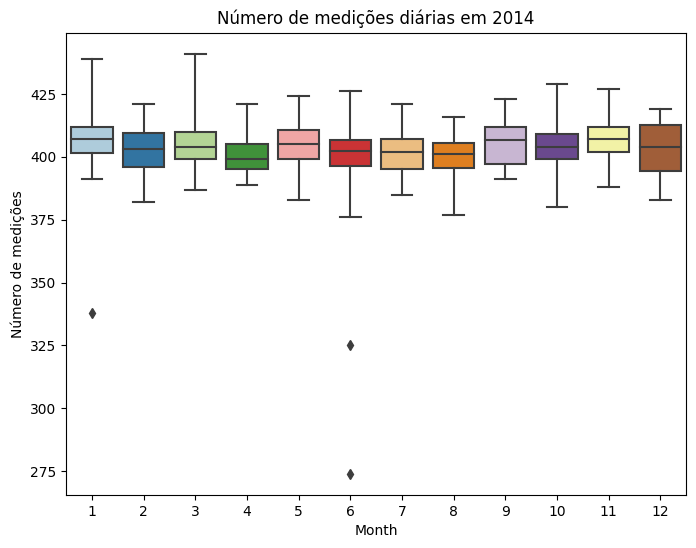

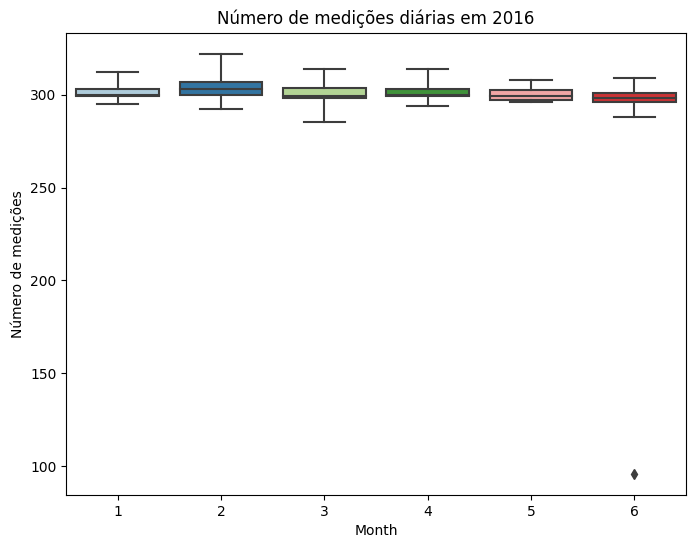


 Quantos meses tiveram medições naquele ano:
   Year  Número de meses
0  2013                6
1  2014               12
2  2015               12
3  2016                6

 Quantos dias tiveram medições naquele ano:
   Year  Número de dias
0  2013             151
1  2014             365
2  2015             365
3  2016             182


Existem medições de 151 dias distintos em 2013. Esperava-se que existissem 185.
Existem medições de 365 dias distintos em 2014. Esperava-se que existissem 365.
Existem medições de 365 dias distintos em 2015. Esperava-se que existissem 365.
Existem medições de 182 dias distintos em 2016. Esperava-se que existissem 186.


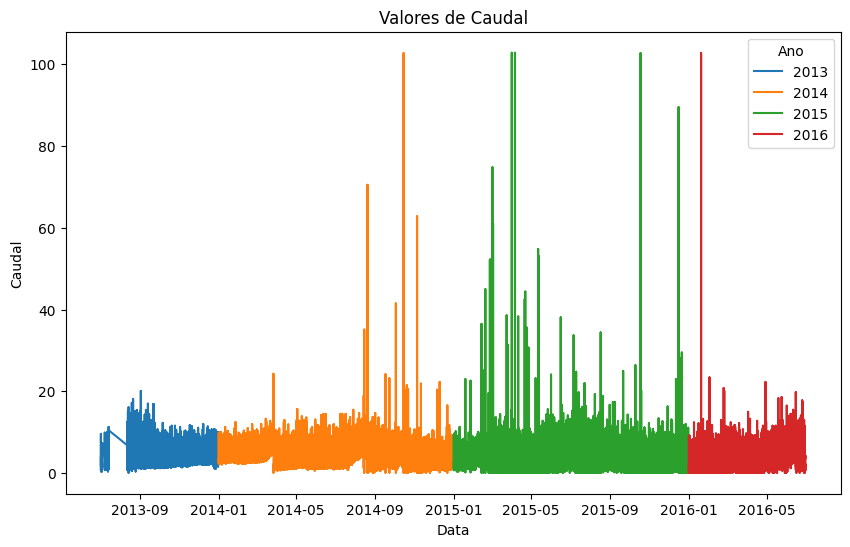

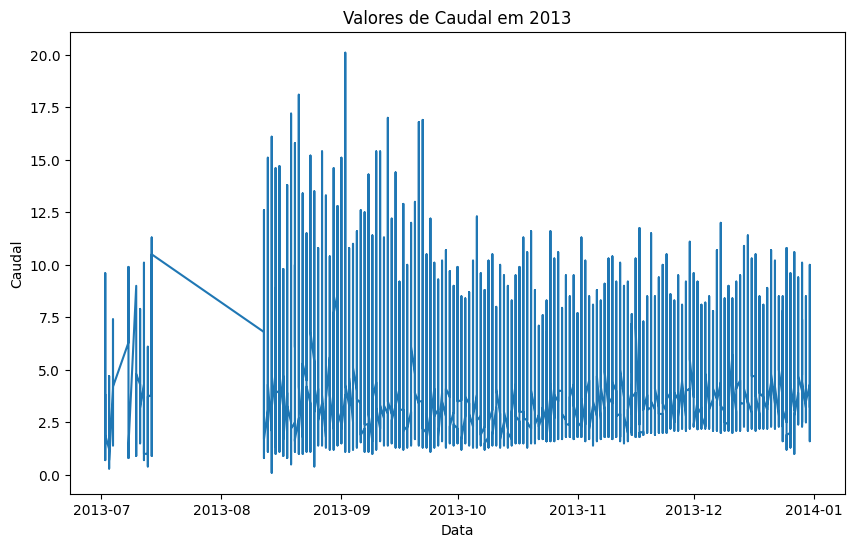

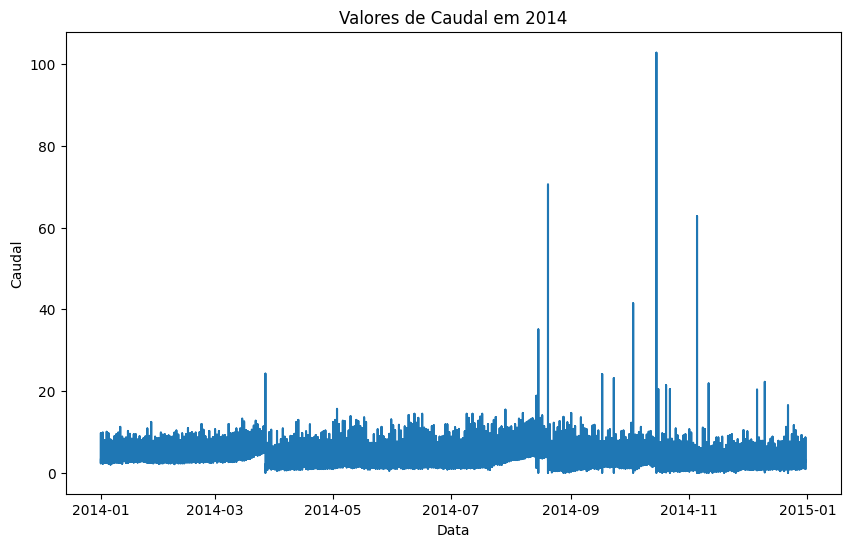

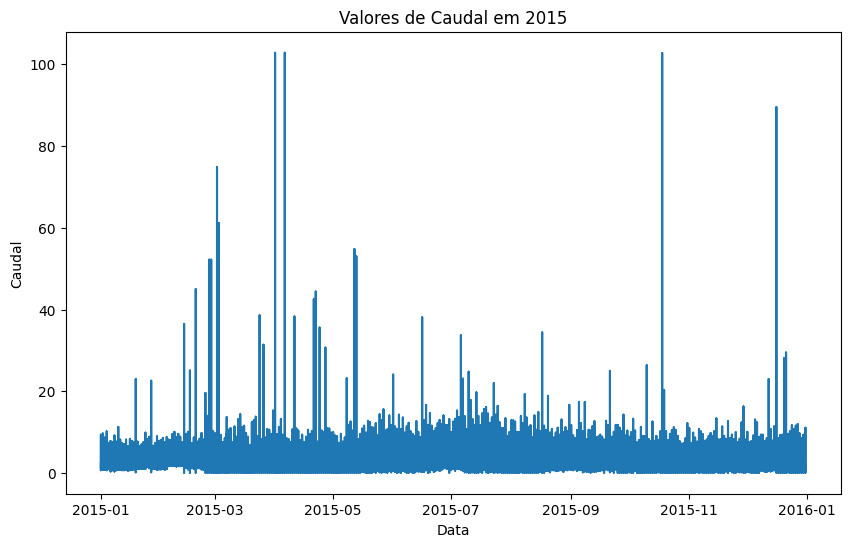

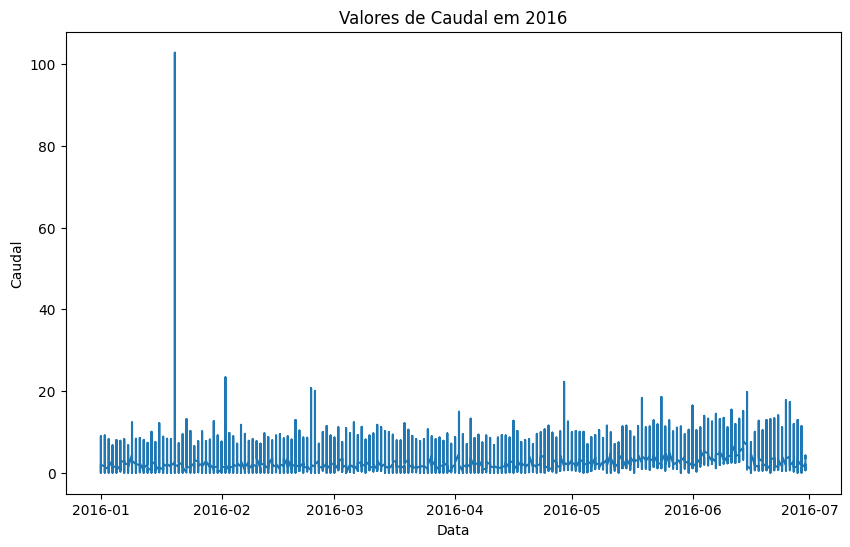


 Não existem falhas nos tempos

 Existem as seguintes falhas nos dados:
             Date      Time  Caudal
3188   2013-08-15  08:17:00     NaN
5183   2013-08-20  09:49:00     NaN
31294  2013-10-24  18:26:00     NaN
31328  2013-10-24  20:34:00     NaN
38770  2013-11-12  09:00:00     NaN
39907  2013-11-15  08:28:00     NaN
39936  2013-11-15  10:07:00     NaN
55939  2013-12-24  15:36:00     NaN
57967  2013-12-29  15:33:00     NaN
75025  2014-02-09  17:14:00     NaN
75117  2014-02-09  22:04:00     NaN
75123  2014-02-09  22:28:00     NaN
75126  2014-02-09  22:32:00     NaN
75129  2014-02-09  22:43:00     NaN
75132  2014-02-09  22:54:00     NaN
75138  2014-02-10  00:48:00     NaN
75159  2014-02-10  01:53:00     NaN
113536 2014-05-16  09:25:00     NaN
121014 2014-06-04  08:09:00     NaN
121015 2014-06-04  08:12:00     NaN
125663 2014-06-15  19:06:00     NaN
129982 2014-06-26  14:50:00     NaN
150425 2014-08-16  12:36:00     NaN
167956 2014-09-29  01:33:00     NaN
167959 2014-09-29  01:37:00

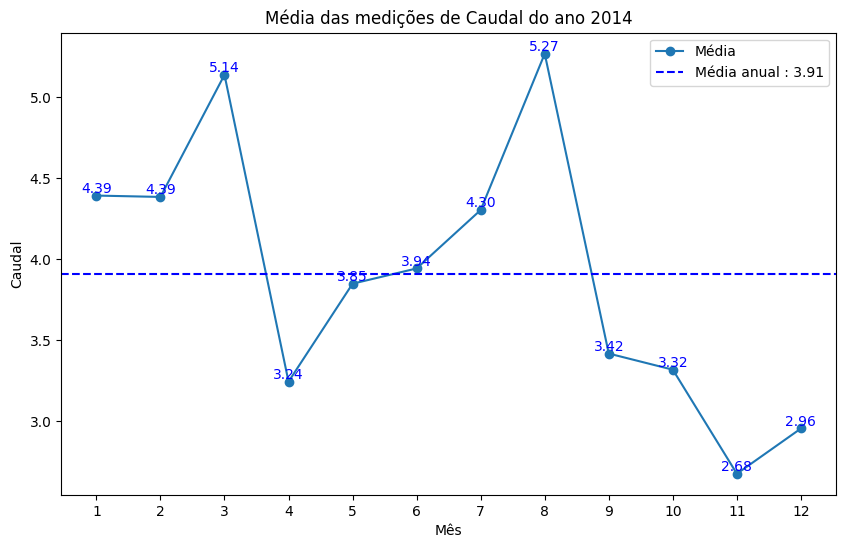

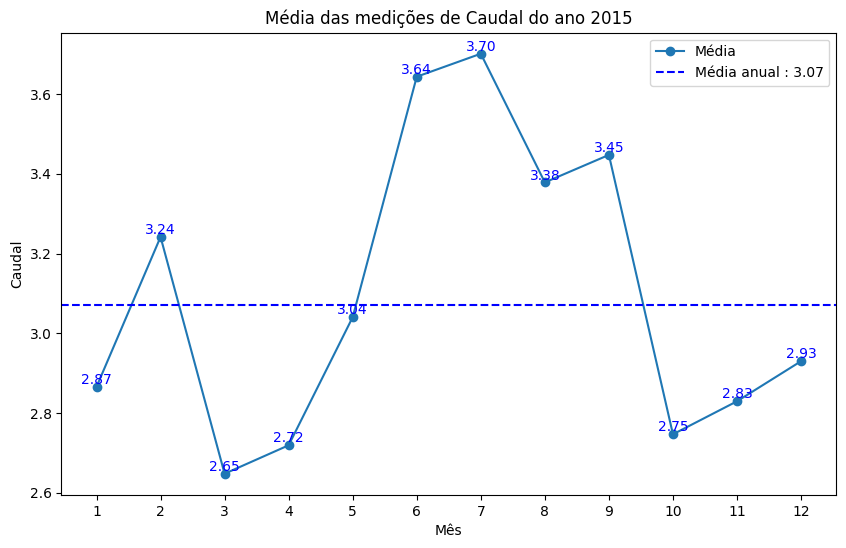


     Year  Month  Desvio_Padrao
0   2013      7       2.306083
1   2013      8       2.762584
2   2013      9       2.377039
3   2013     10       1.648607
4   2013     11       1.545341
5   2013     12       1.563942
6   2014      1       1.388342
7   2014      2       1.405488
8   2014      3       1.944018
9   2014      4       1.752601
10  2014      5       2.151015
11  2014      6       2.129969
12  2014      7       2.228245
13  2014      8       2.710425
14  2014      9       1.886662
15  2014     10       2.268026
16  2014     11       1.681598
17  2014     12       1.637587
18  2015      1       1.609876
19  2015      2       2.505802
20  2015      3       2.606067
21  2015      4       3.256834
22  2015      5       2.440026
23  2015      6       2.414222
24  2015      7       2.564462
25  2015      8       2.396333
26  2015      9       2.179181
27  2015     10       2.220186
28  2015     11       1.858683
29  2015     12       2.702747
30  2016      1       2.032191
31  20

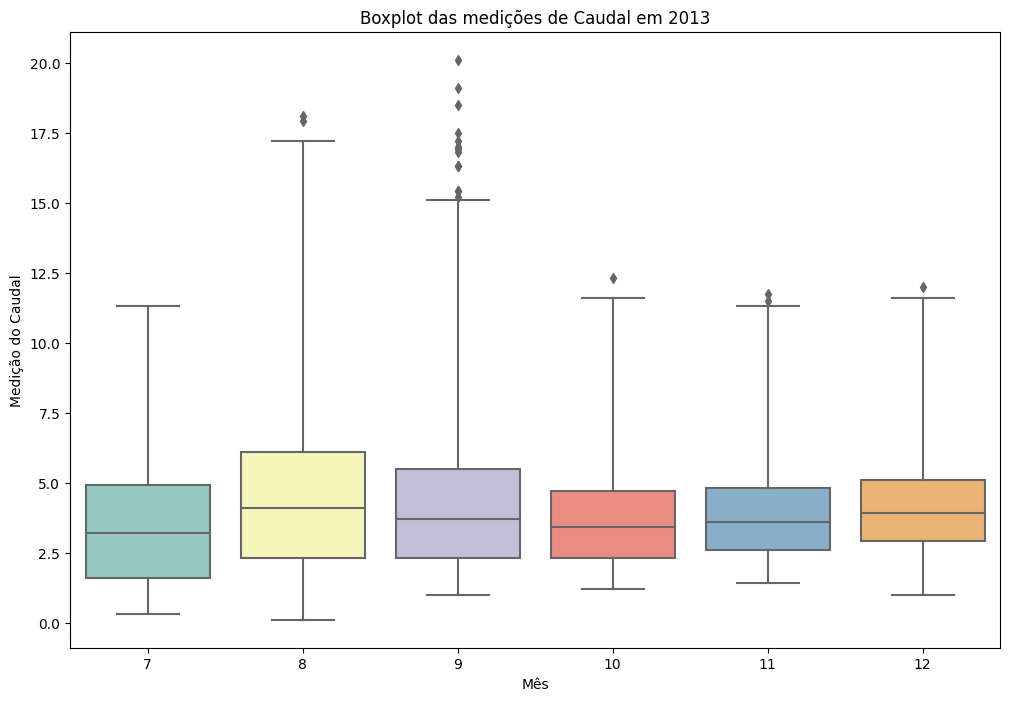

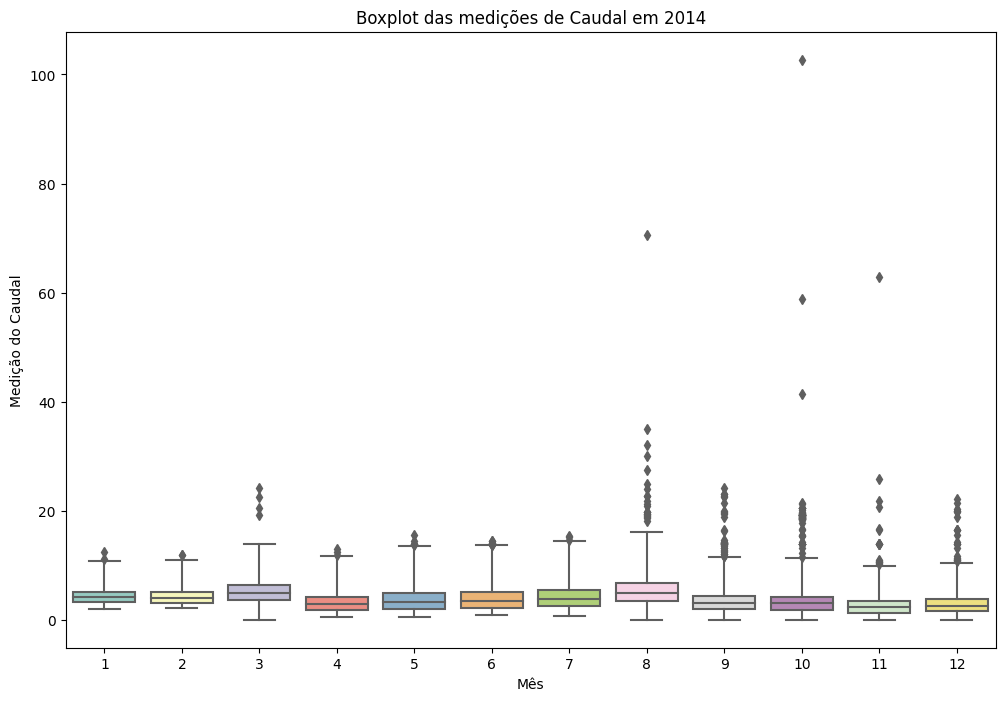

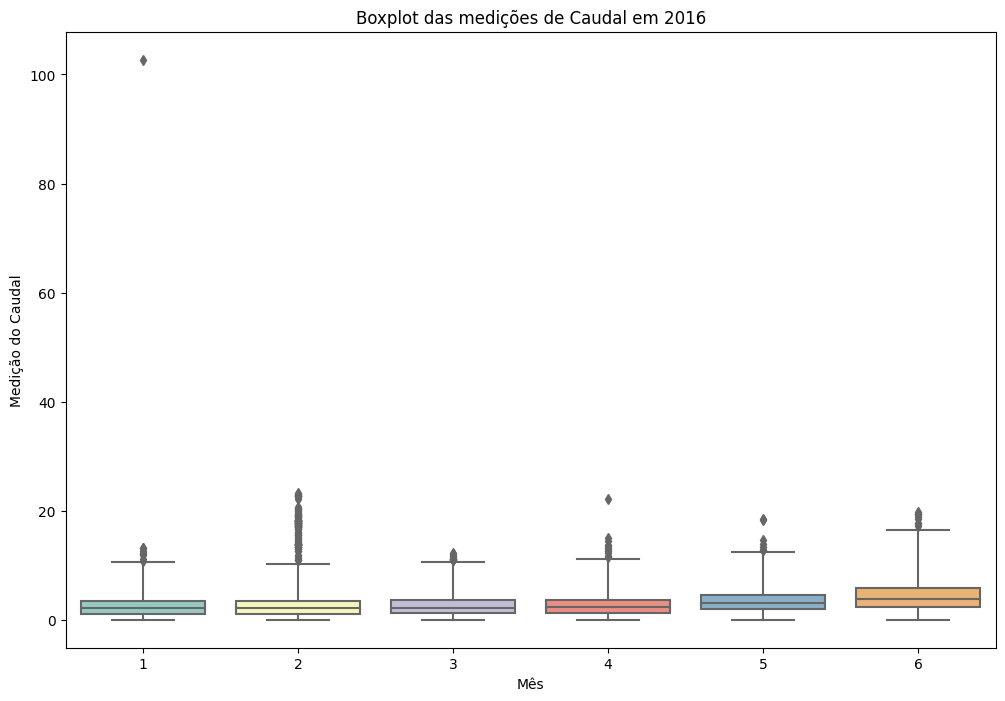



    Year  Month  Min_Value  Q1_Value  Median  Q3_Value  Max_Value
0   2013      7        0.3       1.6     3.2       4.9      11.30
1   2013      8        0.1       2.3     4.1       6.1      18.10
2   2013      9        1.0       2.3     3.7       5.5      20.10
3   2013     10        1.2       2.3     3.4       4.7      12.30
4   2013     11        1.4       2.6     3.6       4.8      11.75
5   2013     12        1.0       2.9     3.9       5.1      12.00
12  2014      1        2.1       3.3     4.2       5.2      12.50
13  2014      2        2.2       3.2     4.1       5.2      12.00
14  2014      3        0.1       3.7     5.0       6.4      24.30
15  2014      4        0.6       1.8     2.9       4.3      13.00
16  2014      5        0.6       2.1     3.4       5.0      15.70
17  2014      6        0.9       2.2     3.6       5.1      14.50
6   2014      7        0.8       2.6     3.9       5.6      15.50
7   2014      8        0.1       3.6     5.0       6.8      70.50
8   2014

In [ ]:
porto_carro = pd.read_excel("/content/porto_carro.xlsx")

resultados(porto_carro)

# Normalização

In [302]:
df = pd.read_excel("/content/cerca.xlsx")

##Funcões

In [54]:
def normalize(resampled_df, time):
    for col in resampled_df.columns:

        missing_mask = resampled_df[col].isnull()

        for idx, value in resampled_df[col][missing_mask].items():

            before_idx = None
            for i in reversed(range(resampled_df.index.get_loc(idx))):
                if not pd.isnull(resampled_df.at[resampled_df.index[i], col]):
                    before_idx = resampled_df.index[i]
                    break
            after_idx = None
            for i in range(resampled_df.index.get_loc(idx), len(resampled_df.index)):
                if not pd.isnull(resampled_df.at[resampled_df.index[i], col]):
                    after_idx = resampled_df.index[i]
                    break

            if before_idx is not None and after_idx is not None and (after_idx - before_idx).total_seconds() <= pd.Timedelta(minutes=time).total_seconds():
                resampled_df.at[idx, col] = resampled_df[col][before_idx] + \
                                            ((resampled_df[col][after_idx] - resampled_df[col][before_idx]) /
                                            (after_idx - before_idx).total_seconds()) * \
                                            (idx - before_idx).total_seconds()

In [55]:
def years(df):
  return df.index.year.unique()

def normalizedPlot(df, time):

  plt.figure(figsize=(10, 6))


  for year in years(df):

      year_data = df[df.index.year == year]

      plt.plot(year_data.index, year_data['Caudal'], label=str(year))

  plt.xlabel('Data')
  plt.ylabel('Caudal')
  plt.title(f'Valores normalizados com intervalo máximo de {time} minutos')
  plt.legend(title='Ano')

  plt.ylim(-5, 90)
  plt.show()


In [56]:
def calculate_mean_area(df):
    mean_areas = {}
    for date, data in df.groupby(df.index.date):
        times = data.index.time
        values = data['Caudal']
        areas = []
        for i in range(len(values) - 1):
            if not pd.isnull(values[i]) and not pd.isnull(values[i + 1]):
                x = np.array([times[i].hour * 3600 + times[i].minute * 60 + times[i].second,
                              times[i + 1].hour * 3600 + times[i + 1].minute * 60 + times[i + 1].second])
                y = np.array([values[i], values[i + 1]])
                areas.append(np.trapz(y, x))
        if areas:
            mean_areas[date] = np.mean(areas)
    return mean_areas

In [57]:
def diference(df, column1, column2):
  plt.figure(figsize=(10, 6))
  plt.plot(df['Date'], df[f'{column1}'] - df[f'{column2}'], marker='o')
  plt.xlabel('Date')
  plt.ylabel('Difference in Area')
  plt.title('Difference in Daily Mean Area between Old and New DataFrames')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [58]:
def comparison(df, column1, column2):
  df.plot(kind='scatter', x=column1, y=column2, s=32, alpha=.8)
  plt.gca().spines[['top', 'right',]].set_visible(False)

In [59]:
def remove_outliers_iqr(df, column):
    df['Year'] = df['Data'].dt.year
    df['Month'] = df['Data'].dt.month
    grouped = df.groupby(['Year', 'Month'])

    df_filtered = pd.DataFrame()
    outliers_above = pd.DataFrame()
    outliers_below = pd.DataFrame()

    for (year, month), group in grouped:
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        group_filtered = group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
        outliers_above_group = group[group[column] > upper_bound]
        outliers_below_group = group[group[column] < lower_bound]

        df_filtered = pd.concat([df_filtered, group_filtered])
        outliers_above = pd.concat([outliers_above, outliers_above_group])
        outliers_below = pd.concat([outliers_below, outliers_below_group])

    return df_filtered, outliers_above, outliers_below


In [60]:
def boxplot_outliers(df):
  df['Data'] = pd.to_datetime(df['Data'])

  plt.figure(figsize=(10, 6))
  plt.boxplot(df['Caudal'], whis=100)
  plt.title('Diagrama de Caixas dos Outliers')
  plt.ylabel('Caudal')
  plt.xticks([1], ['Caudal'])
  plt.grid(True)
  plt.show()

In [61]:
def statistics(df_no_errors):
    dfs = []

    df_no_errors['Year'] = df_no_errors['Data'].dt.year
    df_no_errors['Month'] = df_no_errors['Data'].dt.month

    for year in df_no_errors['Year'].unique():
        for month in df_no_errors['Month'].unique():
            subset_data = df_no_errors[(df_no_errors['Year'] == year) & (df_no_errors['Month'] == month)]

            if not subset_data.empty:
                min_value = subset_data['Caudal'].min()
                max_value = subset_data['Caudal'].max()
                count = len(subset_data)

                dfs.append(pd.DataFrame({
                    'Year': [year],
                    'Month': [month],
                    'Min_Value': [min_value],
                    'Max_Value': [max_value],
                    'Count': [count]
                }))

    summary_df = pd.concat(dfs, ignore_index=True)

    summary_df_sorted = summary_df.sort_values(by=['Year', 'Month'])
    return summary_df_sorted

In [62]:
def missings_study(df):
  df['TimeDiff'] = df['Data'].diff()

  group_start = df.iloc[0]['Data']
  group_count = 1

  result_dates = []
  result_consecutive_points = []
  result_time = []

  for i in range(1, len(df)):
      if df.iloc[i]['Data'] - df.iloc[i - 1]['Data'] > pd.Timedelta(minutes=15):
          result_dates.append(group_start)
          result_consecutive_points.append(group_count)
          duration_minutes = group_count * 15
          days = duration_minutes // (24 * 60)
          remaining_minutes = duration_minutes % (24 * 60)
          hours = remaining_minutes // 60
          minutes = remaining_minutes % 60
          time_str = f"{days} days {hours:02d}:{minutes:02d}:00"
          result_time.append(time_str)
          group_start = df.iloc[i]['Data']
          group_count = 1
      else:
          group_count += 1

  result_dates.append(group_start)
  result_consecutive_points.append(group_count)
  duration_minutes = (group_count - 1) * 15
  days = duration_minutes // (24 * 60)
  remaining_minutes = duration_minutes % (24 * 60)
  hours = remaining_minutes // 60
  minutes = remaining_minutes % 60
  time_str = f"{days} days {hours:02d}:{minutes:02d}:00"
  result_time.append(time_str)

  return pd.DataFrame({'Data': result_dates, 'Consecutive_Points': result_consecutive_points, 'Time': result_time})

In [63]:
def convert_to_time(value):
    minutes = value * 15
    hours = minutes // 60
    minutes = minutes % 60
    days = hours // 24
    hours = hours % 24
    seconds = 0
    return '{} days {:02d}:{:02d}:{:02d}'.format(int(days), int(hours), int(minutes), int(seconds))

In [64]:
def convert_to_time_less_than_1day(value):
    minutes = value * 15
    hours = minutes // 60
    minutes = minutes % 60
    seconds = 0
    return '{:02d}:{:02d}:{:02d}'.format(int(hours), int(minutes), int(seconds))

## Com outliers

In [ ]:
copy_df = df.copy()

In [ ]:
copy_df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
copy_df.set_index('Data', inplace=True)

In [ ]:
resampled_df = copy_df.resample('15T').asfreq()

In [ ]:
max30min_df = resampled_df.copy()
max15min_df = resampled_df.copy()
max60min_df = resampled_df.copy()

In [ ]:
normalize(max30min_df, 30)
normalize(max15min_df, 15)
normalize(max60min_df, 60)

KeyboardInterrupt: 

In [ ]:
normalizedPlot(max30min_df, 30)

In [ ]:
normalizedPlot(max15min_df, 15)

In [ ]:
normalizedPlot(max60min_df, 60)

In [ ]:
original_areas = calculate_mean_area(copy_df)

In [ ]:
original_areas = calculate_mean_area(copy_df)
max30min_areas = calculate_mean_area(max30min_df)
max15min_areas = calculate_mean_area(max15min_df)
max60min_areas = calculate_mean_area(max60min_df)

original_areas_df = pd.DataFrame(list(original_areas.items()), columns=['Date', 'Original_Area'])
max30min_areas_df = pd.DataFrame(list(max30min_areas.items()), columns=['Date', 'New_Area'])
max15min_areas_df = pd.DataFrame(list(max15min_areas.items()), columns=['Date', 'New_Area'])
max60min_areas_df = pd.DataFrame(list(max60min_areas.items()), columns=['Date', 'New_Area'])

comparison_max30min_df = original_areas_df.merge(max30min_areas_df, on='Date', how='outer')
comparison_max15min_df = original_areas_df.merge(max15min_areas_df, on='Date', how='outer')
comparison_max60min_df = original_areas_df.merge(max60min_areas_df, on='Date', how='outer')

In [ ]:
diference(comparison_max30min_df, 'Original_Area', 'New_Area')

In [ ]:
diference(comparison_max15min_df, 'Original_Area', 'New_Area')

In [ ]:
diference(comparison_max60min_df, 'Original_Area', 'New_Area')

In [ ]:
max30min_vs_max15min= comparison_max30min_df.merge(comparison_max15min_df, on='Date', how='outer')
max30min_vs_max60min = comparison_max30min_df.merge(comparison_max60min_df, on='Date', how='outer')
max15min_vs_max60min = comparison_max15min_df.merge(comparison_max60min_df, on='Date', how='outer')

In [ ]:
comparison(max30min_vs_max15min, 'New_Area_x', 'New_Area_y')

In [ ]:
comparison(max30min_vs_max60min, 'New_Area_x', 'New_Area_y')

In [ ]:
comparison(max15min_vs_max60min, 'New_Area_x', 'New_Area_y')

## Sem Outliers

In [303]:
no_outliers = df.copy()
no_outliers, outliers_above, outliers_below = remove_outliers_iqr(no_outliers, 'Caudal')

In [304]:
original_outlier_above = outliers_above
original_outlier_below = outliers_below

In [305]:
missings_df = df[df['Caudal'].isna()].copy()
print(statistics(missings_df).drop(['Min_Value', 'Max_Value'], axis=1))

print(f"\nExistem {len(missings_df)} valores omissos o que corresponde a  {(len(missings_df)*100)/(len(no_outliers) + len(missings_df))}% da amostra")

    Year  Month  Count
0   2013      7      2
1   2013      9      2
2   2013     10      5
3   2013     12      1
5   2014      2      5
6   2014      5      3
7   2014      6     11
4   2014     10     11
12  2015      1    271
10  2015      5      9
11  2015      6     20
8   2015      7      3
9   2015     12     25
14  2016      3      3
13  2016      5      3

Existem 374 valores omissos o que corresponde a  0.1320346396760562% da amostra


In [306]:
len(outliers_above)

27

In [307]:
len(outliers_below)

0

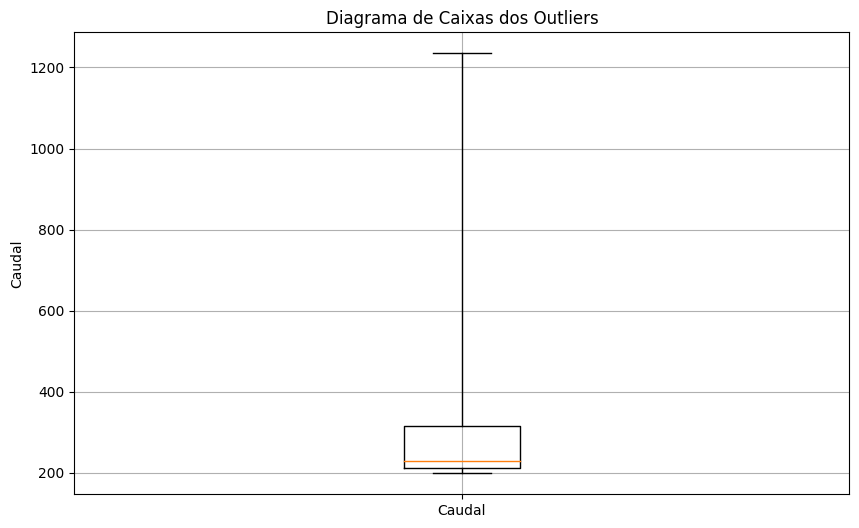

In [308]:
if (len(outliers_above) > 0):
  boxplot_outliers(outliers_above)

In [309]:
if (len(outliers_above) > 0):
  print(statistics(outliers_above))

print(f"\nforam retirados {len(outliers_above)} valores, o que corresponde a {(len(outliers_above)*100)/(len(no_outliers) + len(df[df['Caudal'].isna()]))}% da amostra")

   Year  Month  Min_Value  Max_Value  Count
0  2014      3     201.33     201.33      1
1  2014      6     254.27     315.00      5
2  2014      7     294.98     294.98      1
3  2014     10     198.90     293.60      9
4  2014     11     198.90     206.60      2
6  2015      1     208.10     315.00      3
5  2015      3     213.75     213.75      1
7  2015      5    1204.00    1235.00      4
8  2015      9     214.68     214.68      1

foram retirados 27 valores, o que corresponde a 0.009531912489982666% da amostra


In [310]:
outliers_above

Data   Caudal  Year  Month
52148  2014-03-28 12:11:00   201.33  2014      3
66656  2014-06-07 09:31:00   301.00  2014      6
67088  2014-06-09 10:06:00   315.00  2014      6
67089  2014-06-09 10:07:00   315.00  2014      6
67090  2014-06-09 10:09:00   254.27  2014      6
67091  2014-06-09 10:10:00   315.00  2014      6
74215  2014-07-14 15:48:00   294.98  2014      7
94776  2014-10-24 15:17:00   208.20  2014     10
94777  2014-10-24 15:18:00   293.60  2014     10
94778  2014-10-24 15:27:00   223.07  2014     10
94779  2014-10-24 15:29:00   215.20  2014     10
94780  2014-10-24 15:44:00   214.10  2014     10
94781  2014-10-24 15:59:00   229.30  2014     10
94782  2014-10-24 16:10:00   208.00  2014     10
94793  2014-10-24 17:36:00   214.90  2014     10
94794  2014-10-24 17:37:00   198.90  2014     10
98636  2014-11-13 12:35:00   206.60  2014     11
98637  2014-11-13 12:37:00   198.90  2014     11
111414 2015-01-16 16:07:00   208.10  2015      1
111564 2015-01-17 09:19:00   315.00  2015      1
111565 2015-01-17 09:20:00   315.00  2015      1
120403 2015-03-02 10:35:00   213.75  2015      3
134774 2015-05-12 18:38:00  1204.00  2015      5
134775 2015-05-12 18:39:00  1212.00  2015      5
134776 2015-05-12 18:42:00  1235.00  2015      5
134777 2015-05-12 18:47:00  1215.00  2015      5
178139 2015-09-09 18:00:00   214.68  2015      9

In [311]:
if (len(outliers_below) > 0):
  boxplot_outliers(outliers_below)

In [312]:
if (len(outliers_below) > 0):
  print(statistics(outliers_below))

print(f"\nforam retirados {len(outliers_below)} valores, o que corresponde a {(len(outliers_below)*100)/(len(no_outliers) + len(df[df['Caudal'].isna()]))}% da amostra")


foram retirados 0 valores, o que corresponde a 0.0% da amostra


In [313]:
no_outliers['Data'] = pd.to_datetime(df['Data'])

In [314]:
no_outliers.set_index('Data', inplace=True)

In [315]:
resampled_df = no_outliers.resample('15T').asfreq()

closest_before = np.empty(len(resampled_df))
closest_after = np.empty(len(resampled_df))
data_before = [pd.NaT] * len(resampled_df)
data_after = [pd.NaT] * len(resampled_df)

no_outliers_idx = no_outliers.index.values
no_outliers_caudal = no_outliers['Caudal'].values

total_rows = len(resampled_df)
for idx, (i, row) in enumerate(resampled_df.iterrows()):
    if pd.isnull(row['Caudal']):
        idx_before = np.where(no_outliers_idx < i)[0]
        if len(idx_before) > 0:
            closest_before[idx] = no_outliers_caudal[idx_before[-1]]
            data_before[idx] = no_outliers_idx[idx_before[-1]]
        else:
            closest_before[idx] = np.nan

        idx_after = np.where(no_outliers_idx > i)[0]
        if len(idx_after) > 0:
            closest_after[idx] = no_outliers_caudal[idx_after[0]]
            data_after[idx] = no_outliers_idx[idx_after[0]]
        else:
            closest_after[idx] = np.nan
    else:
        closest_before[idx] = row['Caudal']
        closest_after[idx] = row['Caudal']
        data_before[idx] = i
        data_after[idx] = i

    if idx % (total_rows // 20) == 0:
        print(f"{int((idx / total_rows) * 100)}% done")

closest_df = pd.DataFrame({
    'Data_before': data_before,
    'Closest_before': closest_before,
    'Data_after': data_after,
    'Closest_after': closest_after
}, index=resampled_df.index)


0% done
4% done
9% done
14% done
19% done
24% done
29% done
34% done
39% done
44% done
49% done
54% done
59% done
64% done
69% done
74% done
79% done
84% done
89% done
94% done
99% done


In [316]:
closest_df

Data_before  Closest_before          Data_after  \
Data                                                                          
2013-07-02 17:00:00                 NaT             NaN 2013-07-02 17:11:00   
2013-07-02 17:15:00 2013-07-02 17:12:00            70.1 2013-07-02 17:23:00   
2013-07-02 17:30:00 2013-07-02 17:27:00            75.3 2013-07-02 17:39:00   
2013-07-02 17:45:00 2013-07-02 17:41:00            70.9 2013-07-02 17:55:00   
2013-07-02 18:00:00 2013-07-02 17:56:00            73.2 2013-07-02 18:05:00   
...                                 ...             ...                 ...   
2016-06-30 15:30:00 2016-06-30 15:27:00            66.3 2016-06-30 15:31:00   
2016-06-30 15:45:00 2016-06-30 15:41:00            77.6 2016-06-30 15:46:00   
2016-06-30 16:00:00 2016-06-30 15:56:00            78.8 2016-06-30 16:01:00   
2016-06-30 16:15:00 2016-06-30 16:12:00            75.7 2016-06-30 16:17:00   
2016-06-30 16:30:00 2016-06-30 16:27:00            76.7 2016-06-30 16:32:00   

                     Closest_after  
Data                                
2013-07-02 17:00:00          70.10  
2013-07-02 17:15:00          71.70  
2013-07-02 17:30:00          70.85  
2013-07-02 17:45:00          73.20  
2013-07-02 18:00:00          77.43  
...                            ...  
2016-06-30 15:30:00          68.50  
2016-06-30 15:45:00          70.10  
2016-06-30 16:00:00          80.60  
2016-06-30 16:15:00          78.50  
2016-06-30 16:30:00          82.10  

[105023 rows x 4 columns]

In [317]:
closest_df['time_gap'] = (closest_df['Data_after'] - closest_df['Data_before']).dt.total_seconds() <= 30 * 60

In [318]:
closest_df

Data_before  Closest_before          Data_after  \
Data                                                                          
2013-07-02 17:00:00                 NaT             NaN 2013-07-02 17:11:00   
2013-07-02 17:15:00 2013-07-02 17:12:00            70.1 2013-07-02 17:23:00   
2013-07-02 17:30:00 2013-07-02 17:27:00            75.3 2013-07-02 17:39:00   
2013-07-02 17:45:00 2013-07-02 17:41:00            70.9 2013-07-02 17:55:00   
2013-07-02 18:00:00 2013-07-02 17:56:00            73.2 2013-07-02 18:05:00   
...                                 ...             ...                 ...   
2016-06-30 15:30:00 2016-06-30 15:27:00            66.3 2016-06-30 15:31:00   
2016-06-30 15:45:00 2016-06-30 15:41:00            77.6 2016-06-30 15:46:00   
2016-06-30 16:00:00 2016-06-30 15:56:00            78.8 2016-06-30 16:01:00   
2016-06-30 16:15:00 2016-06-30 16:12:00            75.7 2016-06-30 16:17:00   
2016-06-30 16:30:00 2016-06-30 16:27:00            76.7 2016-06-30 16:32:00   

                     Closest_after  time_gap  
Data                                          
2013-07-02 17:00:00          70.10     False  
2013-07-02 17:15:00          71.70      True  
2013-07-02 17:30:00          70.85      True  
2013-07-02 17:45:00          73.20      True  
2013-07-02 18:00:00          77.43      True  
...                            ...       ...  
2016-06-30 15:30:00          68.50      True  
2016-06-30 15:45:00          70.10      True  
2016-06-30 16:00:00          80.60      True  
2016-06-30 16:15:00          78.50      True  
2016-06-30 16:30:00          82.10      True  

[105023 rows x 5 columns]

In [319]:
def calculate_caudal(row):
    if row['time_gap']:
        x = row.name
        x1 = row['Data_before']
        x2 = row['Data_after']
        y1 = row['Closest_before']
        y2 = row['Closest_after']
        time_diff = (x2 - x1).total_seconds()
        if time_diff == 0:
            return y1
        else:
            caudal = y1 + ((x - x1).total_seconds() * (y2 - y1) / time_diff)
            return caudal
    else:
        return None

closest_df['Caudal'] = closest_df.apply(calculate_caudal, axis=1)

In [320]:
resampled_df['Caudal'] = closest_df['Caudal']

In [321]:
resampled_df

Caudal  Year  Month
Data                                       
2013-07-02 17:00:00        NaN   NaN    NaN
2013-07-02 17:15:00  70.536364   NaN    NaN
2013-07-02 17:30:00  74.187500   NaN    NaN
2013-07-02 17:45:00  71.557143   NaN    NaN
2013-07-02 18:00:00  75.080000   NaN    NaN
...                        ...   ...    ...
2016-06-30 15:30:00  67.950000   NaN    NaN
2016-06-30 15:45:00  71.600000   NaN    NaN
2016-06-30 16:00:00  80.240000   NaN    NaN
2016-06-30 16:15:00  77.380000   NaN    NaN
2016-06-30 16:30:00  79.940000   NaN    NaN

[105023 rows x 3 columns]

In [322]:
missings_normalized = resampled_df[resampled_df['Caudal'].isna()].copy()
missings_normalized.reset_index(inplace=True)
print(statistics(missings_normalized).drop(['Min_Value', 'Max_Value'], axis=1))

print(f"\nExistem {len(missings_normalized)} valores omissos o que corresponde a  {(len(missings_normalized)*100)/len(resampled_df)}% da amostra")

    Year  Month  Count
0   2013      7    711
1   2013      8     29
2   2014      1      7
3   2014      2      2
4   2014      3      4
5   2014     10     46
6   2015      1     83
7   2015      3      5
8   2015      5     44
9   2015     12      2
10  2016      3      9

Existem 942 valores omissos o que corresponde a  0.8969463831732096% da amostra


In [323]:
max30min_df = resampled_df.copy()
max15min_df = resampled_df.copy()
max60min_df = resampled_df.copy()

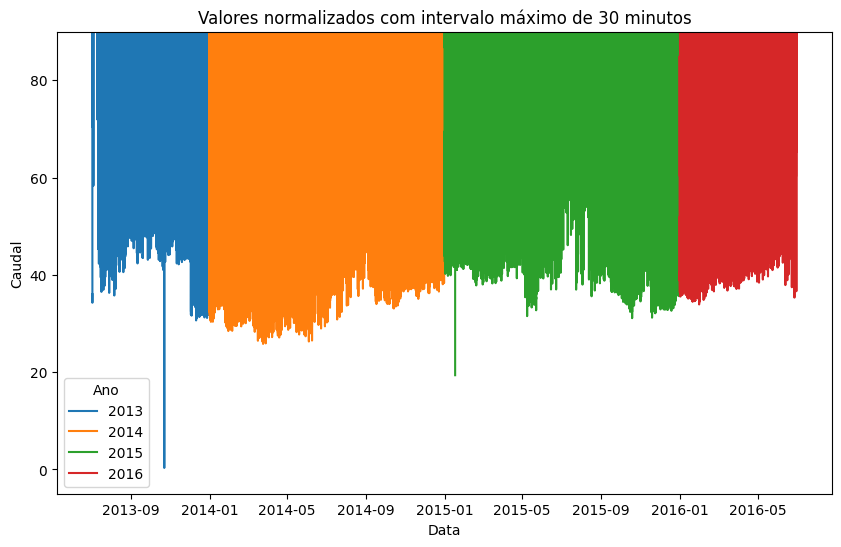

In [324]:
normalizedPlot(max30min_df, 30)

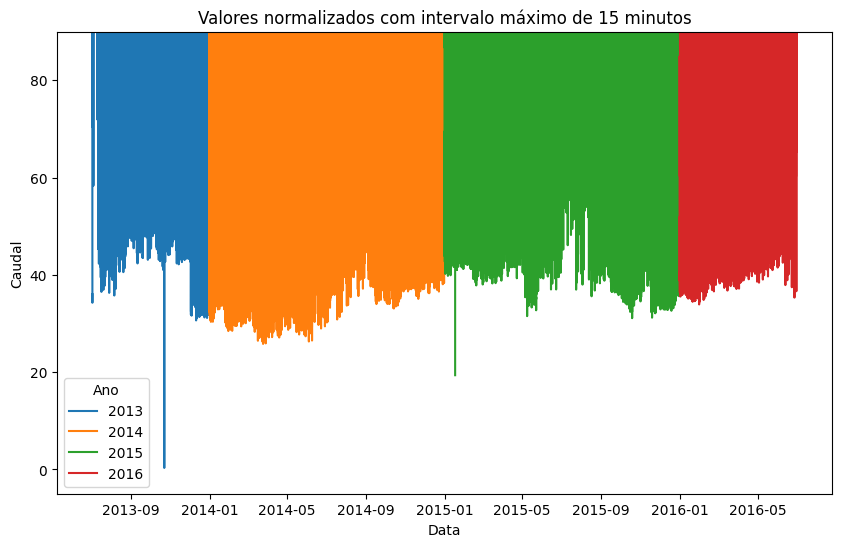

In [325]:
normalizedPlot(max15min_df, 15)

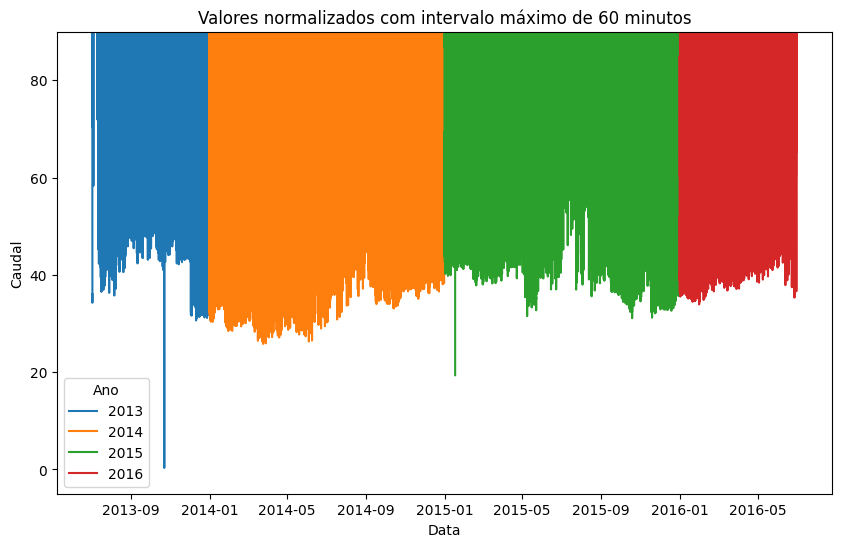

In [326]:
normalizedPlot(max60min_df, 60)

In [327]:
nan_caudal_df_30 = max30min_df[max30min_df['Caudal'].isna()].copy()
nan_caudal_df_15 = max15min_df[max15min_df['Caudal'].isna()].copy()
nan_caudal_df_60 = max60min_df[max60min_df['Caudal'].isna()].copy()

In [328]:
value_caudal_df_30 = max30min_df[max30min_df['Caudal'].notna()].copy()
#NOT BEING USED

In [329]:
nan_caudal_df_30.reset_index(inplace=True)
nan_caudal_df_15.reset_index(inplace=True)
nan_caudal_df_60.reset_index(inplace=True)

In [330]:
missings_gap30_df = missings_study(nan_caudal_df_30)

In [331]:
missings_gap15_df = missings_study(nan_caudal_df_15)

In [332]:
missings_gap60_df = missings_study(nan_caudal_df_60)

96 = 1 dia <br>
192 = 2 dias

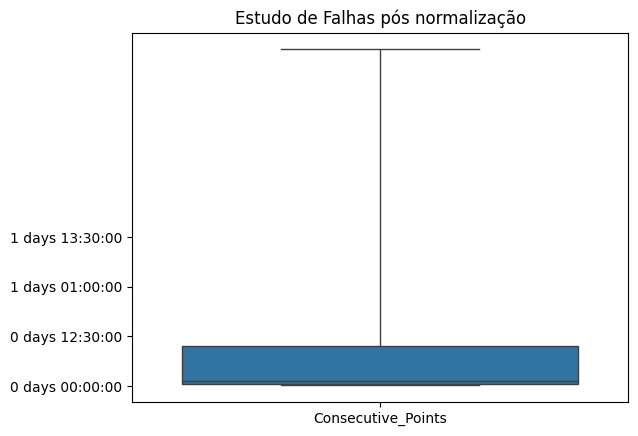

In [333]:
yticks_values = [0, 50, 100, 150]
yticks_labels = [convert_to_time(y) for y in yticks_values]

sns.boxplot(data=missings_gap30_df, whis=100)
plt.yticks(yticks_values, yticks_labels)
plt.title("Estudo de Falhas pós normalização")
plt.show()

In [334]:
max_index = missings_gap30_df['Consecutive_Points'].idxmax()
row_with_max_points = missings_gap30_df.loc[max_index]
print(row_with_max_points)

Data                  2013-07-04 22:15:00
Consecutive_Points                    338
Time                      3 days 12:30:00
Name: 2, dtype: object


In [335]:
missings_gap15_df

Data  Consecutive_Points             Time
0  2013-07-02 17:00:00                   1  0 days 00:15:00
1  2013-07-03 04:15:00                 124  1 days 07:00:00
2  2013-07-04 22:15:00                 338  3 days 12:30:00
3  2013-07-08 23:15:00                 147  1 days 12:45:00
4  2013-07-10 22:15:00                  78  0 days 19:30:00
5  2013-07-12 04:15:00                  23  0 days 05:45:00
6  2013-08-13 05:00:00                  29  0 days 07:15:00
7  2014-01-17 15:45:00                   7  0 days 01:45:00
8  2014-02-18 09:00:00                   2  0 days 00:30:00
9  2014-03-30 01:00:00                   4  0 days 01:00:00
10 2014-10-12 11:00:00                   2  0 days 00:30:00
11 2014-10-24 15:15:00                   4  0 days 01:00:00
12 2014-10-31 07:00:00                  40  0 days 10:00:00
13 2015-01-16 12:15:00                  83  0 days 20:45:00
14 2015-03-29 01:00:00                   5  0 days 01:15:00
15 2015-05-12 10:00:00                  40  0 days 10:00:00
16 2015-05-14 15:00:00                   2  0 days 00:30:00
17 2015-05-19 09:45:00                   2  0 days 00:30:00
18 2015-12-04 06:30:00                   2  0 days 00:30:00
19 2016-03-01 15:45:00                   5  0 days 01:15:00
20 2016-03-27 01:00:00                   4  0 days 00:45:00

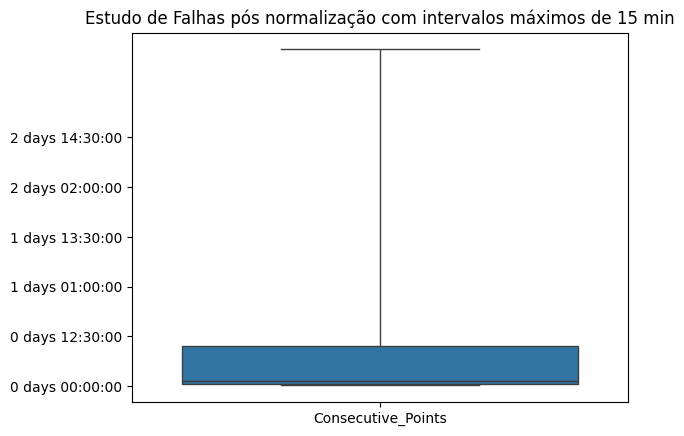

In [336]:
yticks_values = [0, 50, 100, 150, 200, 250]
yticks_labels = [convert_to_time(y) for y in yticks_values]

sns.boxplot(data=missings_gap15_df, whis=100)
plt.yticks(yticks_values, yticks_labels)
plt.title("Estudo de Falhas pós normalização com intervalos máximos de 15 min")
plt.show()

In [337]:
max_index = missings_gap15_df['Consecutive_Points'].idxmax()
row_with_max_points = missings_gap15_df.loc[max_index]
print(row_with_max_points)

Data                  2013-07-04 22:15:00
Consecutive_Points                    338
Time                      3 days 12:30:00
Name: 2, dtype: object


In [338]:
missings_gap60_df

Data  Consecutive_Points             Time
0  2013-07-02 17:00:00                   1  0 days 00:15:00
1  2013-07-03 04:15:00                 124  1 days 07:00:00
2  2013-07-04 22:15:00                 338  3 days 12:30:00
3  2013-07-08 23:15:00                 147  1 days 12:45:00
4  2013-07-10 22:15:00                  78  0 days 19:30:00
5  2013-07-12 04:15:00                  23  0 days 05:45:00
6  2013-08-13 05:00:00                  29  0 days 07:15:00
7  2014-01-17 15:45:00                   7  0 days 01:45:00
8  2014-02-18 09:00:00                   2  0 days 00:30:00
9  2014-03-30 01:00:00                   4  0 days 01:00:00
10 2014-10-12 11:00:00                   2  0 days 00:30:00
11 2014-10-24 15:15:00                   4  0 days 01:00:00
12 2014-10-31 07:00:00                  40  0 days 10:00:00
13 2015-01-16 12:15:00                  83  0 days 20:45:00
14 2015-03-29 01:00:00                   5  0 days 01:15:00
15 2015-05-12 10:00:00                  40  0 days 10:00:00
16 2015-05-14 15:00:00                   2  0 days 00:30:00
17 2015-05-19 09:45:00                   2  0 days 00:30:00
18 2015-12-04 06:30:00                   2  0 days 00:30:00
19 2016-03-01 15:45:00                   5  0 days 01:15:00
20 2016-03-27 01:00:00                   4  0 days 00:45:00

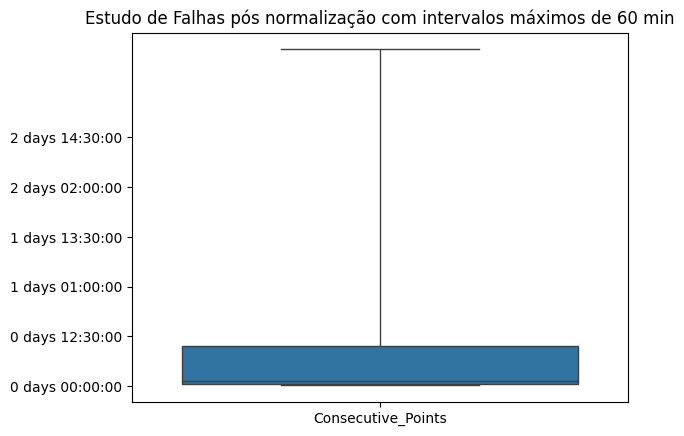

In [339]:
yticks_values = [0, 50, 100, 150, 200, 250]
yticks_labels = [convert_to_time(y) for y in yticks_values]

sns.boxplot(data=missings_gap60_df, whis=100)
plt.yticks(yticks_values, yticks_labels)
plt.title("Estudo de Falhas pós normalização com intervalos máximos de 60 min")
plt.show()

In [340]:
max_index = missings_gap60_df['Consecutive_Points'].idxmax()
row_with_max_points = missings_gap60_df.loc[max_index]
print(row_with_max_points)

Data                  2013-07-04 22:15:00
Consecutive_Points                    338
Time                      3 days 12:30:00
Name: 2, dtype: object


In [341]:
above_96_30gap = missings_gap30_df[missings_gap30_df['Consecutive_Points'] > 96]
count_above_96_30gap = above_96_30gap.shape[0]

print("Número de falhas com duração maior que 1 dia:", count_above_96_30gap)
print(f"Isto corresponde a {(count_above_96_30gap*100)/len(missings_gap30_df):.2f}% das falhas")

Número de falhas com duração maior que 1 dia: 3
Isto corresponde a 14.29% das falhas


In [342]:
above_96_30gap

Data  Consecutive_Points             Time
1 2013-07-03 04:15:00                 124  1 days 07:00:00
2 2013-07-04 22:15:00                 338  3 days 12:30:00
3 2013-07-08 23:15:00                 147  1 days 12:45:00

In [343]:
above_192_30gap = missings_gap30_df[missings_gap30_df['Consecutive_Points'] > 192]
count_above_192_30gap = above_192_30gap.shape[0]

print("Número de falhas com duração maior que 2 dias:", count_above_192_30gap)
print(f"Isto corresponde a {(count_above_192_30gap*100)/len(missings_gap30_df):.2f}% das falhas")

Número de falhas com duração maior que 2 dias: 1
Isto corresponde a 4.76% das falhas


In [344]:
above_192_30gap

Data  Consecutive_Points             Time
2 2013-07-04 22:15:00                 338  3 days 12:30:00

In [345]:
above_96_15gap = missings_gap15_df[missings_gap15_df['Consecutive_Points'] > 96]
count_above_96_15gap = above_96_15gap.shape[0]

print("Número de falhas com duração maior que 1 dia:", count_above_96_15gap)
print(f"Isto corresponde a {(count_above_96_15gap*100)/len(missings_gap15_df):.2f}% das falhas")

Número de falhas com duração maior que 1 dia: 3
Isto corresponde a 14.29% das falhas


In [346]:
above_96_15gap

Data  Consecutive_Points             Time
1 2013-07-03 04:15:00                 124  1 days 07:00:00
2 2013-07-04 22:15:00                 338  3 days 12:30:00
3 2013-07-08 23:15:00                 147  1 days 12:45:00

In [347]:
above_192_15gap = missings_gap15_df[missings_gap15_df['Consecutive_Points'] > 192]
count_above_192_15gap = above_192_15gap.shape[0]

print("Número de falhas com duração maior que 2 dias:", count_above_192_15gap)
print(f"Isto corresponde a {(count_above_192_15gap*100)/len(missings_gap15_df):.2f}% das falhas")

Número de falhas com duração maior que 2 dias: 1
Isto corresponde a 4.76% das falhas


In [348]:
above_192_15gap

Data  Consecutive_Points             Time
2 2013-07-04 22:15:00                 338  3 days 12:30:00

In [349]:
above_96_60gap = missings_gap60_df[missings_gap60_df['Consecutive_Points'] > 96]
count_above_96_60gap = above_96_60gap.shape[0]

print("Número de falhas com duração maior que 1 dia:", count_above_96_60gap)
print(f"Isto corresponde a {(count_above_96_60gap*100)/len(missings_gap60_df):.2f}% das falhas")

Número de falhas com duração maior que 1 dia: 3
Isto corresponde a 14.29% das falhas


In [350]:
above_96_60gap

Data  Consecutive_Points             Time
1 2013-07-03 04:15:00                 124  1 days 07:00:00
2 2013-07-04 22:15:00                 338  3 days 12:30:00
3 2013-07-08 23:15:00                 147  1 days 12:45:00

In [351]:
above_192_60gap = missings_gap60_df[missings_gap60_df['Consecutive_Points'] > 192]
count_above_192_60gap = above_192_60gap.shape[0]

print("Número de falhas com duração maior que 2 dias:", count_above_192_60gap)
print(f"Isto corresponde a {(count_above_192_60gap*100)/len(missings_gap60_df):.2f}% das falhas")

Número de falhas com duração maior que 2 dias: 1
Isto corresponde a 4.76% das falhas


In [352]:
above_192_60gap

Data  Consecutive_Points             Time
2 2013-07-04 22:15:00                 338  3 days 12:30:00

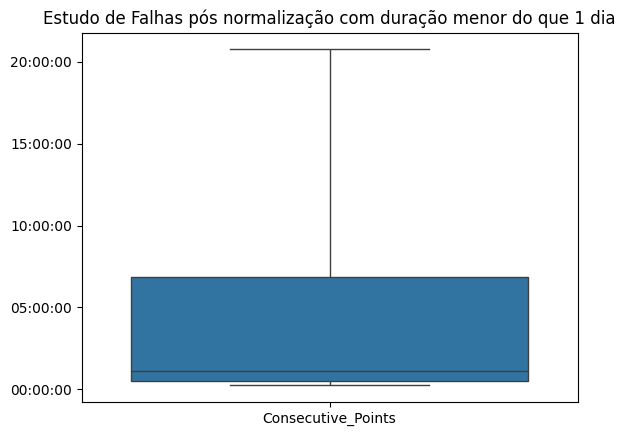

In [353]:
less_than_1day = missings_gap30_df[missings_gap30_df['Consecutive_Points'] < 96]

yticks_labels = [convert_to_time_less_than_1day(y) for y in [0, 20, 40, 60, 80]]

sns.boxplot(data=less_than_1day, whis=100)
plt.yticks([0, 20, 40, 60, 80], yticks_labels)
plt.title("Estudo de Falhas pós normalização com duração menor do que 1 dia")
plt.show()

In [354]:
if not less_than_1day.empty:
    max_index = less_than_1day['Consecutive_Points'].idxmax()
    row_with_max_points = less_than_1day.loc[max_index]
    print(row_with_max_points)
else:
    print("No rows with Consecutive_Points < 96 found.")

Data                  2015-01-16 12:15:00
Consecutive_Points                     83
Time                      0 days 20:45:00
Name: 13, dtype: object


In [355]:
len(less_than_1day)

18

In [356]:
time_intervals = pd.timedelta_range(start='00:00:00', end='23:45:00', freq='5H').astype(str)
time_intervals = time_intervals.insert(len(time_intervals), '24:00:00')

table_data = pd.DataFrame(columns=['Intervalo de Tempo', 'Número de falhas', 'Número de falhas %*'])

for i in range(len(time_intervals) - 1):
    start_time = time_intervals[i].split()[-1]
    end_time = time_intervals[i + 1].split()[-1]

    points_in_interval = less_than_1day[
        (less_than_1day['Consecutive_Points'] >= i * 20) & (less_than_1day['Consecutive_Points'] < (i + 1) * 20)
    ]

    count = len(points_in_interval)
    total_points = len(less_than_1day)
    percentage = (count / total_points) * 100 if total_points > 0 else 0

    table_data.loc[i] = [f'{start_time} <= x < {end_time}', count, f'{percentage:.2f}%']

print(table_data)
print("\n*% referente ao total de falhas com duração menor que 1 dia")

         Intervalo de Tempo  Número de falhas Número de falhas %*
0  00:00:00 <= x < 05:00:00                12              66.67%
1  05:00:00 <= x < 10:00:00                 2              11.11%
2  10:00:00 <= x < 15:00:00                 2              11.11%
3  15:00:00 <= x < 20:00:00                 1               5.56%
4  20:00:00 <= x < 24:00:00                 1               5.56%

*% referente ao total de falhas com duração menor que 1 dia


In [357]:
above_96_30gap
print("Gap de 30 min")
print(f"A percentagem de falhas superior a 1 dia é de {((len(above_96_30gap)*100)/len(missings_gap30_df)):.2f}%")
print(f"A percentagem de falhas inferior a 1 dia é de {((len(less_than_1day)*100)/len(missings_gap30_df)):.2f}%")

Gap de 30 min
A percentagem de falhas superior a 1 dia é de 14.29%
A percentagem de falhas inferior a 1 dia é de 85.71%


In [358]:
time_intervals = pd.timedelta_range(start='00:00:00', end='23:45:00', freq='2H').astype(str)
time_intervals = time_intervals.insert(len(time_intervals), '24:00:00')

table_data = pd.DataFrame(columns=['Intervalo de Tempo', 'Número de falhas', 'Número de falhas %*'])

for i in range(len(time_intervals) - 1):
    start_time = time_intervals[i].split()[-1]
    end_time = time_intervals[i + 1].split()[-1]

    points_in_interval = less_than_1day[
        (less_than_1day['Consecutive_Points'] >= i * 8) & (less_than_1day['Consecutive_Points'] < (i + 1) * 8)
    ]

    count = len(points_in_interval)
    total_points = len(less_than_1day)
    percentage = (count / total_points) * 100 if total_points > 0 else 0

    table_data.loc[i] = [f'{start_time} <= x < {end_time}', count, f'{percentage:.2f}%']
print(table_data)
print("\n*% referente ao total de falhas com duração menor que 1 dia")

          Intervalo de Tempo  Número de falhas Número de falhas %*
0   00:00:00 <= x < 02:00:00                12              66.67%
1   02:00:00 <= x < 04:00:00                 0               0.00%
2   04:00:00 <= x < 06:00:00                 1               5.56%
3   06:00:00 <= x < 08:00:00                 1               5.56%
4   08:00:00 <= x < 10:00:00                 0               0.00%
5   10:00:00 <= x < 12:00:00                 2              11.11%
6   12:00:00 <= x < 14:00:00                 0               0.00%
7   14:00:00 <= x < 16:00:00                 0               0.00%
8   16:00:00 <= x < 18:00:00                 0               0.00%
9   18:00:00 <= x < 20:00:00                 1               5.56%
10  20:00:00 <= x < 22:00:00                 1               5.56%
11  22:00:00 <= x < 24:00:00                 0               0.00%

*% referente ao total de falhas com duração menor que 1 dia


In [359]:
missing_to_12h = less_than_1day[less_than_1day['Consecutive_Points'] <= 48].copy()
missing_to_12h['Caudal'] = 0
print(statistics(missing_to_12h).drop(['Min_Value', 'Max_Value'], axis=1))

print(f"\nExistem {len(missing_to_12h)} falhas menores que 12h o que corresponde a  {(len(missing_to_12h)*100)/len(max30min_df)}% da amostra")

   Year  Month  Count
0  2013      7      2
1  2013      8      1
2  2014      1      1
3  2014      2      1
4  2014      3      1
5  2014     10      3
6  2015      3      1
7  2015      5      3
8  2015     12      1
9  2016      3      2

Existem 16 falhas menores que 12h o que corresponde a  0.015234758100606535% da amostra


In [360]:
missing_from_12h_24h = less_than_1day[less_than_1day['Consecutive_Points'] > 48].copy()
missing_from_12h_24h['Caudal'] = 0

if len(missing_from_12h_24h) > 0:
  print(statistics(missing_from_12h_24h).drop(['Min_Value', 'Max_Value'], axis=1))

print(f"\nExistem {len(missing_from_12h_24h)} falhas menores que 1 dia e maiores do que 12h o que corresponde a  {(len(missing_from_12h_24h)*100)/len(max30min_df)}% da amostra")

   Year  Month  Count
0  2013      7      1
1  2015      1      1

Existem 2 falhas menores que 1 dia e maiores do que 12h o que corresponde a  0.0019043447625758168% da amostra


In [361]:
more_than_24h = missings_gap30_df[missings_gap30_df['Consecutive_Points'] > 96].copy()
more_than_24h['Caudal'] = 0

if len(more_than_24h) > 0:
  print(statistics(more_than_24h).drop(['Min_Value', 'Max_Value'], axis=1))

print(f"\nExistem {len(more_than_24h)} falhas maiores que 1 dia o que corresponde a  {(len(more_than_24h)*100)/len(max30min_df)}% da amostra")


   Year  Month  Count
0  2013      7      3

Existem 3 falhas maiores que 1 dia o que corresponde a  0.002856517143863725% da amostra


In [362]:
def safe_statistics(func, *args, **kwargs):
    try:
        return func(*args, **kwargs)
    except ValueError:
        return pd.DataFrame(columns=['Year', 'Month', 'Min_Value', 'Max_Value', 'Count'])

stats_df = safe_statistics(statistics, missings_df)
stats_outliers_above = safe_statistics(statistics, outliers_above)
stats_outliers_below = safe_statistics(statistics, outliers_below)
stats_df_normalized = safe_statistics(statistics, missings_normalized)
stats_missing_to_12h = safe_statistics(statistics, missing_to_12h)
stats_missing_from_12h_24h = safe_statistics(statistics, missing_from_12h_24h)
stats_more_than_24h = safe_statistics(statistics, more_than_24h)

In [363]:
def year_month(df):
  df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
  df.set_index('Year_Month', inplace=True)

In [364]:
year_month(stats_df)
year_month(stats_outliers_above)
year_month(stats_outliers_below)
year_month(stats_df_normalized)
year_month(stats_missing_to_12h)
year_month(stats_missing_from_12h_24h)
year_month(stats_more_than_24h)

In [365]:
def drop_Year_And_Month(df):
  df = df.drop(['Year', 'Month'], axis=1)
  return df

In [366]:
def drop_Min_And_Max(df):
  df = df.drop(['Min_Value', 'Max_Value'], axis=1)
  return df

In [367]:
stats_df = drop_Year_And_Month(stats_df)
stats_outliers_above = drop_Year_And_Month(stats_outliers_above)
stats_outliers_below = drop_Year_And_Month(stats_outliers_below)
stats_df_normalized = drop_Year_And_Month(stats_df_normalized)
stats_missing_to_12h = drop_Year_And_Month(stats_missing_to_12h)
stats_missing_from_12h_24h = drop_Year_And_Month(stats_missing_from_12h_24h)
stats_more_than_24h = drop_Year_And_Month(stats_more_than_24h)

In [368]:
stats_df = drop_Min_And_Max(stats_df)
stats_df_normalized = drop_Min_And_Max(stats_df_normalized)
stats_missing_to_12h = drop_Min_And_Max(stats_missing_to_12h)
stats_missing_from_12h_24h = drop_Min_And_Max(stats_missing_from_12h_24h)
stats_more_than_24h = drop_Min_And_Max(stats_more_than_24h)

In [369]:
merged_df = pd.DataFrame()

In [370]:
dfs = [stats_df, stats_outliers_above, stats_outliers_below, stats_df_normalized, stats_missing_to_12h, stats_missing_from_12h_24h, stats_more_than_24h]

merged_df = dfs[0]

for i in range(1, len(dfs)):
    merged_df = merged_df.merge(dfs[i], left_index=True, right_index=True, how='outer', suffixes=('', f'_df{i}'))


In [371]:
merged_df.index = pd.to_datetime(merged_df.index, format='%Y-%m')
merged_df = merged_df.sort_index()
merged_df.index = merged_df.index.to_period('M').astype(str)

In [372]:
merged_df = merged_df.rename(columns={
    'Count': 'série bruta registos sem caudal (%)',
    'Min_Value': 'série bruta oultliers de caudal máximo(LI) (m3/h)',
    'Max_Value': 'série bruta oultliers de caudal máximo(LS) (m3/h)',
    'Count_df1': 'série bruta nº de oultliers de caudal máximo (nº)',
    'Min_Value_df2': 'série bruta oultliers de caudal minimo(LI) (m3/h)',
    'Max_Value_df2': 'série bruta oultliers de caudal minimo(LS) (m3/h)',
    'Count_df2': 'série bruta nº de oultliers de caudal minimo (nº)',
    'Count_df3': 'série normalizada valores omissos (%)',
    'Count_df4': 'série normalizada falhas com duração inf. 12 h (n.º)',
    'Count_df5': 'série normalizada falhas com duração 12 - 24 h (n.º)',
    'Count_df6': 'série normalizada falhas com duração sup. 24 h (n.º)'
})

In [373]:
merged_df['série bruta registos sem caudal (%)'] = (merged_df['série bruta registos sem caudal (%)']*100)/len(df)

In [374]:
merged_df['série normalizada valores omissos (%)'] = (merged_df['série normalizada valores omissos (%)']*100)/len(max30min_df)

In [375]:
merged_df

série bruta registos sem caudal (%)  \
Year_Month                                        
2013-07                                0.000706   
2013-08                                     NaN   
2013-09                                0.000706   
2013-10                                0.001765   
2013-12                                0.000353   
2014-01                                     NaN   
2014-02                                0.001765   
2014-03                                     NaN   
2014-05                                0.001059   
2014-06                                0.003883   
2014-07                                     NaN   
2014-10                                0.003883   
2014-11                                     NaN   
2015-01                                0.095663   
2015-03                                     NaN   
2015-05                                0.003177   
2015-06                                0.007060   
2015-07                                0.001059   
2015-09                                     NaN   
2015-12                                0.008825   
2016-03                                0.001059   
2016-05                                0.001059   

            série bruta oultliers de caudal máximo(LI) (m3/h)  \
Year_Month                                                      
2013-07                                                   NaN   
2013-08                                                   NaN   
2013-09                                                   NaN   
2013-10                                                   NaN   
2013-12                                                   NaN   
2014-01                                                   NaN   
2014-02                                                   NaN   
2014-03                                                201.33   
2014-05                                                   NaN   
2014-06                                                254.27   
2014-07                                                294.98   
2014-10                                                198.90   
2014-11                                                198.90   
2015-01                                                208.10   
2015-03                                                213.75   
2015-05                                               1204.00   
2015-06                                                   NaN   
2015-07                                                   NaN   
2015-09                                                214.68   
2015-12                                                   NaN   
2016-03                                                   NaN   
2016-05                                                   NaN   

            série bruta oultliers de caudal máximo(LS) (m3/h)  \
Year_Month                                                      
2013-07                                                   NaN   
2013-08                                                   NaN   
2013-09                                                   NaN   
2013-10                                                   NaN   
2013-12                                                   NaN   
2014-01                                                   NaN   
2014-02                                                   NaN   
2014-03                                                201.33   
2014-05                                                   NaN   
2014-06                                                315.00   
2014-07                                                294.98   
2014-10                                                293.60   
2014-11                                                206.60   
2015-01                                                315.00   
2015-03                                                213.75   
2015-05                                               1235.00   
2015-06                                                 

In [376]:
max30min_df.reset_index(inplace=True)

In [377]:
max30min_df = max30min_df.drop(['Year', 'Month'], axis=1)

In [378]:
first_row_time = max30min_df.iloc[0]['Data']
if first_row_time.time() != pd.to_datetime('00:00:00').time():
    start_time = first_row_time.replace(hour=0, minute=0, second=0, microsecond=0)
    end_time = first_row_time

    time_range = pd.date_range(start=start_time, end=end_time, freq='15T')

    time_range = time_range[time_range < end_time]

    new_rows = pd.DataFrame({'Data': time_range, 'Caudal': np.nan})

    max30min_df = pd.concat([new_rows, max30min_df]).reset_index(drop=True)

In [379]:
max30min_df

Data  Caudal
0      2013-07-02 00:00:00     NaN
1      2013-07-02 00:15:00     NaN
2      2013-07-02 00:30:00     NaN
3      2013-07-02 00:45:00     NaN
4      2013-07-02 01:00:00     NaN
...                    ...     ...
105086 2016-06-30 15:30:00   67.95
105087 2016-06-30 15:45:00   71.60
105088 2016-06-30 16:00:00   80.24
105089 2016-06-30 16:15:00   77.38
105090 2016-06-30 16:30:00   79.94

[105091 rows x 2 columns]

In [380]:
copy1 = max30min_df.copy()

In [381]:
aux = copy1.values

In [382]:
matriz = [[None] * 97 for _ in range(1097)]

In [383]:
matriz[0][0] = 'Date'

In [384]:
for i in range(96):
  matriz[0][i+1] = aux[i][0].strftime('%H:%M')

In [385]:
auxlenght = 0
for k in range(1096):
  first = 0
  for j in range(96):
    if first == 0:
      matriz[k+1][0] = aux[auxlenght][0].strftime('%Y/%m/%d')

      if auxlenght + 95 > len(aux):
        break

    auxlenght += 1
    first = 1

In [386]:
auxlenght = 0

for m in range(1096):
  for n in range(96):
    if auxlenght >= len(aux):
      break

    matriz[m+1][n+1] = aux[auxlenght][1]
    auxlenght += 1

In [387]:
columns = matriz[0]

data = matriz[1:]

rexcel = pd.DataFrame(data, columns=columns)

In [388]:
rexcel

Date    00:00   00:15      00:30  00:45      01:00   01:15  \
0     2013/07/02      NaN     NaN        NaN    NaN        NaN     NaN   
1     2013/07/03   73.225   70.70  71.971429  79.25  71.836364  71.350   
2     2013/07/04      NaN     NaN        NaN    NaN        NaN     NaN   
3     2013/07/05      NaN     NaN        NaN    NaN        NaN     NaN   
4     2013/07/06      NaN     NaN        NaN    NaN        NaN     NaN   
...          ...      ...     ...        ...    ...        ...     ...   
1091  2016/06/27   73.880   64.46  57.800000  53.95  42.100000  41.000   
1092  2016/06/28  100.200  100.88  94.900000  98.82  89.900000  88.012   
1093  2016/06/29   92.140   98.75  95.900000  92.00  89.260000  87.380   
1094  2016/06/30   55.100   89.02  87.316667  81.34  78.620000  75.860   
1095  2016/06/30      NaN     NaN        NaN    NaN        NaN     NaN   

          01:30      01:45  02:00  ...       21:30       21:45   22:00  \
0           NaN        NaN    NaN  ...  129.153846  126.391111  116.24   
1     64.471429  55.171429  41.95  ...         NaN         NaN     NaN   
2           NaN        NaN    NaN  ...  208.228571  198.900000  194.80   
3           NaN        NaN    NaN  ...         NaN         NaN     NaN   
4           NaN        NaN    NaN  ...         NaN         NaN     NaN   
...         ...        ...    ...  ...         ...         ...     ...   
1091  40.300000  37.080000  39.78  ...  132.800000  130.400000  137.94   
1092  87.720000  83.850000  84.31  ...  152.120000  143.600000  130.10   
1093  86.880000  82.620000  74.84  ...  140.820000  121.840000  118.22   
1094  76.040000  73.600000  74.95  ...         NaN         NaN     NaN   
1095        NaN        NaN    NaN  ...         NaN         NaN     NaN   

           22:15       22:30       22:45       23:00       23:15    23:30  \
0     104.446667  115.006667  110.085714  116.611429  115.990769  116.400   
1            NaN         NaN         NaN         NaN         NaN      NaN   
2            NaN         NaN         NaN         NaN         NaN      NaN   
3            NaN         NaN         NaN         NaN         NaN      NaN   
4            NaN         NaN         NaN         NaN         NaN      NaN   
...          ...         ...         ...         ...         ...      ...   
1091  122.700000  120.950000  121.800000   98.100000   95.420000  104.232   
1092   95.904000   93.812000   95.840000   90.940000   89.200000   85.730   
1093  111.912500   85.400000   86.060000   78.300000   71.960000   68.500   
1094         NaN         NaN         NaN         NaN         NaN      NaN   
1095         NaN         NaN         NaN         NaN         NaN      NaN   

           23:45  
0      77.836364  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
1091  108.380000  
1092   90.660000  
1093   68.200000  
1094         NaN  
1095         NaN  

[1096 rows x 97 columns]

In [389]:
max30min_df.to_excel('normalized.xlsx', index=False)

In [390]:
writer = pd.ExcelWriter('rexcel.xlsx', engine='xlsxwriter')

rexcel.to_excel(writer, sheet_name='Sheet1', index=False)

workbook  = writer.book
worksheet = writer.sheets['Sheet1']

header_format = workbook.add_format({})

for col_num, value in enumerate(rexcel.columns.values):
    worksheet.write(0, col_num, value, header_format)

writer.close()

#Preenchimento de Falhas

In [391]:
reconstruct_forecast_Anual = pd.read_csv('data_with_Anual.csv', delimiter=',')

In [392]:
reconstruct_forecast_Anual.loc[0, 'Data'] = '2013-07-01  00:00:00'

In [393]:
reconstruct_forecast_Anual.isnull().any().any()

False

In [394]:
reconstruct_forecast_Weekly = pd.read_csv('data_with_Weekly.csv', delimiter=',')

In [395]:
reconstruct_forecast_Weekly.loc[0, 'Data'] = '2013-07-01  00:00:00'

In [396]:
reconstruct_forecast_Weekly.isnull().any().any()

False

In [397]:
reconstruct_Quevedo = pd.read_csv('Quevedo.csv', delimiter=',')

In [398]:
reconstruct_Quevedo = reconstruct_Quevedo.drop("Unnamed: 0", axis = 1)

In [399]:
reconstruct_Quevedo.rename(columns=lambda x: x[1:] if x.startswith('X') else x, inplace=True)

In [400]:
reconstruct_Quevedo.rename(columns=lambda x: x.replace('.', ':'), inplace=True)

In [401]:
df_long = pd.melt(reconstruct_Quevedo, id_vars=['Date'], var_name='Time', value_name='Caudal')

df_long['DateTime'] = pd.to_datetime(df_long['Date'] + ' ' + df_long['Time'], format='%Y/%m/%d %H:%M')

df_long = df_long.drop(columns=['Date', 'Time'])

df_long = df_long[['DateTime', 'Caudal']]

df_long = df_long.sort_values(by='DateTime').reset_index(drop=True)

In [402]:
reconstruct_Quevedo = df_long

In [403]:
reconstruct_Quevedo.isnull().any().any()

False

In [404]:
reconstruct_tbats = pd.read_csv('TBATS.csv', delimiter=',')
reconstruct_tbats = reconstruct_tbats.drop("Unnamed: 0", axis = 1)
reconstruct_tbats.rename(columns=lambda x: x[1:] if x.startswith('X') else x, inplace=True)
reconstruct_tbats.rename(columns=lambda x: x.replace('.', ':'), inplace=True)

df_long = pd.melt(reconstruct_tbats, id_vars=['Date'], var_name='Time', value_name='Caudal')

df_long['DateTime'] = pd.to_datetime(df_long['Date'] + ' ' + df_long['Time'], format='%Y/%m/%d %H:%M')

df_long = df_long.drop(columns=['Date', 'Time'])

df_long = df_long[['DateTime', 'Caudal']]

df_long = df_long.sort_values(by='DateTime').reset_index(drop=True)

reconstruct_tbats = df_long

In [405]:
reconstruct_tbats.isnull().any().any()

True

In [406]:
TBATS_nan_mask = reconstruct_tbats.isnull().any(axis=1)

num_nan_rows = TBATS_nan_mask.sum()
print(f"Number of rows with NaN values: {num_nan_rows}")

nan_rows = reconstruct_tbats[TBATS_nan_mask]
print("Rows with NaN values:")
print(nan_rows)

Number of rows with NaN values: 854
Rows with NaN values:
                 DateTime  Caudal
0     2013-07-01 00:00:00     NaN
1     2013-07-01 00:15:00     NaN
2     2013-07-01 00:30:00     NaN
3     2013-07-01 00:45:00     NaN
4     2013-07-01 01:00:00     NaN
...                   ...     ...
1028  2013-07-11 17:00:00     NaN
1029  2013-07-11 17:15:00     NaN
1030  2013-07-11 17:30:00     NaN
65532 2015-05-14 15:00:00     NaN
65533 2015-05-14 15:15:00     NaN

[854 rows x 2 columns]


In [407]:
nan_rows = copy1[copy1.isnull().any(axis=1)]

In [408]:
reconstructions = pd.DataFrame(columns=['Date', 'forecast_Anual', 'forecast_Weekly', 'Quevedo', 'TBATS'])

for index in nan_rows.index:
    reconstructions.loc[index, 'Date'] = nan_rows.loc[index, 'Data']
    reconstructions.loc[index, 'forecast_Anual'] = reconstruct_forecast_Anual.iloc[index]['Caudal']
    reconstructions.loc[index, 'forecast_Weekly'] = reconstruct_forecast_Weekly.iloc[index]['Caudal']
    reconstructions.loc[index, 'Quevedo'] = reconstruct_Quevedo.iloc[index]['Caudal']
    reconstructions.loc[index, 'TBATS'] = reconstruct_tbats.iloc[index]['Caudal']

In [409]:
reconstructions

Date forecast_Anual forecast_Weekly    Quevedo   TBATS
0      2013-07-02 00:00:00      99.753533       67.553433  88.903332     NaN
1      2013-07-02 00:15:00     105.348688       69.078057  81.402994     NaN
2      2013-07-02 00:30:00     103.311199       70.192582  81.633379     NaN
3      2013-07-02 00:45:00     100.685404       68.964373   82.97303     NaN
4      2013-07-02 01:00:00      96.731551       67.085399  72.238757     NaN
...                    ...            ...             ...        ...     ...
93475  2016-03-01 16:45:00       77.64815       65.874986       59.9    59.9
95908  2016-03-27 01:00:00      68.937695       64.379389       55.1    55.1
95909  2016-03-27 01:15:00      59.998186       58.185965     65.834  65.834
95910  2016-03-27 01:30:00      62.149282       52.510922     66.566  66.566
95911  2016-03-27 01:45:00      53.952409       52.220292      64.34   64.34

[1010 rows x 5 columns]

In [410]:
reconstructions['diff_forecast_Anual'] = ((reconstructions['forecast_Anual'] - reconstructions['TBATS']) / reconstructions['TBATS']) * 100
reconstructions['diff_forecast_Weekly'] = ((reconstructions['forecast_Weekly'] - reconstructions['TBATS']) / reconstructions['TBATS']) * 100
reconstructions['diff_Quevedo'] = ((reconstructions['Quevedo'] - reconstructions['TBATS']) / reconstructions['TBATS']) * 100

reconstructions['diff_forecast_Anual'] = reconstructions['diff_forecast_Anual'].abs()
reconstructions['diff_forecast_Weekly'] = reconstructions['diff_forecast_Weekly'].abs()
reconstructions['diff_Quevedo'] = reconstructions['diff_Quevedo'].abs()


In [411]:
mean_abs_diff_forecast_Anual = reconstructions['diff_forecast_Anual'].mean()
median_abs_diff_forecast_Anual = reconstructions['diff_forecast_Anual'].median()

mean_abs_diff_forecast_Weekly = reconstructions['diff_forecast_Weekly'].mean()
median_abs_diff_forecast_Weekly = reconstructions['diff_forecast_Weekly'].median()

mean_abs_diff_Quevedo = reconstructions['diff_Quevedo'].mean()
median_abs_diff_Quevedo = reconstructions['diff_Quevedo'].median()

print("Percentagem de diferença de cada método relativamente ao TBATS:")
print(f"Forecast com sazonalidade Anual - Média: {mean_abs_diff_forecast_Anual:.2f}%, Mediana: {median_abs_diff_forecast_Anual:.2f}%")
print(f"Forecast com sazonalidade Semanal - Média: {mean_abs_diff_forecast_Weekly:.2f}%, Mediana: {median_abs_diff_forecast_Weekly:.2f}%")
print(f"Quevedo - Média: {mean_abs_diff_Quevedo:.2f}%, Mediana: {median_abs_diff_Quevedo:.2f}%")

Percentagem de diferença de cada método relativamente ao TBATS:
Forecast com sazonalidade Anual - Média: 26.66%, Mediana: 16.03%
Forecast com sazonalidade Semanal - Média: 26.19%, Mediana: 12.84%
Quevedo - Média: 0.00%, Mediana: 0.00%


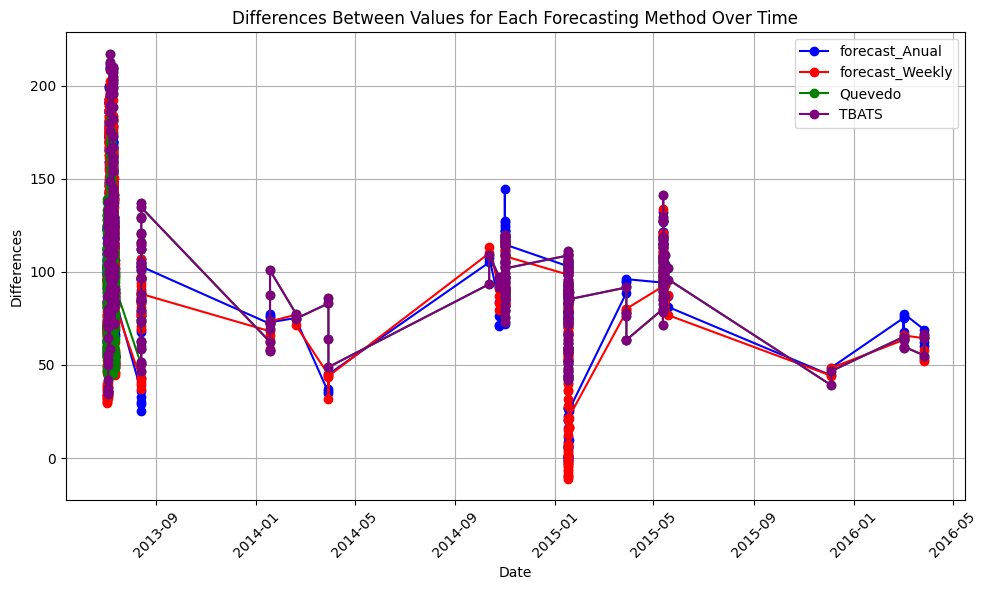

In [412]:
plt.figure(figsize=(10, 6))

plt.plot(reconstructions['Date'], reconstructions['forecast_Anual'], marker='o', linestyle='-', color='blue', label='forecast_Anual')
plt.plot(reconstructions['Date'], reconstructions['forecast_Weekly'], marker='o', linestyle='-', color='red', label='forecast_Weekly')
plt.plot(reconstructions['Date'], reconstructions['Quevedo'], marker='o', linestyle='-', color='green', label='Quevedo')
plt.plot(reconstructions['Date'], reconstructions['TBATS'], marker='o', linestyle='-', color='purple', label='TBATS')

plt.xlabel('Date')
plt.ylabel('Differences')
plt.title('Differences Between Values for Each Forecasting Method Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

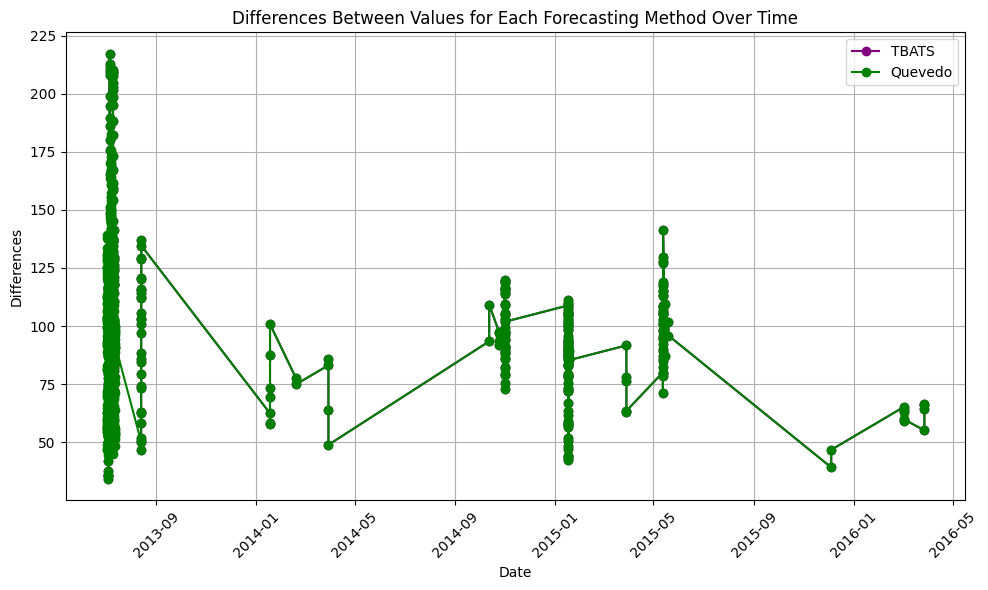

In [413]:
plt.figure(figsize=(10, 6))

plt.plot(reconstructions['Date'], reconstructions['TBATS'], marker='o', linestyle='-', color='purple', label='TBATS')
plt.plot(reconstructions['Date'], reconstructions['Quevedo'], marker='o', linestyle='-', color='green', label='Quevedo')

plt.xlabel('Date')
plt.ylabel('Differences')
plt.title('Differences Between Values for Each Forecasting Method Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [414]:
reconstructions

Date forecast_Anual forecast_Weekly    Quevedo   TBATS  \
0      2013-07-02 00:00:00      99.753533       67.553433  88.903332     NaN   
1      2013-07-02 00:15:00     105.348688       69.078057  81.402994     NaN   
2      2013-07-02 00:30:00     103.311199       70.192582  81.633379     NaN   
3      2013-07-02 00:45:00     100.685404       68.964373   82.97303     NaN   
4      2013-07-02 01:00:00      96.731551       67.085399  72.238757     NaN   
...                    ...            ...             ...        ...     ...   
93475  2016-03-01 16:45:00       77.64815       65.874986       59.9    59.9   
95908  2016-03-27 01:00:00      68.937695       64.379389       55.1    55.1   
95909  2016-03-27 01:15:00      59.998186       58.185965     65.834  65.834   
95910  2016-03-27 01:30:00      62.149282       52.510922     66.566  66.566   
95911  2016-03-27 01:45:00      53.952409       52.220292      64.34   64.34   

      diff_forecast_Anual diff_forecast_Weekly diff_Quevedo  
0                     NaN                  NaN          NaN  
1                     NaN                  NaN          NaN  
2                     NaN                  NaN          NaN  
3                     NaN                  NaN          NaN  
4                     NaN                  NaN          NaN  
...                   ...                  ...          ...  
93475           29.629633             9.974935          0.0  
95908           25.113784            16.840997          0.0  
95909            8.864437            11.617151          0.0  
95910            6.635097              21.1145          0.0  
95911           16.144841            18.836972          0.0  

[1010 rows x 8 columns]

In [415]:
reconstruct_Quevedo

DateTime     Caudal
0      2013-07-01 00:00:00  88.903332
1      2013-07-01 00:15:00  81.402994
2      2013-07-01 00:30:00  81.633379
3      2013-07-01 00:45:00  82.973030
4      2013-07-01 01:00:00  72.238757
...                    ...        ...
105211 2016-06-30 22:45:00  92.704235
105212 2016-06-30 23:00:00  86.325131
105213 2016-06-30 23:15:00  81.261175
105214 2016-06-30 23:30:00  77.601322
105215 2016-06-30 23:45:00  74.585377

[105216 rows x 2 columns]

In [416]:
merged_df

série bruta registos sem caudal (%)  \
Year_Month                                        
2013-07                                0.000706   
2013-08                                     NaN   
2013-09                                0.000706   
2013-10                                0.001765   
2013-12                                0.000353   
2014-01                                     NaN   
2014-02                                0.001765   
2014-03                                     NaN   
2014-05                                0.001059   
2014-06                                0.003883   
2014-07                                     NaN   
2014-10                                0.003883   
2014-11                                     NaN   
2015-01                                0.095663   
2015-03                                     NaN   
2015-05                                0.003177   
2015-06                                0.007060   
2015-07                                0.001059   
2015-09                                     NaN   
2015-12                                0.008825   
2016-03                                0.001059   
2016-05                                0.001059   

            série bruta oultliers de caudal máximo(LI) (m3/h)  \
Year_Month                                                      
2013-07                                                   NaN   
2013-08                                                   NaN   
2013-09                                                   NaN   
2013-10                                                   NaN   
2013-12                                                   NaN   
2014-01                                                   NaN   
2014-02                                                   NaN   
2014-03                                                201.33   
2014-05                                                   NaN   
2014-06                                                254.27   
2014-07                                                294.98   
2014-10                                                198.90   
2014-11                                                198.90   
2015-01                                                208.10   
2015-03                                                213.75   
2015-05                                               1204.00   
2015-06                                                   NaN   
2015-07                                                   NaN   
2015-09                                                214.68   
2015-12                                                   NaN   
2016-03                                                   NaN   
2016-05                                                   NaN   

            série bruta oultliers de caudal máximo(LS) (m3/h)  \
Year_Month                                                      
2013-07                                                   NaN   
2013-08                                                   NaN   
2013-09                                                   NaN   
2013-10                                                   NaN   
2013-12                                                   NaN   
2014-01                                                   NaN   
2014-02                                                   NaN   
2014-03                                                201.33   
2014-05                                                   NaN   
2014-06                                                315.00   
2014-07                                                294.98   
2014-10                                                293.60   
2014-11                                                206.60   
2015-01                                                315.00   
2015-03                                                213.75   
2015-05                                               1235.00   
2015-06                                                 

In [417]:
merged_df.to_excel('results.xlsx', index=True)

#Identificação de Eventos Anómalos

In [ ]:
Avarias_df = pd.read_excel("/content/Avarias.xlsx", sheet_name="Porto_Carro")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [ ]:
def datetime_in_range(datetime, start_datetimes, end_datetimes):
    for start, end in zip(start_datetimes, end_datetimes):
        if start <= datetime <= end:
            return True
    return False

In [ ]:
Avarias_df

Numero           Data/Hora Dia da semana      Localidade Freguesia  AREA  \
0      441 2011-01-21 10:41:40           NaN     Porto Carro   Maceira  Água   
1     1016 2011-02-14 12:46:31           NaN     Porto Carro   Maceira  Água   
2     1241 2011-02-24 16:58:43           NaN     Porto Carro   Maceira  Água   
3     1390 2011-03-04 12:55:09           NaN     Porto Carro   Maceira  Água   
4     2202 2011-05-02 09:26:57           NaN     Porto Carro   Maceira  Água   
..     ...                 ...           ...             ...       ...   ...   
81   21203 2016-03-03 19:16:51           NaN     Porto Carro   Maceira  Água   
82   21819 2016-05-18 10:32:01           NaN     Porto Carro   Maceira  Água   
83   22120 2016-06-14 12:23:05           NaN  Porto do Carro   Maceira  Água   
84   22295 2016-06-29 16:57:58           NaN     Porto Carro   Maceira  Água   
85   22557 2016-07-20 16:14:30           NaN     Porto Carro   Maceira  Água   

                Ocorrencia_Real     Estado      Data Conclusão   Ano  \
0              Boca de Incêndio  CONCLUÍDO 2011-01-21 12:00:00  2011   
1              Válvula de Ramal  CONCLUÍDO 2011-02-14 22:00:00  2011   
2              Válvula de Ramal  CONCLUÍDO 2011-02-25 22:30:00  2011   
3   Rotura Conduta Distribuição  CONCLUÍDO 2011-03-04 22:51:27  2011   
4              Boca de Incêndio  CONCLUÍDO 2011-05-02 14:55:49  2011   
..                          ...        ...                 ...   ...   
81   Reparação Boca de Incêndio  CONCLUÍDO 2016-03-04 08:23:13  2016   
82                 Rotura Ramal  CONCLUÍDO 2016-05-24 15:36:44  2016   
83  Rotura Conduta Distribuição  CONCLUÍDO 2016-06-15 13:19:31  2016   
84             Válvula de Ramal  CONCLUÍDO 2016-07-03 12:57:26  2016   
85  Rotura Conduta Distribuição  CONCLUÍDO 2016-07-20 22:42:41  2016   

    Fecho_de_agua     Data_hora_fecho  Data_hora_abertura  
0           False                 NaT                 NaT  
1           False                 NaT                 NaT  
2           False                 NaT                 NaT  
3           False                 NaT                 NaT  
4           False                 NaT                 NaT  
..            ...                 ...                 ...  
81          False                 NaT                 NaT  
82          False                 NaT                 NaT  
83           True 2016-06-15 11:10:50 2016-06-15 12:04:09  
84           True 2016-07-03 11:09:20 2016-07-03 11:41:14  
85           True 2016-07-20 17:46:30 2016-07-20 21:47:23  

[86 rows x 13 columns]

In [ ]:
original_outlier_above

Data  Caudal  Year  Month
5750   2013-08-21 21:25:00   18.10  2013      8
5752   2013-08-21 21:29:00   17.90  2013      8
10568  2013-09-02 21:49:00   17.20  2013      9
10569  2013-09-02 21:54:00   20.10  2013      9
10570  2013-09-02 21:56:00   18.50  2013      9
...                    ...     ...   ...    ...
378151 2016-06-15 10:34:00   19.80  2016      6
378166 2016-06-15 11:36:00   18.55  2016      6
378167 2016-06-15 11:41:00   17.60  2016      6
381255 2016-06-25 18:50:00   17.80  2016      6
381575 2016-06-26 20:49:00   17.35  2016      6

[751 rows x 4 columns]

In [ ]:
original_outlier_below

Empty DataFrame
Columns: [Data, Caudal, Year, Month]
Index: []

In [ ]:
original_outlier_above['Data'] = pd.to_datetime(original_outlier_above['Data'])
original_outlier_below['Data'] = pd.to_datetime(original_outlier_below['Data'])
Avarias_df['Data/Hora'] = pd.to_datetime(Avarias_df['Data/Hora'])
Avarias_df['Data Conclusão'] = pd.to_datetime(Avarias_df['Data Conclusão'])

In [ ]:
original_outlier_above['Exists in Avarias_df'] = original_outlier_above['Data'].apply(
    lambda datetime: datetime_in_range(datetime, Avarias_df['Data/Hora'], Avarias_df['Data Conclusão'])
)

original_outlier_below['Exists in Avarias_df'] = original_outlier_below['Data'].apply(
    lambda datetime: datetime_in_range(datetime, Avarias_df['Data/Hora'], Avarias_df['Data Conclusão'])
)

In [ ]:
true_rows_above = original_outlier_above[original_outlier_above['Exists in Avarias_df']]
true_rows_below = original_outlier_below[original_outlier_below['Exists in Avarias_df']]

In [ ]:
combined_true_rows = pd.concat([true_rows_above, true_rows_below])
combined_true_rows.reset_index(drop=True, inplace=True)

In [ ]:
combined_true_rows

Data  Caudal  Year  Month  Exists in Avarias_df
0   2013-08-21 21:25:00   18.10  2013      8                  True
1   2013-08-21 21:29:00   17.90  2013      8                  True
2   2014-03-27 13:40:00   24.30  2014      3                  True
3   2014-03-27 13:45:00   22.60  2014      3                  True
4   2014-03-27 13:50:00   20.60  2014      3                  True
..                  ...     ...   ...    ...                   ...
172 2016-06-15 10:24:00   19.40  2016      6                  True
173 2016-06-15 10:29:00   19.50  2016      6                  True
174 2016-06-15 10:34:00   19.80  2016      6                  True
175 2016-06-15 11:36:00   18.55  2016      6                  True
176 2016-06-15 11:41:00   17.60  2016      6                  True

[177 rows x 5 columns]